In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

On this notebook the best pipeline for this classifier on dataset MIT-BIHArrhythmiaDatabase.csv has been applied on the entire dataset (merge of the four datasets)

In [2]:
df_cardio=pd.read_csv("C:/Users/matte/DataMiningJupyter/projectDM/datasets/preprocessed_dataset/dataset_Normalized.csv")

In [3]:
columns = df_cardio.columns.tolist()
columns.remove(columns[0])
df_cardio=df_cardio[columns]

In [4]:
df_cardio

patient  type  0_pre-RR  0_post-RR   0_pPeak   0_tPeak   0_rPeak  \
0           133   0.0 -0.137054  -0.079354  0.069610 -0.083281  0.614133   
1           133   0.0 -0.079249  -0.050451 -0.097030  0.597254 -0.078704   
2           133   0.0 -0.050346  -1.900223  0.109399  0.680528 -0.010649   
3           133   2.0 -1.900120   1.828223  0.176376  0.256431 -0.101098   
4           133   0.0  1.828330  -0.079354  0.585577  0.607461 -0.083499   
...         ...   ...       ...        ...       ...       ...       ...   
711419       54   0.0 -4.460816  -0.429158 -0.345439  1.086720 -0.213846   
711420       54   0.0 -0.438464  -2.857743  0.095040  0.804837  0.211167   
711421       54   0.0 -6.918920  -7.383744  1.603278 -0.518048 -0.531231   
711422       54   0.0 -5.578136  -4.072036 -0.942216 -1.074539 -0.955163   
711423       54   0.0 -5.354672  -5.065549  1.085070 -0.027911  0.284400   

         0_sPeak   0_qPeak  0_qrs_interval  ...   1_qPeak  1_qrs_interval  \
0      -0.392761  0.047159            15.0  ... -0.023370            14.0   
1      -0.078704 -0.137781             3.0  ...  0.081637            15.0   
2      -0.010649 -0.720620             6.0  ... -0.148539            33.0   
3      -0.707525 -0.101098             4.0  ...  0.046898            21.0   
4      -0.083499 -0.167858             3.0  ... -0.112552            32.0   
...          ...       ...             ...  ...       ...             ...   
711419 -0.213846 -0.699650            24.0  ... -0.443458             1.0   
711420  0.211167  0.008211             4.0  ... -0.224660            50.0   
711421 -0.531231 -1.296207            16.0  ...  0.521029             8.0   
711422 -1.249941 -0.955163             7.0  ...  0.940757            73.0   
711423 -0.402152  0.284400            70.0  ...  0.229242            21.0   

        1_pq_interval  1_qt_interval  1_st_interval  1_qrs_morph0  \
0                 3.0           23.0            6.0     -0.023370   
1                 5.0           27.0            7.0      0.081637   
2                13.0           52.0            6.0     -0.148539   
3                 9.0           34.0            4.0      0.046898   
4                 5.0           43.0            6.0     -0.112552   
...               ...            ...            ...           ...   
711419            8.0           29.0           20.0     -0.443458   
711420            9.0           67.0            8.0     -0.224660   
711421            6.0           39.0           25.0      0.521029   
711422            6.0          115.0           36.0      0.940757   
711423           14.0           39.0            4.0      0.229242   

        1_qrs_morph1  1_qrs_morph2  1_qrs_morph3  1_qrs_morph4  
0          -0.011650      0.082608      0.101373     -0.183387  
1           0.102992      0.191225      0.217544     -0.068248  
2          -0.060620      0.081080      0.204400      0.335172  
3           0.083728      0.279512      0.526785      0.450969  
4           0.012989      0.091491      0.134004      0.265232  
...              ...           ...           ...           ...  
711419     -0.443458     -0.443458     -0.443458     -0.443458  
711420     -0.120400     -0.016600      0.028074      0.123550  
711421      0.490847      0.369275      0.281510      0.121812  
711422      1.275964      0.376596     -0.212226     -0.621249  
711423      0.190114      0.158866      0.128646      0.057560  

[711424 rows x 34 columns]

In [5]:
from utils import handle_warning,cross_valid,print_plot,compare_plots,preprocessed_dataset,retrieve_fscore_avg

In [6]:
import pandas as pd
from sklearn.model_selection import StratifiedGroupKFold
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier


pipe_normal = Pipeline([
        ('classification', DecisionTreeClassifier())
    ])
pipe_normal

Pipeline(steps=[('classification', DecisionTreeClassifier())])

Fold 1:
  Test:  patient=0
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2238
         1.0       0.14      0.09      0.11        33
         2.0       0.04      1.00      0.08         1

    accuracy                           0.97      2272
   macro avg       0.39      0.69      0.39      2272
weighted avg       0.98      0.97      0.97      2272

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.990570   0.136364  0.043478  0.972711     0.390137   
recall        0.985702   0.090909  1.000000  0.972711     0.692204   
f1-score      0.988130   0.109091  0.083333  0.972711     0.393518   
support    2238.000000  33.000000  1.000000  0.972711  2272.000000   

           weighted avg  
precision      0.977746  
recall         0.972711  
f1-score       0.974964  
support     2272.000000  


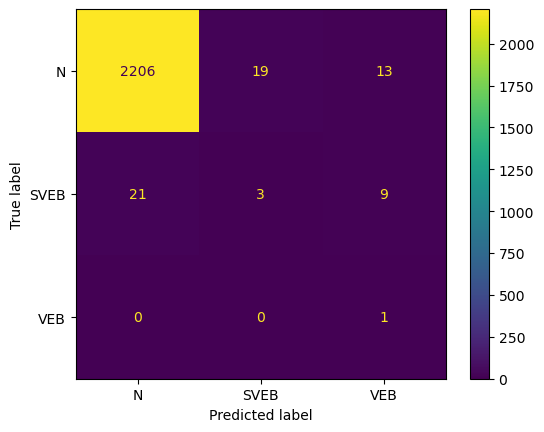

Fold 2:
  Test:  patient=1


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91      1859
         1.0       0.06      0.33      0.11         3
         2.0       0.00      0.00      0.00         0

    accuracy                           0.83      1862
   macro avg       0.35      0.39      0.34      1862
weighted avg       1.00      0.83      0.91      1862

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998707  0.062500  0.0   0.83029     0.353736      0.997199
recall        0.831092  0.333333  NaN   0.83029     0.388142      0.830290
f1-score      0.907223  0.105263  NaN   0.83029     0.337495      0.905930
support    1859.000000  3.000000  0.0   0.83029  1862.000000   1862.000000


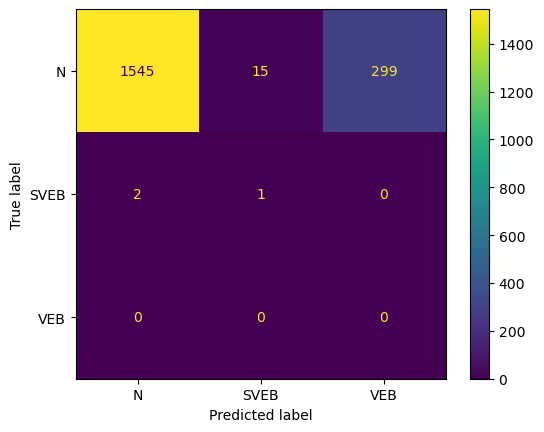

Fold 3:
  Test:  patient=2
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      2081
         1.0       0.00      0.00      0.00         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.96      2083
   macro avg       0.33      0.32      0.33      2083
weighted avg       1.00      0.96      0.98      2083

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999499  0.0  0.0  0.958713     0.333166      0.998540
recall        0.959635  0.0  NaN  0.958713     0.319878      0.958713
f1-score      0.979162  0.0  NaN  0.958713     0.326387      0.978221
support    2081.000000  2.0  0.0  0.958713  2083.000000   2083.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

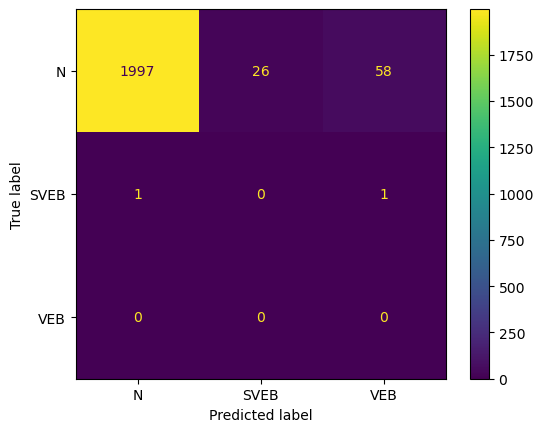

Fold 4:
  Test:  patient=3


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      2525
         1.0       0.00      0.00      0.00         0
         2.0       0.23      0.80      0.35        41

    accuracy                           0.95      2566
   macro avg       0.41      0.58      0.44      2566
weighted avg       0.99      0.95      0.96      2566

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.997501  0.0   0.226027   0.94622     0.407843      0.985174
recall        0.948515  NaN   0.804878   0.94622     0.584464      0.946220
f1-score      0.972391  NaN   0.352941   0.94622     0.441778      0.962494
support    2525.000000  0.0  41.000000   0.94622  2566.000000   2566.000000


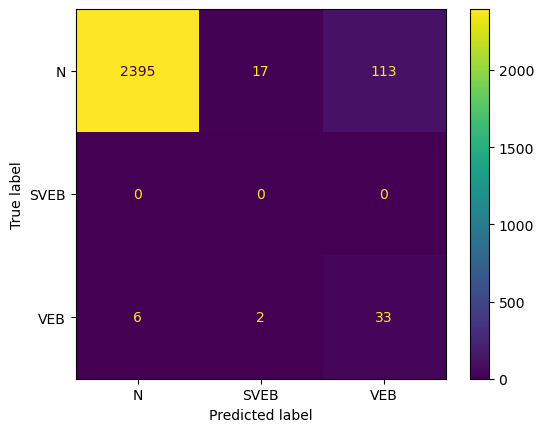

Fold 5:
  Test:  patient=4
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      1506
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.54      0.70       520

    accuracy                           0.88      2026
   macro avg       0.63      0.51      0.55      2026
weighted avg       0.93      0.88      0.89      2026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.911693  0.0    0.986014  0.878085     0.632569      0.930769
recall        0.994024  NaN    0.542308  0.878085     0.512111      0.878085
f1-score      0.951080  NaN    0.699752  0.878085     0.550277      0.886573
support    1506.000000  0.0  520.000000  0.878085  2026.000000   2026.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

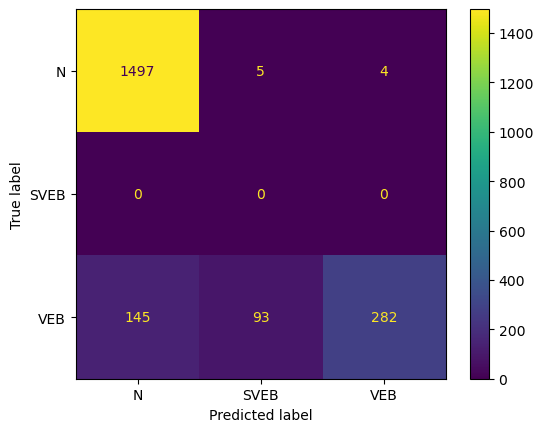

Fold 6:
  Test:  patient=5
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89      1739
         1.0       0.05      0.25      0.09         4
         2.0       0.02      0.41      0.04        17

    accuracy                           0.80      1760
   macro avg       0.36      0.49      0.34      1760
weighted avg       0.98      0.80      0.88      1760

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.995014  0.052632   0.020772  0.798295     0.356139   
recall        0.803335  0.250000   0.411765  0.798295     0.488367   
f1-score      0.888960  0.086957   0.039548  0.798295     0.338488   
support    1739.000000  4.000000  17.000000  0.798295  1760.000000   

           weighted avg  
precision      0.983462  
recall         0.798295  
f1-score       0.878932  
support     1760.000000  


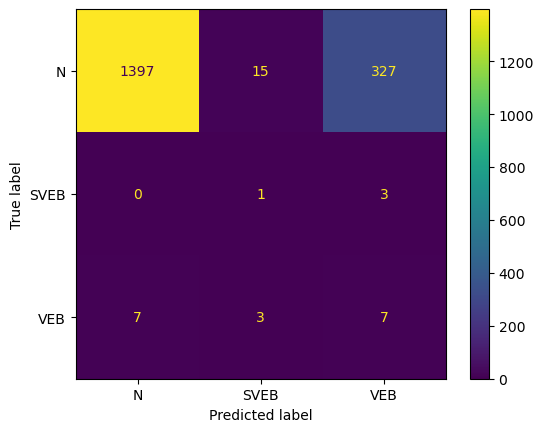

Fold 7:
  Test:  patient=6


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.62      0.76      2491
         1.0       0.00      0.00      0.00         0
         2.0       0.03      0.82      0.06        38

    accuracy                           0.62      2529
   macro avg       0.34      0.48      0.27      2529
weighted avg       0.98      0.62      0.75      2529

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.995466  0.0   0.031926  0.620008     0.342464      0.980988
recall        0.617021  NaN   0.815789  0.620008     0.477604      0.620008
f1-score      0.761834  NaN   0.061447  0.620008     0.274427      0.751310
support    2491.000000  0.0  38.000000  0.620008  2529.000000   2529.000000


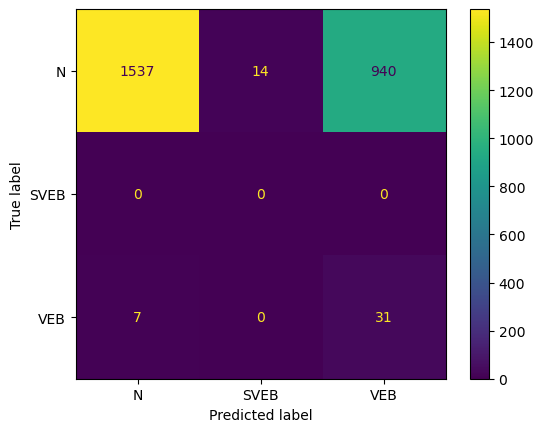

Fold 8:
  Test:  patient=7


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      2122
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.01         1

    accuracy                           0.85      2123
   macro avg       0.33      0.62      0.31      2123
weighted avg       1.00      0.85      0.92      2123

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.003891  0.852567     0.334630      0.999531
recall        0.852498  NaN  1.000000  0.852567     0.617499      0.852567
f1-score      0.920376  NaN  0.007752  0.852567     0.309376      0.919947
support    2122.000000  0.0  1.000000  0.852567  2123.000000   2123.000000


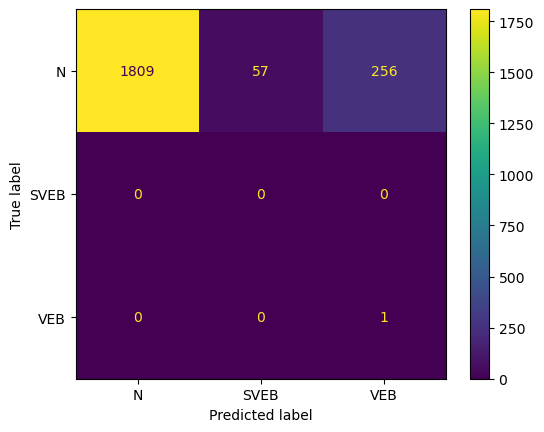

Fold 9:
  Test:  patient=8


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99      2536
         1.0       0.04      0.50      0.07         2
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      2538
   macro avg       0.35      0.49      0.35      2538
weighted avg       1.00      0.97      0.99      2538

                   0.0       1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.040000  0.0  0.973995     0.346667      0.999243
recall        0.974369  0.500000  NaN  0.973995     0.491456      0.973995
f1-score      0.987018  0.074074  NaN  0.973995     0.353697      0.986299
support    2536.000000  2.000000  0.0  0.973995  2538.000000   2538.000000


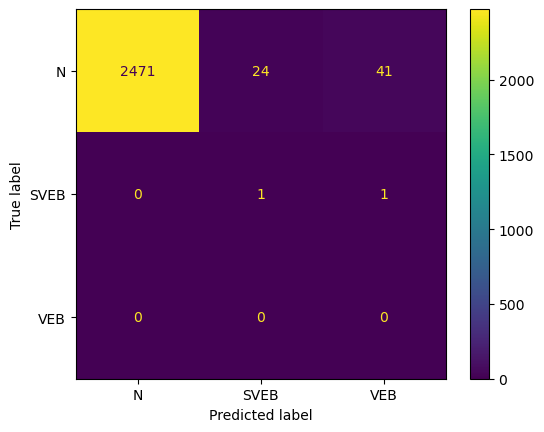

Fold 10:
  Test:  patient=9


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1788
         1.0       0.00      0.00      0.00         6
         2.0       0.00      0.00      0.00         0

    accuracy                           0.95      1794
   macro avg       0.33      0.32      0.32      1794
weighted avg       1.00      0.95      0.97      1794

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999412  0.0  0.0  0.947603     0.333137      0.996070
recall        0.950783  0.0  NaN  0.947603     0.316928      0.947603
f1-score      0.974491  0.0  NaN  0.947603     0.324830      0.971232
support    1788.000000  6.0  0.0  0.947603  1794.000000   1794.000000


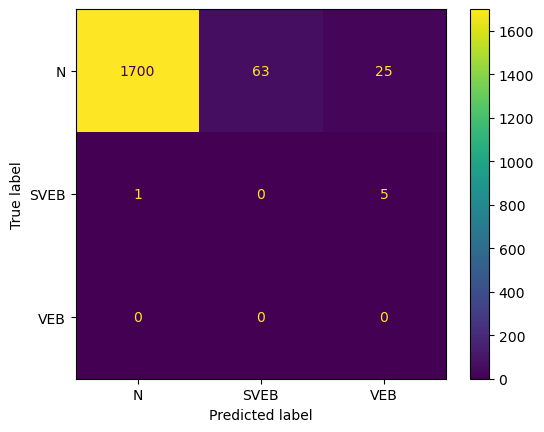

Fold 11:
  Test:  patient=10
              precision    recall  f1-score   support

         0.0       0.99      0.70      0.82      1819
         1.0       0.03      0.17      0.04        12
         2.0       0.07      0.86      0.13        43

    accuracy                           0.70      1874
   macro avg       0.36      0.58      0.33      1874
weighted avg       0.96      0.70      0.80      1874

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.990647   0.025641   0.072125  0.699039     0.362804   
recall        0.698736   0.166667   0.860465  0.699039     0.575289   
f1-score      0.819471   0.044444   0.133094  0.699039     0.332336   
support    1819.000000  12.000000  43.000000  0.699039  1874.000000   

           weighted avg  
precision      0.963392  
recall         0.699039  
f1-score       0.798759  
support     1874.000000  


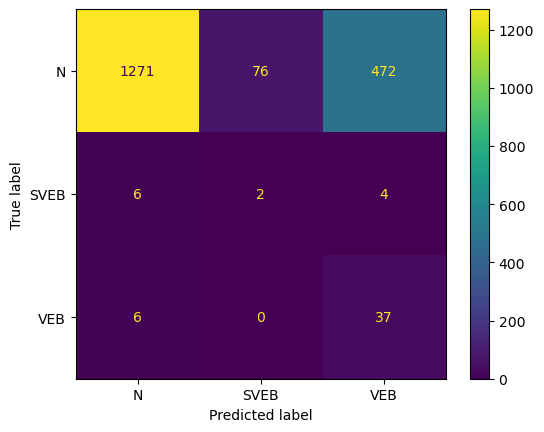

Fold 12:
  Test:  patient=11


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1952
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      1952
   macro avg       0.33      0.33      0.33      1952
weighted avg       1.00      0.98      0.99      1952

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.980533     0.333333      1.000000
recall        0.980533  NaN  NaN  0.980533     0.326844      0.980533
f1-score      0.990171  NaN  NaN  0.980533     0.330057      0.990171
support    1952.000000  0.0  0.0  0.980533  1952.000000   1952.000000


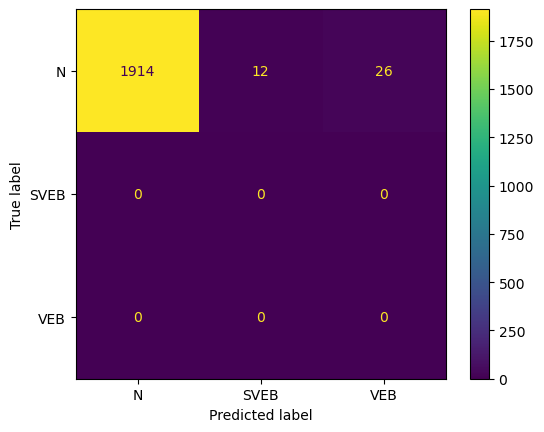

Fold 13:
  Test:  patient=12
              precision    recall  f1-score   support

         0.0       1.00      0.65      0.79      2301
         1.0       0.08      1.00      0.14         1
         2.0       0.11      0.87      0.19       109

    accuracy                           0.66      2411
   macro avg       0.39      0.84      0.37      2411
weighted avg       0.96      0.66      0.76      2411

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.996669  0.076923    0.105909  0.660307     0.393167   
recall        0.650152  1.000000    0.871560  0.660307     0.840571   
f1-score      0.786954  0.142857    0.188867  0.660307     0.372893   
support    2301.000000  1.000000  109.000000  0.660307  2411.000000   

           weighted avg  
precision      0.956017  
recall         0.660307  
f1-score       0.759648  
support     2411.000000  


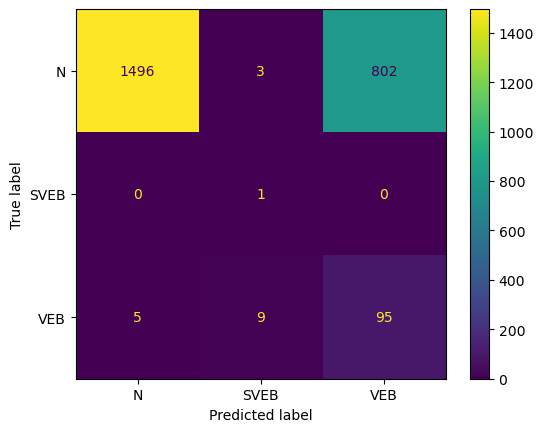

Fold 14:
  Test:  patient=13


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      1533
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0

    accuracy                           0.89      1534
   macro avg       0.33      0.30      0.31      1534
weighted avg       1.00      0.89      0.94      1534

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.889179     0.333333      0.999348
recall        0.889759  0.0  NaN  0.889179     0.296586      0.889179
f1-score      0.941664  0.0  NaN  0.889179     0.313888      0.941050
support    1533.000000  1.0  0.0  0.889179  1534.000000   1534.000000


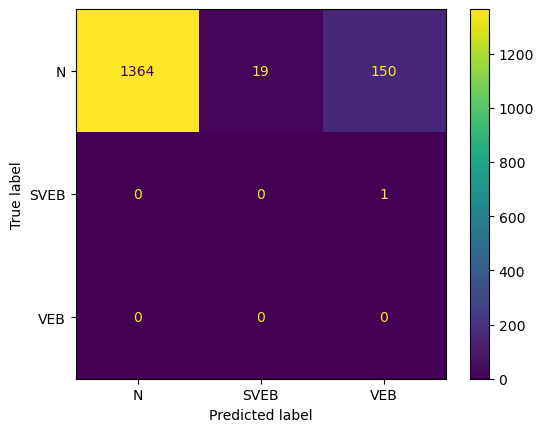

Fold 15:
  Test:  patient=14
              precision    recall  f1-score   support

         0.0       0.98      0.82      0.89      2165
         1.0       0.12      0.09      0.10        96
         2.0       0.02      0.50      0.04        16

    accuracy                           0.78      2277
   macro avg       0.37      0.47      0.34      2277
weighted avg       0.94      0.78      0.85      2277

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.980022   0.118421   0.020050  0.783048     0.372831   
recall        0.815704   0.093750   0.500000  0.783048     0.469818   
f1-score      0.890345   0.104651   0.038554  0.783048     0.344517   
support    2165.000000  96.000000  16.000000  0.783048  2277.000000   

           weighted avg  
precision      0.936951  
recall         0.783048  
f1-score       0.851235  
support     2277.000000  


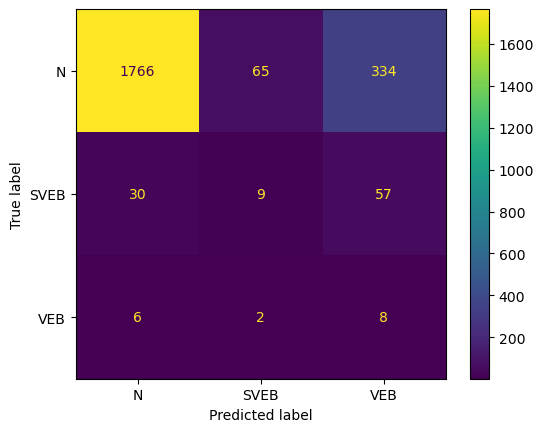

Fold 16:
  Test:  patient=15


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1542
         1.0       0.00      0.00      0.00         0
         2.0       0.97      0.70      0.81       444

    accuracy                           0.92      1986
   macro avg       0.65      0.56      0.60      1986
weighted avg       0.97      0.92      0.94      1986

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.975610  0.0    0.965732   0.92145     0.647114      0.973401
recall        0.985733  NaN    0.698198   0.92145     0.561310      0.921450
f1-score      0.980645  NaN    0.810458   0.92145     0.597034      0.942597
support    1542.000000  0.0  444.000000   0.92145  1986.000000   1986.000000


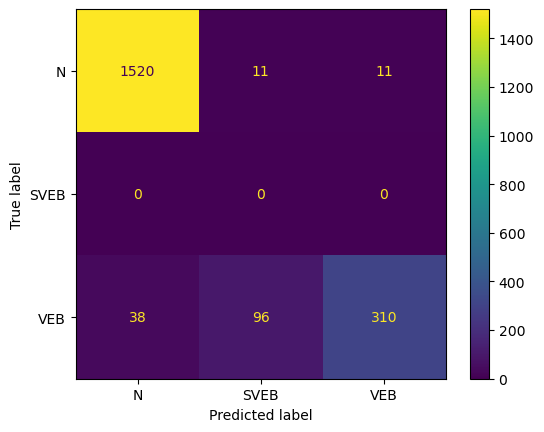

Fold 17:
  Test:  patient=16
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1860
         1.0       0.02      1.00      0.04         1
         2.0       0.03      1.00      0.06         1

    accuracy                           0.96      1862
   macro avg       0.35      0.99      0.36      1862
weighted avg       1.00      0.96      0.98      1862

                   0.0       1.0       2.0  accuracy    macro avg  \
precision     1.000000  0.021277  0.028571  0.957035     0.349949   
recall        0.956989  1.000000  1.000000  0.957035     0.985663   
f1-score      0.978022  0.041667  0.055556  0.957035     0.358415   
support    1860.000000  1.000000  1.000000  0.957035  1862.000000   

           weighted avg  
precision      0.998953  
recall         0.957035  
f1-score       0.977024  
support     1862.000000  


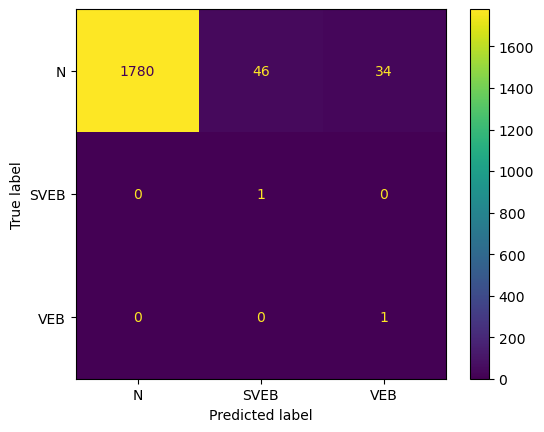

Fold 18:
  Test:  patient=17
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2475
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           1.00      2475
   macro avg       0.33      0.33      0.33      2475
weighted avg       1.00      1.00      1.00      2475

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.997576     0.333333      1.000000
recall        0.997576  NaN  NaN  0.997576     0.332525      0.997576
f1-score      0.998786  NaN  NaN  0.997576     0.332929      0.998786
support    2475.000000  0.0  0.0  0.997576  2475.000000   2475.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

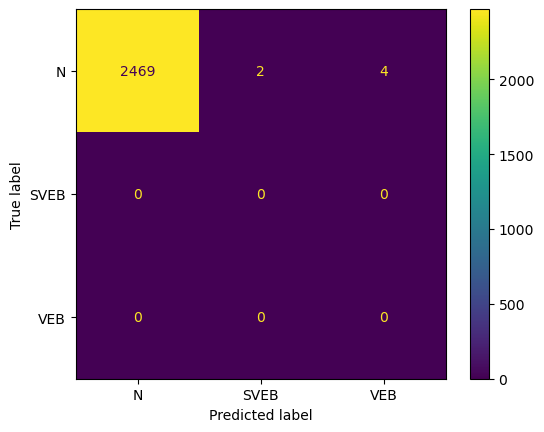

Fold 19:
  Test:  patient=18


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1514
         1.0       0.00      0.00      0.00         0
         2.0       0.07      0.67      0.13         3

    accuracy                           0.97      1517
   macro avg       0.36      0.54      0.37      1517
weighted avg       1.00      0.97      0.98      1517

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999317  0.0  0.071429  0.965722     0.356915      0.997482
recall        0.966314  NaN  0.666667  0.965722     0.544327      0.965722
f1-score      0.982539  NaN  0.129032  0.965722     0.370524      0.980851
support    1514.000000  0.0  3.000000  0.965722  1517.000000   1517.000000


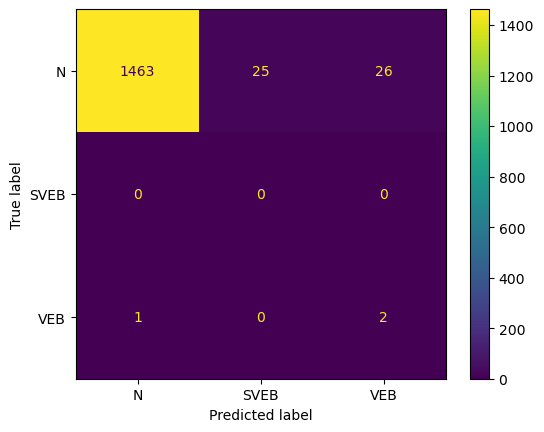

Fold 20:
  Test:  patient=19
              precision    recall  f1-score   support

         0.0       0.95      0.36      0.52      1535
         1.0       0.06      0.03      0.04        31
         2.0       0.03      0.60      0.05        47

    accuracy                           0.36      1613
   macro avg       0.34      0.33      0.20      1613
weighted avg       0.90      0.36      0.50      1613

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.948007   0.055556   0.027505  0.357099     0.343689   
recall        0.356352   0.032258   0.595745  0.357099     0.328118   
f1-score      0.517992   0.040816   0.052582  0.357099     0.203797   
support    1535.000000  31.000000  47.000000  0.357099  1613.000000   

           weighted avg  
precision      0.904033  
recall         0.357099  
f1-score       0.495260  
support     1613.000000  


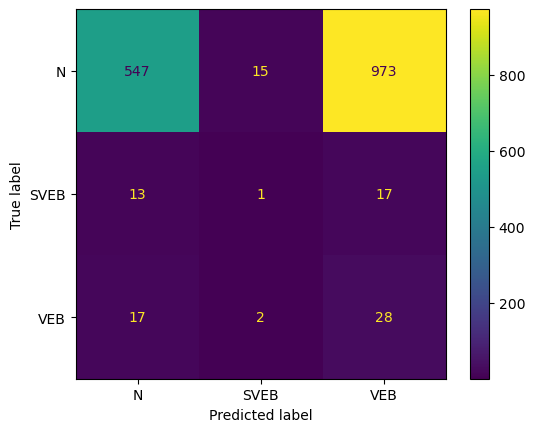

Fold 21:
  Test:  patient=20
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1742
         1.0       0.01      0.03      0.01        30
         2.0       0.93      0.73      0.82       826

    accuracy                           0.88      2598
   macro avg       0.62      0.58      0.59      2598
weighted avg       0.92      0.88      0.90      2598

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.931416   0.006993    0.933539  0.881062     0.623983   
recall        0.966705   0.033333    0.731235  0.881062     0.577091   
f1-score      0.948732   0.011561    0.820095  0.881062     0.593463   
support    1742.000000  30.000000  826.000000  0.881062  2598.000000   

           weighted avg  
precision      0.921416  
recall         0.881062  
f1-score       0.897012  
support     2598.000000  


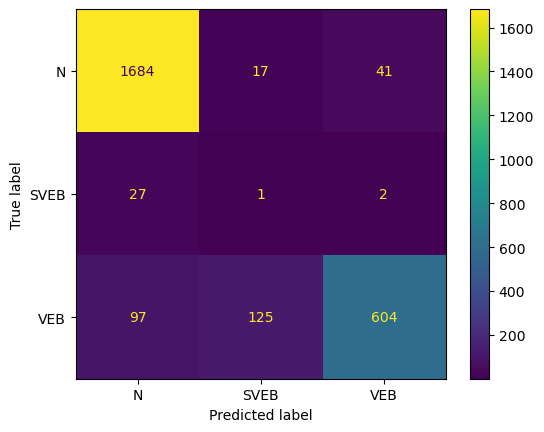

Fold 22:
  Test:  patient=21
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92      1634
         1.0       0.65      0.32      0.43       128
         2.0       0.22      0.08      0.12       198

    accuracy                           0.84      1960
   macro avg       0.58      0.46      0.49      1960
weighted avg       0.79      0.84      0.81      1960

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.871781    0.650794    0.222222  0.840816     0.581599   
recall        0.973684    0.320312    0.080808  0.840816     0.458268   
f1-score      0.919919    0.429319    0.118519  0.840816     0.489252   
support    1634.000000  128.000000  198.000000  0.840816  1960.000000   

           weighted avg  
precision      0.791730  
recall         0.840816  
f1-score       0.806922  
support     1960.000000  


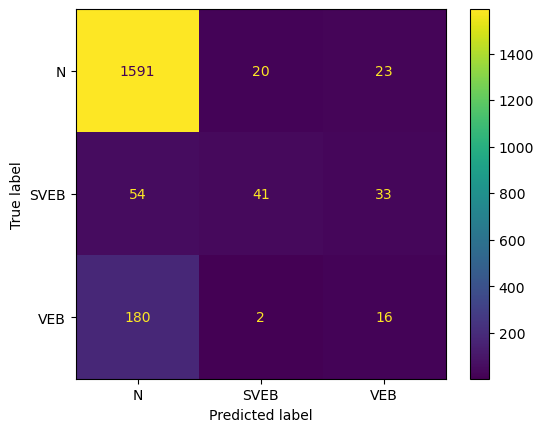

Fold 23:
  Test:  patient=22
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      2060
         1.0       0.19      0.38      0.25        55
         2.0       0.17      0.47      0.25        19

    accuracy                           0.93      2134
   macro avg       0.45      0.60      0.49      2134
weighted avg       0.96      0.93      0.94      2134

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.988827   0.185841   0.173077  0.926429     0.449248   
recall        0.945146   0.381818   0.473684  0.926429     0.600216   
f1-score      0.966493   0.250000   0.253521  0.926429     0.490005   
support    2060.000000  55.000000  19.000000  0.926429  2134.000000   

           weighted avg  
precision      0.960868  
recall         0.926429  
f1-score       0.941679  
support     2134.000000  


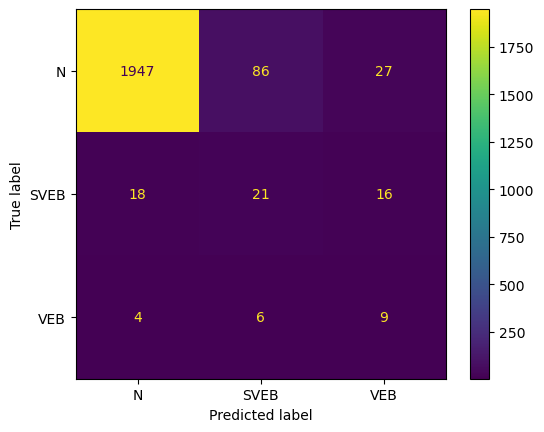

Fold 24:
  Test:  patient=23
              precision    recall  f1-score   support

         0.0       0.97      0.85      0.90      2528
         1.0       0.00      0.00      0.00         2
         2.0       0.50      0.74      0.60       444

    accuracy                           0.83      2974
   macro avg       0.49      0.53      0.50      2974
weighted avg       0.90      0.83      0.86      2974

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.969161  0.0    0.504587  0.829523     0.491249      0.899151
recall        0.845332  0.0    0.743243  0.829523     0.529525      0.829523
f1-score      0.903021  0.0    0.601093  0.829523     0.501371      0.857338
support    2528.000000  2.0  444.000000  0.829523  2974.000000   2974.000000


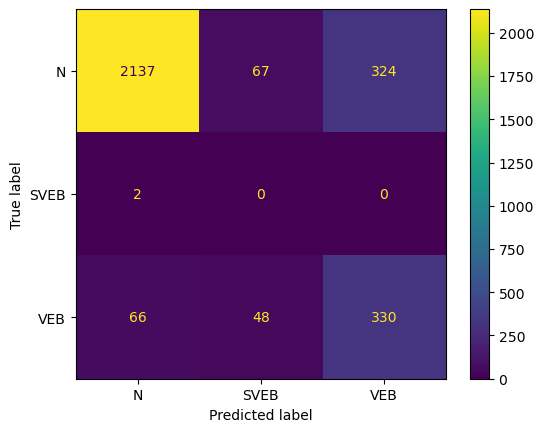

Fold 25:
  Test:  patient=24
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2570
         1.0       0.00      0.00      0.00         3
         2.0       0.97      0.86      0.91        71

    accuracy                           0.99      2644
   macro avg       0.65      0.62      0.64      2644
weighted avg       0.99      0.99      0.99      2644

                   0.0  1.0        2.0  accuracy   macro avg  weighted avg
precision     0.995726  0.0   0.968254  0.992436     0.65466      0.993859
recall        0.997276  0.0   0.859155  0.992436     0.61881      0.992436
f1-score      0.996501  0.0   0.910448  0.992436     0.63565      0.993059
support    2570.000000  3.0  71.000000  0.992436  2644.00000   2644.000000


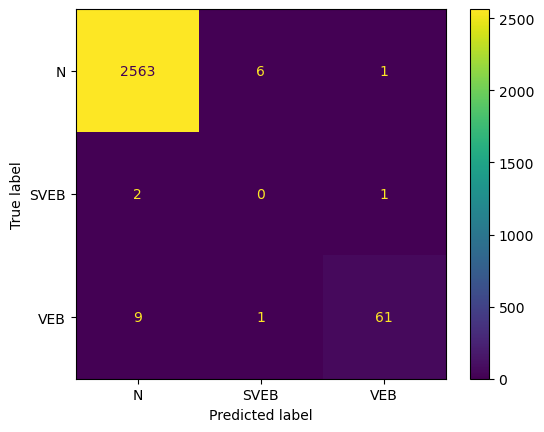

Fold 26:
  Test:  patient=25
              precision    recall  f1-score   support

         0.0       0.60      0.10      0.17      1543
         1.0       0.00      0.00      0.00       106
         2.0       0.06      0.46      0.11       210

    accuracy                           0.13      1859
   macro avg       0.22      0.19      0.09      1859
weighted avg       0.50      0.13      0.15      1859

                   0.0    1.0         2.0  accuracy    macro avg  weighted avg
precision     0.597656    0.0    0.061237  0.134481     0.219631      0.502982
recall        0.099157    0.0    0.461905  0.134481     0.187021      0.134481
f1-score      0.170094    0.0    0.108138  0.134481     0.092744      0.153397
support    1543.000000  106.0  210.000000  0.134481  1859.000000   1859.000000


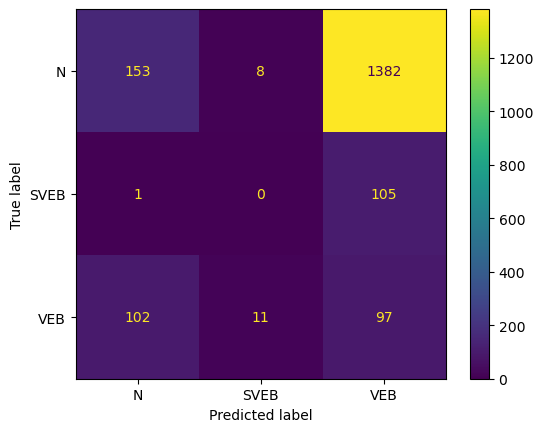

Fold 27:
  Test:  patient=26
              precision    recall  f1-score   support

         0.0       0.79      0.98      0.87      1585
         1.0       0.00      0.00      0.00         2
         2.0       0.97      0.50      0.66       992

    accuracy                           0.79      2579
   macro avg       0.59      0.49      0.51      2579
weighted avg       0.86      0.79      0.79      2579

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.787310  0.0    0.972441  0.792943     0.586584      0.857909
recall        0.978549  0.0    0.497984  0.792943     0.492178      0.792943
f1-score      0.872574  0.0    0.658667  0.792943     0.510414      0.789619
support    1585.000000  2.0  992.000000  0.792943  2579.000000   2579.000000


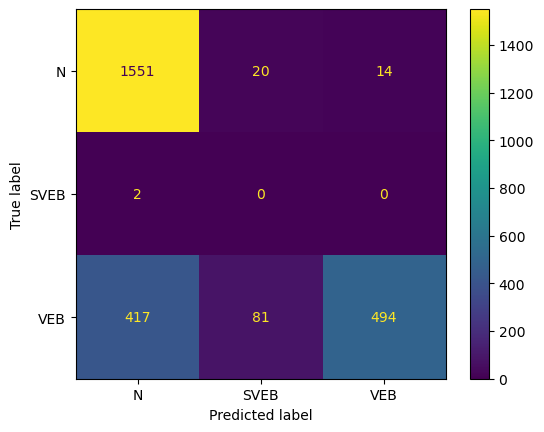

Fold 28:
  Test:  patient=27
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94      2620
         1.0       0.91      0.13      0.22       383
         2.0       0.02      1.00      0.05         1

    accuracy                           0.88      3004
   macro avg       0.61      0.71      0.40      3004
weighted avg       0.90      0.88      0.85      3004

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.893814    0.905660  0.024390  0.882157     0.607955   
recall        0.992748    0.125326  1.000000  0.882157     0.706025   
f1-score      0.940687    0.220183  0.047619  0.882157     0.402830   
support    2620.000000  383.000000  1.000000  0.882157  3004.000000   

           weighted avg  
precision      0.895035  
recall         0.882157  
f1-score       0.848528  
support     3004.000000  


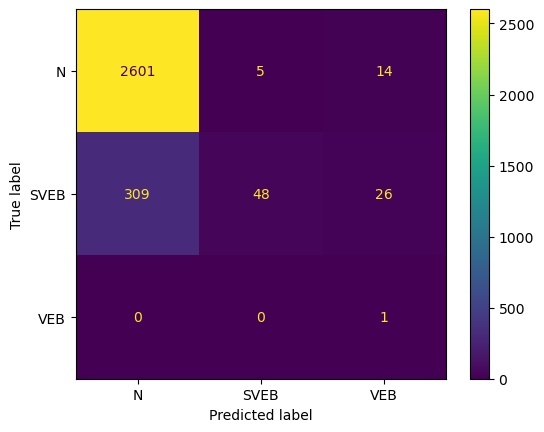

Fold 29:
  Test:  patient=28
              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      2422
         1.0       0.02      0.05      0.03        22
         2.0       0.66      0.67      0.67       195

    accuracy                           0.94      2639
   macro avg       0.55      0.56      0.56      2639
weighted avg       0.94      0.94      0.94      2639

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.973750   0.024390    0.661616  0.935582     0.553252   
recall        0.964905   0.045455    0.671795  0.935582     0.560718   
f1-score      0.969307   0.031746    0.666667  0.935582     0.555907   
support    2422.000000  22.000000  195.000000  0.935582  2639.000000   

           weighted avg  
precision      0.942772  
recall         0.935582  
f1-score       0.939129  
support     2639.000000  


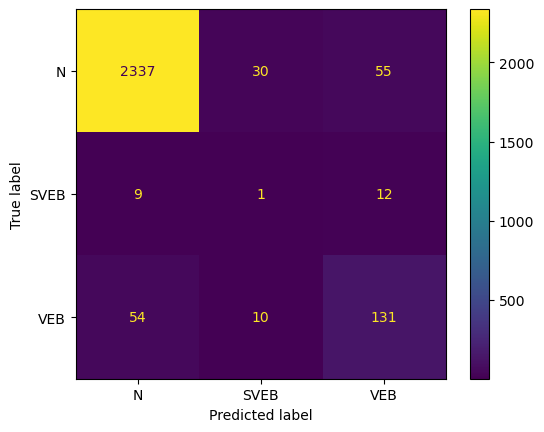

Fold 30:
  Test:  patient=29


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      2747
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.94      2747
   macro avg       0.33      0.31      0.32      2747
weighted avg       1.00      0.94      0.97      2747

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.937022     0.333333      1.000000
recall        0.937022  NaN  NaN  0.937022     0.312341      0.937022
f1-score      0.967487  NaN  NaN  0.937022     0.322496      0.967487
support    2747.000000  0.0  0.0  0.937022  2747.000000   2747.000000


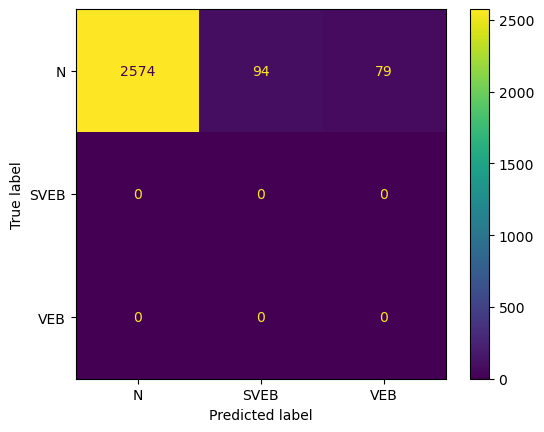

Fold 31:
  Test:  patient=30
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2640
         1.0       0.27      0.89      0.42        28
         2.0       0.82      0.85      0.83       220

    accuracy                           0.96      2888
   macro avg       0.69      0.90      0.74      2888
weighted avg       0.97      0.96      0.96      2888

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.993377   0.271739    0.816594  0.956371     0.693904   
recall        0.965909   0.892857    0.850000  0.956371     0.902922   
f1-score      0.979451   0.416667    0.832962  0.956371     0.743027   
support    2640.000000  28.000000  220.000000  0.956371  2888.000000   

           weighted avg  
precision      0.972914  
recall         0.956371  
f1-score       0.962835  
support     2888.000000  


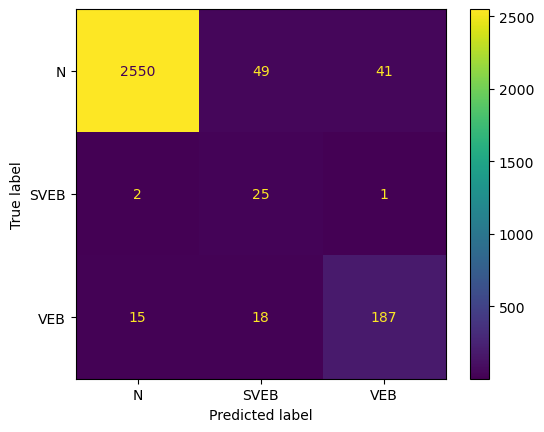

Fold 32:
  Test:  patient=31
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      2002
         1.0       0.00      0.00      0.00         0
         2.0       0.49      0.90      0.64       256

    accuracy                           0.88      2258
   macro avg       0.49      0.59      0.52      2258
weighted avg       0.93      0.88      0.90      2258

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.990996  0.0    0.492537  0.882197     0.494511      0.934483
recall        0.879620  NaN    0.902344  0.882197     0.593988      0.882197
f1-score      0.931993  NaN    0.637241  0.882197     0.523078      0.898575
support    2002.000000  0.0  256.000000  0.882197  2258.000000   2258.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

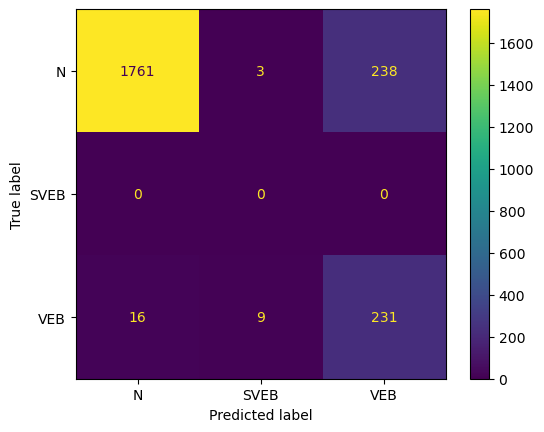

Fold 33:
  Test:  patient=32
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      3194
         1.0       0.05      1.00      0.10         3
         2.0       0.98      0.72      0.83       164

    accuracy                           0.97      3361
   macro avg       0.67      0.90      0.64      3361
weighted avg       0.99      0.97      0.98      3361

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.990578  0.053571    0.975207  0.974412     0.673119   
recall        0.987477  1.000000    0.719512  0.974412     0.902330   
f1-score      0.989025  0.101695    0.828070  0.974412     0.639597   
support    3194.000000  3.000000  164.000000  0.974412  3361.000000   

           weighted avg  
precision      0.988991  
recall         0.974412  
f1-score       0.980379  
support     3361.000000  


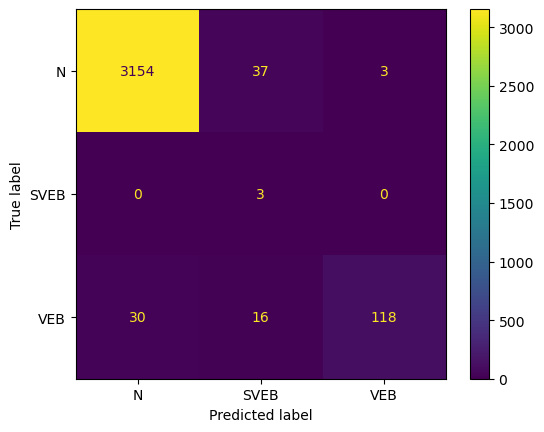

Fold 34:
  Test:  patient=33
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.92      2081
         1.0       0.00      0.00      0.00         7
         2.0       0.16      0.59      0.25        64

    accuracy                           0.86      2152
   macro avg       0.38      0.49      0.39      2152
weighted avg       0.96      0.86      0.90      2152

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.986921  0.0   0.157676  0.859201     0.381532      0.959049
recall        0.870255  0.0   0.593750  0.859201     0.488002      0.859201
f1-score      0.924923  0.0   0.249180  0.859201     0.391368      0.901818
support    2081.000000  7.0  64.000000  0.859201  2152.000000   2152.000000


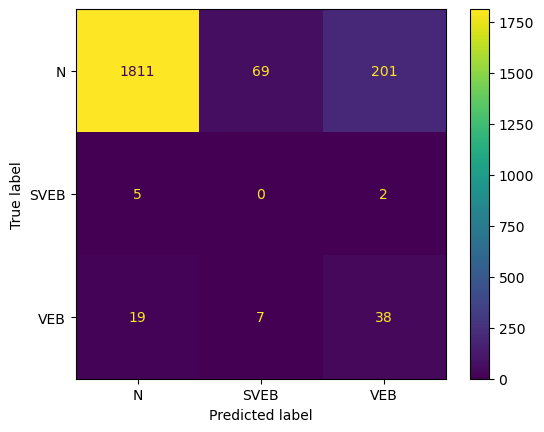

Fold 35:
  Test:  patient=34
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1953
         1.0       0.88      0.23      0.37        94
         2.0       0.00      0.00      0.00         0

    accuracy                           0.96      2047
   macro avg       0.62      0.41      0.45      2047
weighted avg       0.97      0.96      0.96      2047

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.969637   0.880000  0.0  0.962384     0.616546      0.965520
recall        0.997440   0.234043  NaN  0.962384     0.410494      0.962384
f1-score      0.983342   0.369748  NaN  0.962384     0.451030      0.955165
support    1953.000000  94.000000  0.0  0.962384  2047.000000   2047.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

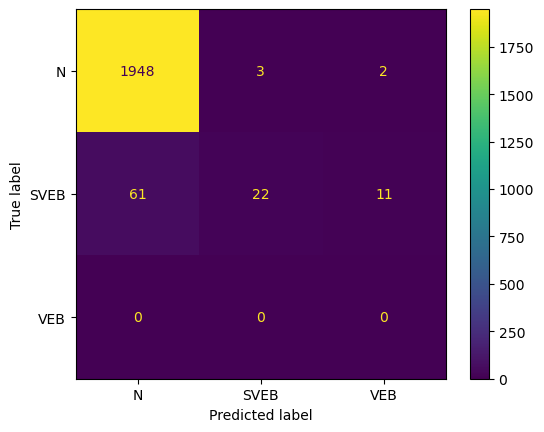

Fold 36:
  Test:  patient=35


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      2030
         1.0       0.00      0.00      0.00         0
         2.0       0.96      0.70      0.81       396

    accuracy                           0.92      2426
   macro avg       0.63      0.55      0.59      2426
weighted avg       0.95      0.92      0.93      2426

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.943880  0.0    0.958478  0.918384     0.634119      0.946263
recall        0.961084  NaN    0.699495  0.918384     0.553526      0.918384
f1-score      0.952404  NaN    0.808759  0.918384     0.587054      0.928957
support    2030.000000  0.0  396.000000  0.918384  2426.000000   2426.000000


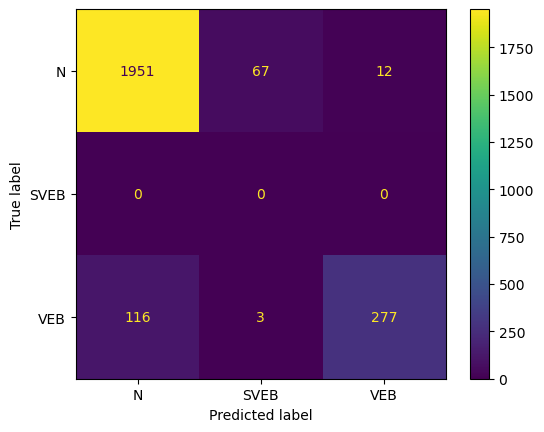

Fold 37:
  Test:  patient=36
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      2273
         1.0       0.39      0.13      0.19       209
         2.0       0.00      0.00      0.00         0

    accuracy                           0.90      2482
   macro avg       0.44      0.37      0.38      2482
weighted avg       0.88      0.90      0.88      2482

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.925599    0.391304  0.0  0.898066     0.438968      0.880608
recall        0.968764    0.129187  NaN  0.898066     0.365983      0.898066
f1-score      0.946690    0.194245  NaN  0.898066     0.380311      0.883329
support    2273.000000  209.000000  0.0  0.898066  2482.000000   2482.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

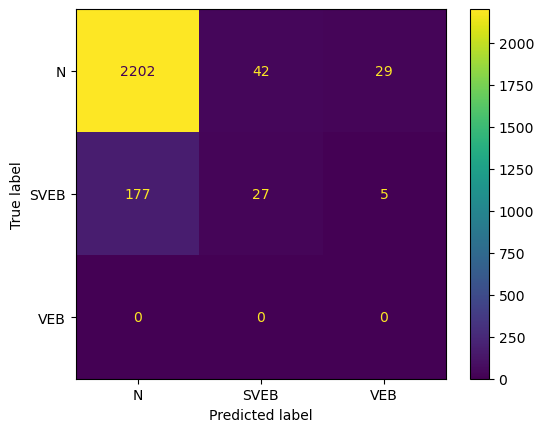

Fold 38:
  Test:  patient=37
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94      2044
         1.0       0.25      0.05      0.09        73
         2.0       0.87      0.59      0.70       473

    accuracy                           0.89      2590
   macro avg       0.67      0.55      0.58      2590
weighted avg       0.88      0.89      0.88      2590

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.900089   0.250000    0.869565  0.892278     0.673218   
recall        0.991683   0.054795    0.591966  0.892278     0.546148   
f1-score      0.943669   0.089888    0.704403  0.892278     0.579320   
support    2044.000000  73.000000  473.000000  0.892278  2590.000000   

           weighted avg  
precision      0.876191  
recall         0.892278  
f1-score       0.875908  
support     2590.000000  


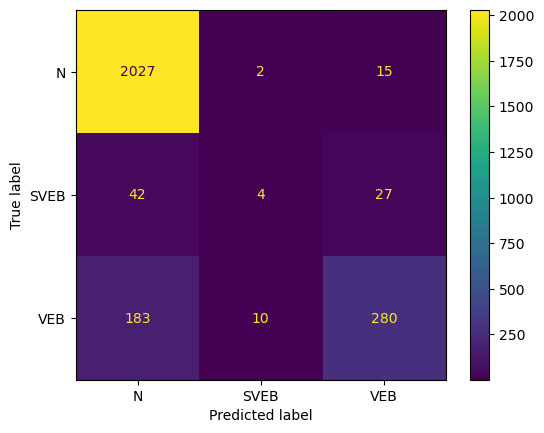

Fold 39:
  Test:  patient=38
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1687
         1.0       0.00      0.00      0.00         3
         2.0       0.76      0.85      0.80       362

    accuracy                           0.92      2052
   macro avg       0.58      0.60      0.59      2052
weighted avg       0.94      0.92      0.93      2052

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.979541  0.0    0.755501  0.920565     0.578347      0.938586
recall        0.936574  0.0    0.853591  0.920565     0.596722      0.920565
f1-score      0.957576  0.0    0.801556  0.920565     0.586377      0.928652
support    1687.000000  3.0  362.000000  0.920565  2052.000000   2052.000000


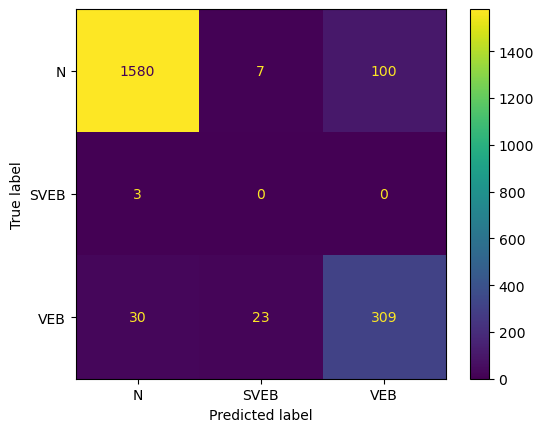

Fold 40:
  Test:  patient=39


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.81      0.89      2254
         1.0       0.00      0.00      0.00         0
         2.0       0.00      1.00      0.01         1

    accuracy                           0.81      2255
   macro avg       0.33      0.60      0.30      2255
weighted avg       1.00      0.81      0.89      2255

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.002857  0.806652     0.334286      0.999558
recall        0.806566  NaN  1.000000  0.806652     0.602189      0.806652
f1-score      0.892927  NaN  0.005698  0.806652     0.299542      0.892534
support    2254.000000  0.0  1.000000  0.806652  2255.000000   2255.000000


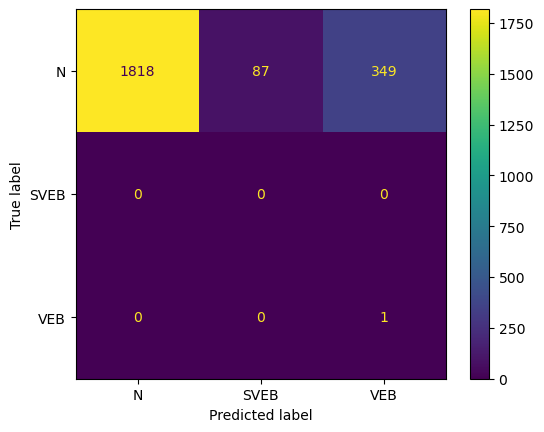

Fold 41:
  Test:  patient=40
              precision    recall  f1-score   support

         0.0       1.00      0.88      0.94      1567
         1.0       0.00      0.00      0.00         1
         2.0       0.02      1.00      0.03         2

    accuracy                           0.88      1570
   macro avg       0.34      0.63      0.32      1570
weighted avg       1.00      0.88      0.94      1570

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999278  0.0  0.017391  0.883439     0.338890      0.997391
recall        0.883854  0.0  1.000000  0.883439     0.627951      0.883439
f1-score      0.938029  0.0  0.034188  0.883439     0.324072      0.936280
support    1567.000000  1.0  2.000000  0.883439  1570.000000   1570.000000


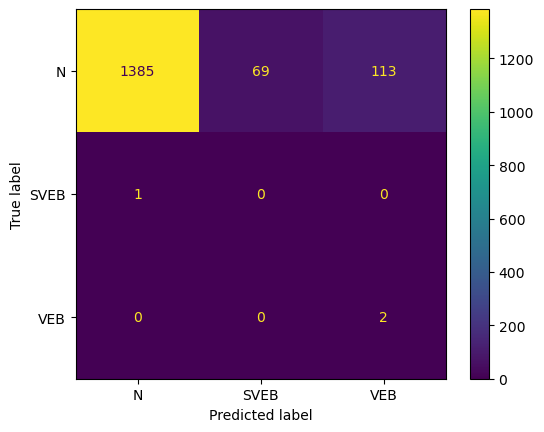

Fold 42:
  Test:  patient=41
              precision    recall  f1-score   support

         0.0       0.22      0.94      0.36       398
         1.0       0.59      0.02      0.04      1381
         2.0       0.00      0.00      0.00         0

    accuracy                           0.23      1779
   macro avg       0.27      0.32      0.13      1779
weighted avg       0.51      0.23      0.11      1779

                  0.0          1.0  2.0  accuracy    macro avg  weighted avg
precision    0.220141     0.588235  0.0  0.228218     0.269459      0.505885
recall       0.944724     0.021723  NaN  0.228218     0.322149      0.228218
f1-score     0.357075     0.041899  NaN  0.228218     0.132991      0.112411
support    398.000000  1381.000000  0.0  0.228218  1779.000000   1779.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

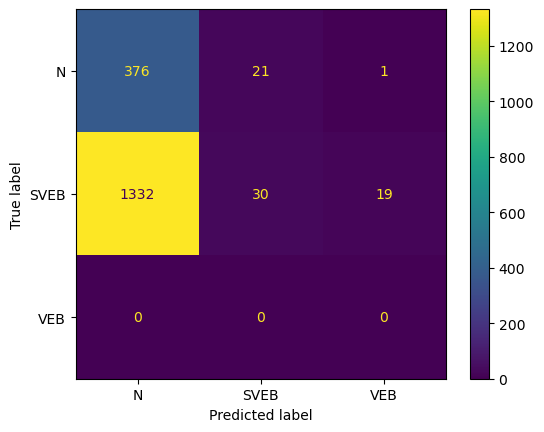

Fold 43:
  Test:  patient=42
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      2229
         1.0       0.00      0.00      0.00         7
         2.0       0.92      0.83      0.87       831

    accuracy                           0.93      3067
   macro avg       0.62      0.60      0.61      3067
weighted avg       0.93      0.93      0.93      3067

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.941840  0.0    0.918883  0.932833     0.620241      0.933470
recall        0.973531  0.0    0.831528  0.932833     0.601686      0.932833
f1-score      0.957423  0.0    0.873026  0.932833     0.610150      0.932371
support    2229.000000  7.0  831.000000  0.932833  3067.000000   3067.000000


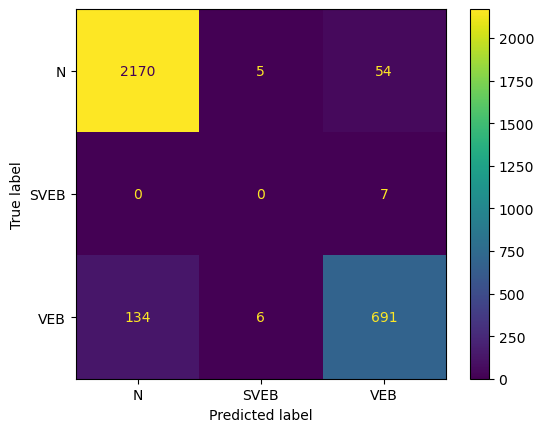

Fold 44:
  Test:  patient=43
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2699
         1.0       0.47      0.14      0.22        50
         2.0       0.20      0.67      0.31         3

    accuracy                           0.98      2752
   macro avg       0.55      0.60      0.50      2752
weighted avg       0.97      0.98      0.97      2752

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.984598   0.466667  0.200000  0.978924     0.550422   
recall        0.994813   0.140000  0.666667  0.978924     0.600493   
f1-score      0.989679   0.215385  0.307692  0.978924     0.504252   
support    2699.000000  50.000000  3.000000  0.978924  2752.000000   

           weighted avg  
precision      0.974333  
recall         0.978924  
f1-score       0.974868  
support     2752.000000  


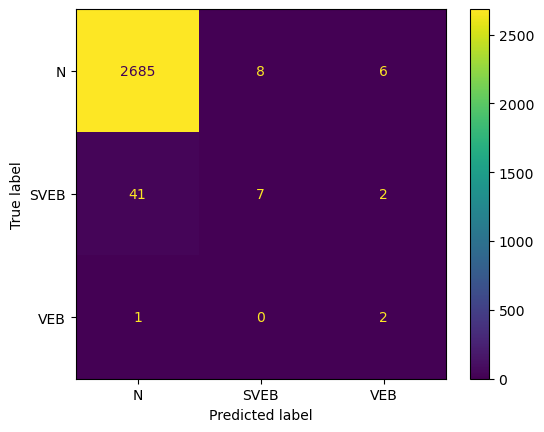

Fold 45:
  Test:  patient=44


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94       210
         1.0       0.00      0.00      0.00         0
         2.0       0.13      1.00      0.23         3

    accuracy                           0.89       213
   macro avg       0.38      0.63      0.39       213
weighted avg       0.99      0.89      0.93       213

                  0.0  1.0       2.0  accuracy   macro avg  weighted avg
precision    1.000000  0.0  0.130435  0.887324    0.376812      0.987753
recall       0.885714  NaN  1.000000  0.887324    0.628571      0.887324
f1-score     0.939394  NaN  0.230769  0.887324    0.390054      0.929413
support    210.000000  0.0  3.000000  0.887324  213.000000    213.000000


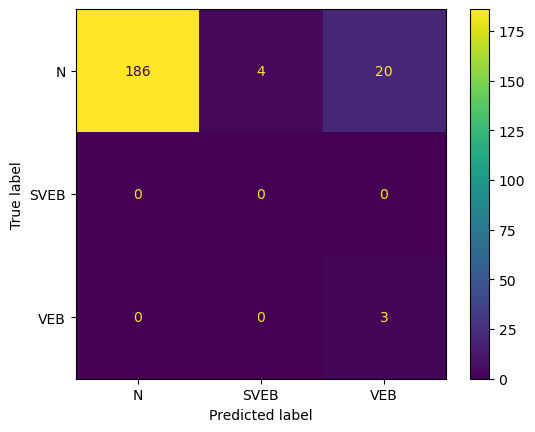

Fold 46:
  Test:  patient=45
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.97     56792
         1.0       0.00      0.00      0.00      1530
         2.0       0.81      0.56      0.66      4060

    accuracy                           0.93     62382
   macro avg       0.59      0.52      0.54     62382
weighted avg       0.92      0.93      0.92     62382

                    0.0          1.0          2.0  accuracy     macro avg  \
precision      0.952582     0.004320     0.808059  0.931952      0.588320   
recall         0.983360     0.002614     0.563054  0.931952      0.516343   
f1-score       0.967726     0.003257     0.663667  0.931952      0.544883   
support    56792.000000  1530.000000  4060.000000  0.931952  62382.000000   

           weighted avg  
precision      0.919918  
recall         0.931952  
f1-score       0.924282  
support    62382.000000  


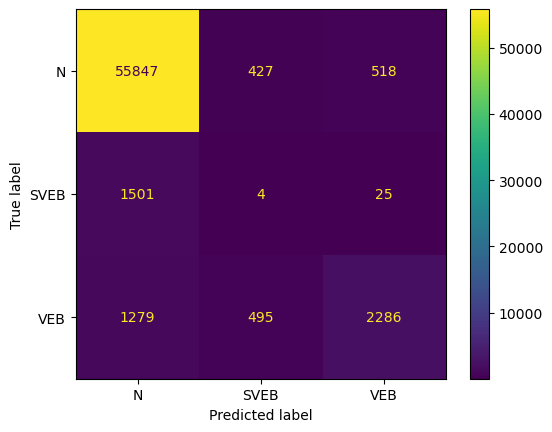

Fold 47:
  Test:  patient=46
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     18041
         1.0       0.01      0.20      0.01         5
         2.0       0.18      0.83      0.29        24

    accuracy                           0.99     18070
   macro avg       0.39      0.67      0.43     18070
weighted avg       1.00      0.99      0.99     18070

                    0.0       1.0        2.0  accuracy     macro avg  \
precision      0.999663  0.006993   0.176991  0.986663      0.394549   
recall         0.987085  0.200000   0.833333  0.986663      0.673473   
f1-score       0.993334  0.013514   0.291971  0.986663      0.432940   
support    18041.000000  5.000000  24.000000  0.986663  18070.000000   

           weighted avg  
precision      0.998296  
recall         0.986663  
f1-score       0.992132  
support    18070.000000  


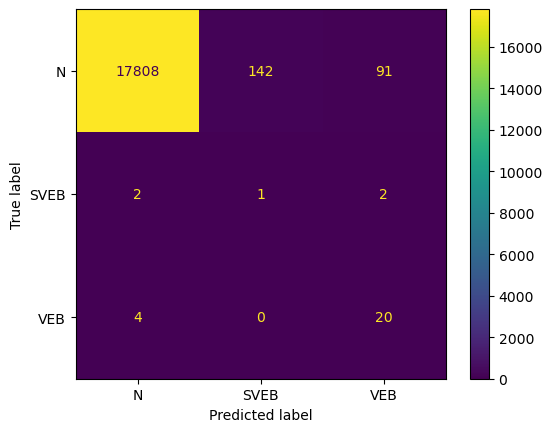

Fold 48:
  Test:  patient=47


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97     25232
         1.0       0.00      0.00      0.00         0
         2.0       0.08      0.70      0.15        33

    accuracy                           0.95     25265
   macro avg       0.36      0.55      0.37     25265
weighted avg       1.00      0.95      0.97     25265

                    0.0  1.0        2.0  accuracy     macro avg  weighted avg
precision      0.999624  0.0   0.084559  0.947595      0.361394      0.998429
recall         0.947923  NaN   0.696970  0.947595      0.548298      0.947595
f1-score       0.973087  NaN   0.150820  0.947595      0.374636      0.972013
support    25232.000000  0.0  33.000000  0.947595  25265.000000  25265.000000


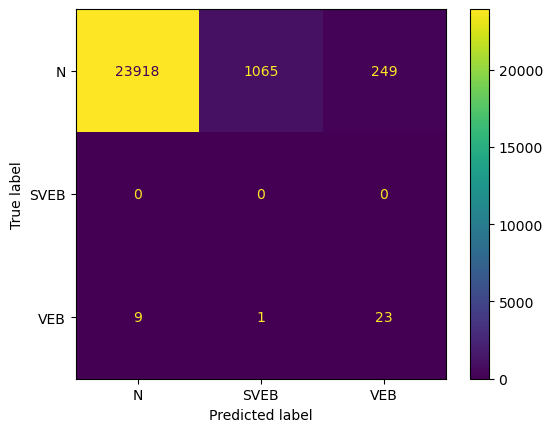

Fold 49:
  Test:  patient=48
              precision    recall  f1-score   support

         0.0       1.00      0.77      0.87        66
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.77        66
   macro avg       0.33      0.26      0.29        66
weighted avg       1.00      0.77      0.87        66

                 0.0  1.0  2.0  accuracy  macro avg  weighted avg
precision   1.000000  0.0  0.0  0.772727   0.333333      1.000000
recall      0.772727  NaN  NaN  0.772727   0.257576      0.772727
f1-score    0.871795  NaN  NaN  0.772727   0.290598      0.871795
support    66.000000  0.0  0.0  0.772727  66.000000     66.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

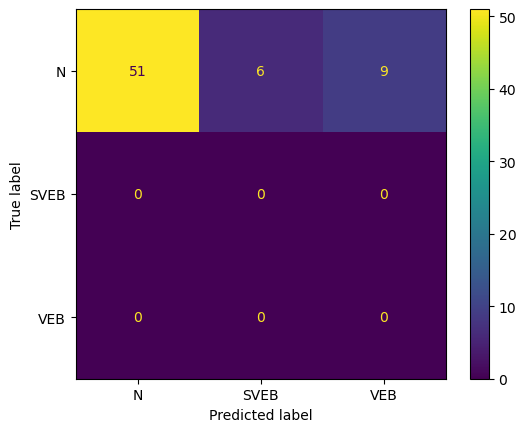

Fold 50:
  Test:  patient=49


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.96      0.97     20894
         1.0       0.00      0.00      0.00         0
         2.0       0.77      0.77      0.77      1538

    accuracy                           0.95     22432
   macro avg       0.59      0.58      0.58     22432
weighted avg       0.97      0.95      0.96     22432

                    0.0  1.0          2.0  accuracy     macro avg  \
precision      0.986073  0.0     0.774934  0.949046      0.587002   
recall         0.962382  NaN     0.767880  0.949046      0.576754   
f1-score       0.974083  NaN     0.771391  0.949046      0.581825   
support    20894.000000  0.0  1538.000000  0.949046  22432.000000   

           weighted avg  
precision      0.971597  
recall         0.949046  
f1-score       0.960186  
support    22432.000000  


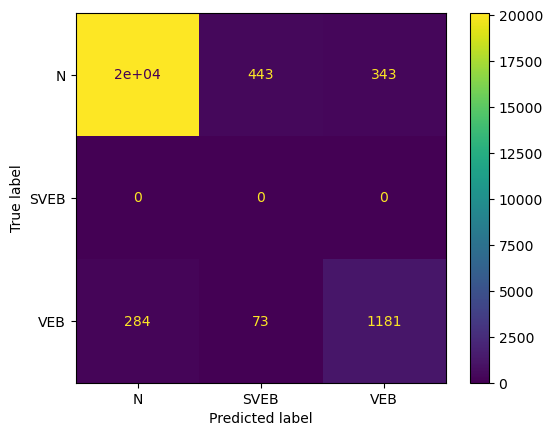

Fold 51:
  Test:  patient=50
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     14088
         1.0       0.00      0.00      0.00         0
         2.0       0.95      0.80      0.87       658

    accuracy                           0.99     14746
   macro avg       0.65      0.60      0.62     14746
weighted avg       0.99      0.99      0.99     14746

                    0.0  1.0         2.0  accuracy     macro avg  weighted avg
precision      0.993214  0.0    0.951439  0.988743      0.648218      0.991350
recall         0.997374  NaN    0.803951  0.988743      0.600442      0.988743
f1-score       0.995290  NaN    0.871499  0.988743      0.622263      0.989766
support    14088.000000  0.0  658.000000  0.988743  14746.000000  14746.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

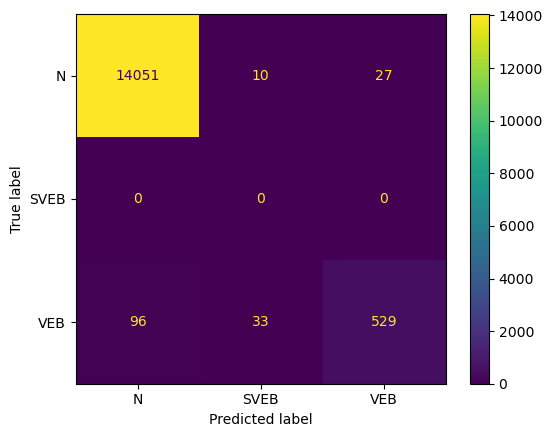

Fold 52:
  Test:  patient=51
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      3548
         1.0       0.00      0.00      0.00        11
         2.0       0.79      0.92      0.85       361

    accuracy                           0.97      3920
   macro avg       0.59      0.63      0.61      3920
weighted avg       0.97      0.97      0.97      3920

                   0.0   1.0         2.0  accuracy    macro avg  weighted avg
precision     0.990249   0.0    0.791866  0.965306     0.594039      0.969201
recall        0.973224   0.0    0.916898  0.965306     0.630041      0.965306
f1-score      0.981663   0.0    0.849807  0.965306     0.610490      0.966766
support    3548.000000  11.0  361.000000  0.965306  3920.000000   3920.000000


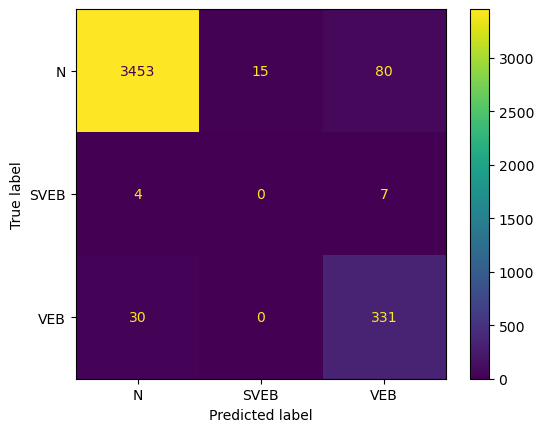

Fold 53:
  Test:  patient=52


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.97      0.92      0.95     14681
         1.0       0.00      0.00      0.00         0
         2.0       0.57      0.68      0.62      1835

    accuracy                           0.90     16516
   macro avg       0.52      0.54      0.52     16516
weighted avg       0.93      0.90      0.91     16516

                    0.0  1.0          2.0  accuracy     macro avg  \
precision      0.973629  0.0     0.573583  0.896403      0.515738   
recall         0.922962  NaN     0.683924  0.896403      0.535628   
f1-score       0.947619  NaN     0.623913  0.896403      0.523844   
support    14681.000000  0.0  1835.000000  0.896403  16516.000000   

           weighted avg  
precision      0.929182  
recall         0.896403  
f1-score       0.911654  
support    16516.000000  


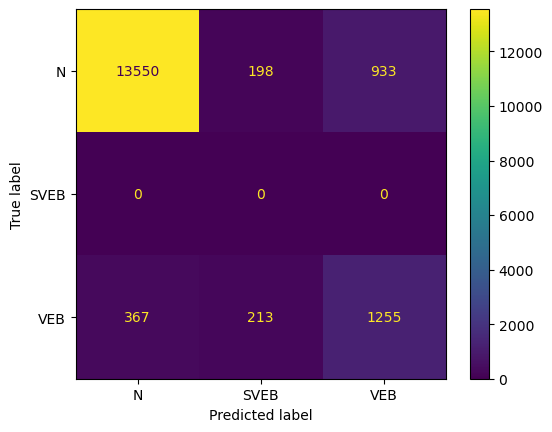

Fold 54:
  Test:  patient=53
              precision    recall  f1-score   support

         0.0       0.99      0.71      0.82     79883
         1.0       0.01      0.09      0.01        23
         2.0       0.08      0.77      0.15      2689

    accuracy                           0.71     82595
   macro avg       0.36      0.52      0.33     82595
weighted avg       0.96      0.71      0.80     82595

                    0.0        1.0          2.0  accuracy     macro avg  \
precision      0.992602   0.005682     0.081694  0.707464      0.359993   
recall         0.705407   0.086957     0.773894  0.707464      0.522086   
f1-score       0.824717   0.010667     0.147788  0.707464      0.327724   
support    79883.000000  23.000000  2689.000000  0.707464  82595.000000   

           weighted avg  
precision      0.962671  
recall         0.707464  
f1-score       0.802452  
support    82595.000000  


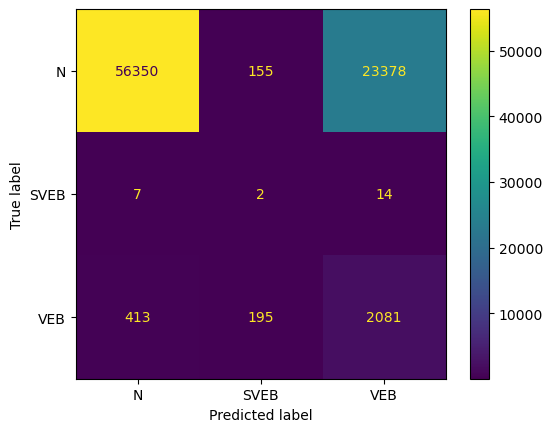

Fold 55:
  Test:  patient=54
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5452
         1.0       0.00      0.00      0.00         1
         2.0       0.34      0.86      0.49        65

    accuracy                           0.97      5518
   macro avg       0.45      0.61      0.49      5518
weighted avg       0.99      0.97      0.98      5518

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999436  0.0   0.339394  0.973904     0.446277      0.991480
recall        0.975422  0.0   0.861538  0.973904     0.612320      0.973904
f1-score      0.987283  0.0   0.486957  0.973904     0.491413      0.981210
support    5452.000000  1.0  65.000000  0.973904  5518.000000   5518.000000


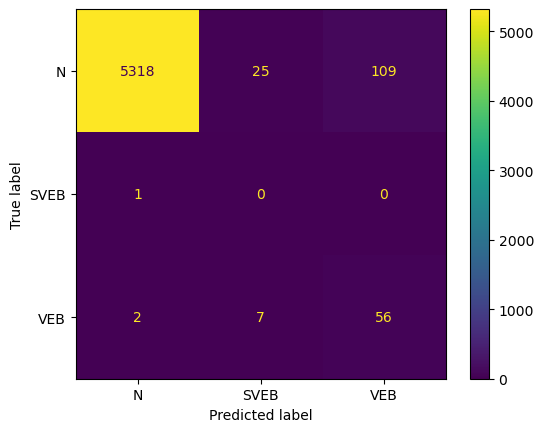

Fold 56:
  Test:  patient=55
              precision    recall  f1-score   support

         0.0       0.99      0.86      0.92      1844
         1.0       0.06      0.50      0.10        30
         2.0       0.12      0.33      0.18         6

    accuracy                           0.85      1880
   macro avg       0.39      0.57      0.40      1880
weighted avg       0.97      0.85      0.91      1880

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.988806   0.058594  0.125000  0.854787     0.390800   
recall        0.862256   0.500000  0.333333  0.854787     0.565196   
f1-score      0.921205   0.104895  0.181818  0.854787     0.402639   
support    1844.000000  30.000000  6.000000  0.854787  1880.000000   

           weighted avg  
precision      0.971205  
recall         0.854787  
f1-score       0.905819  
support     1880.000000  


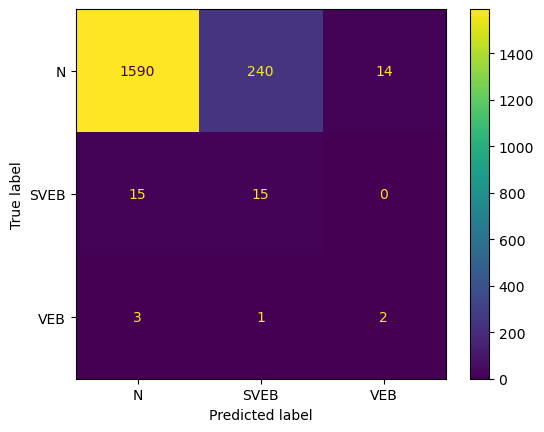

Fold 57:
  Test:  patient=56
              precision    recall  f1-score   support

         0.0       0.97      0.92      0.94      2173
         1.0       0.16      0.21      0.19        66
         2.0       0.60      0.81      0.69       268

    accuracy                           0.89      2507
   macro avg       0.58      0.65      0.61      2507
weighted avg       0.91      0.89      0.90      2507

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.969888   0.164706    0.600551   0.88911     0.578382   
recall        0.919006   0.212121    0.813433   0.88911     0.648187   
f1-score      0.943762   0.185430    0.690967   0.88911     0.606720   
support    2173.000000  66.000000  268.000000   0.88911  2507.000000   

           weighted avg  
precision      0.909208  
recall         0.889110  
f1-score       0.896774  
support     2507.000000  


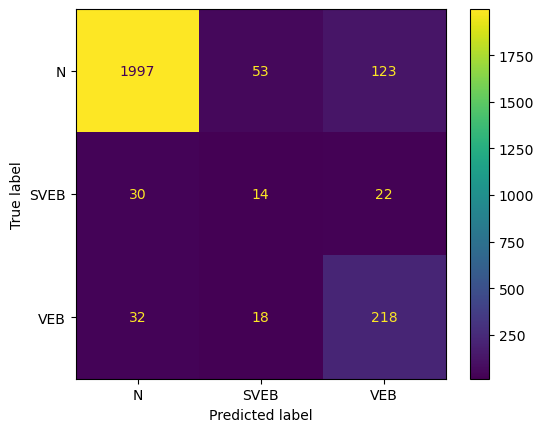

Fold 58:
  Test:  patient=57


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      1584
         1.0       0.00      0.00      0.00         0
         2.0       0.41      0.28      0.33        85

    accuracy                           0.92      1669
   macro avg       0.46      0.41      0.43      1669
weighted avg       0.94      0.92      0.93      1669

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.963602  0.0   0.406780  0.918514     0.456794      0.935243
recall        0.952652  NaN   0.282353  0.918514     0.411668      0.918514
f1-score      0.958095  NaN   0.333333  0.918514     0.430476      0.926277
support    1584.000000  0.0  85.000000  0.918514  1669.000000   1669.000000


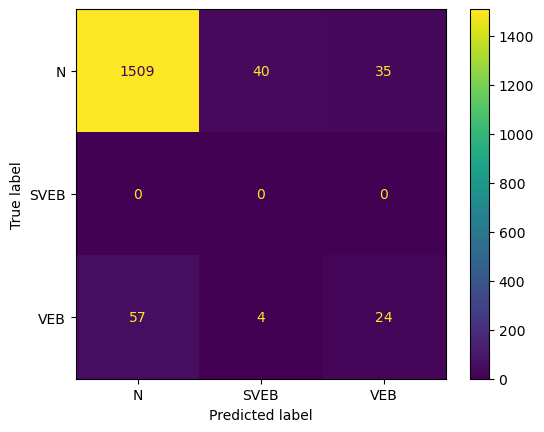

Fold 59:
  Test:  patient=58
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1922
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.97      0.98       143

    accuracy                           1.00      2065
   macro avg       0.66      0.66      0.66      2065
weighted avg       1.00      1.00      1.00      2065

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.997917  0.0    0.992857  0.995157     0.663591      0.997566
recall        0.996878  NaN    0.972028  0.995157     0.656302      0.995157
f1-score      0.997397  NaN    0.982332  0.995157     0.659910      0.996354
support    1922.000000  0.0  143.000000  0.995157  2065.000000   2065.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

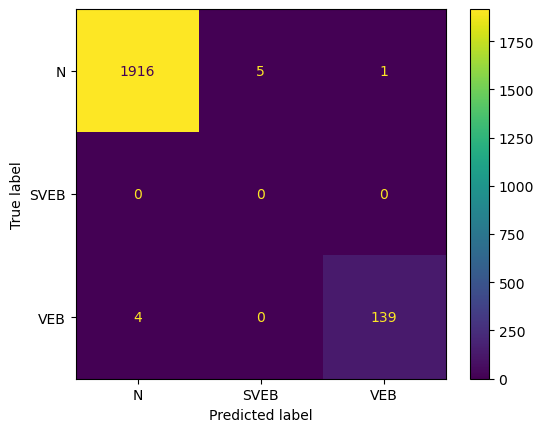

Fold 60:
  Test:  patient=59


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      2651
         1.0       0.00      0.00      0.00         0
         2.0       0.74      0.61      0.67       181

    accuracy                           0.92      2832
   macro avg       0.57      0.52      0.54      2832
weighted avg       0.97      0.92      0.94      2832

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.980384  0.0    0.743243  0.921257     0.574543      0.965228
recall        0.942663  NaN    0.607735  0.921257     0.516799      0.921257
f1-score      0.961154  NaN    0.668693  0.921257     0.543282      0.942462
support    2651.000000  0.0  181.000000  0.921257  2832.000000   2832.000000


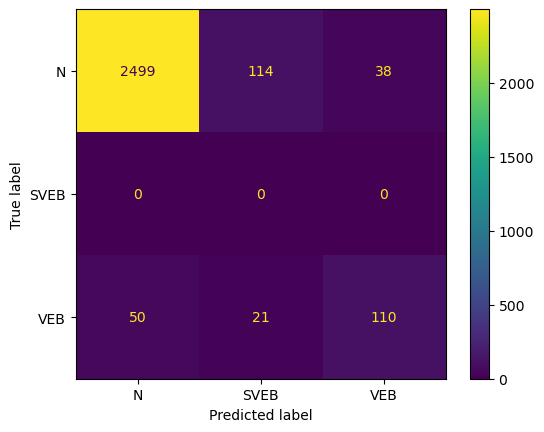

Fold 61:
  Test:  patient=60
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2089
         1.0       0.00      0.00      0.00         0
         2.0       0.96      0.86      0.90       207

    accuracy                           0.97      2296
   macro avg       0.65      0.61      0.63      2296
weighted avg       0.99      0.97      0.98      2296

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.988439  0.0    0.956757  0.970819     0.648399      0.985583
recall        0.982288  NaN    0.855072  0.970819     0.612454      0.970819
f1-score      0.985354  NaN    0.903061  0.970819     0.629472      0.977935
support    2089.000000  0.0  207.000000  0.970819  2296.000000   2296.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

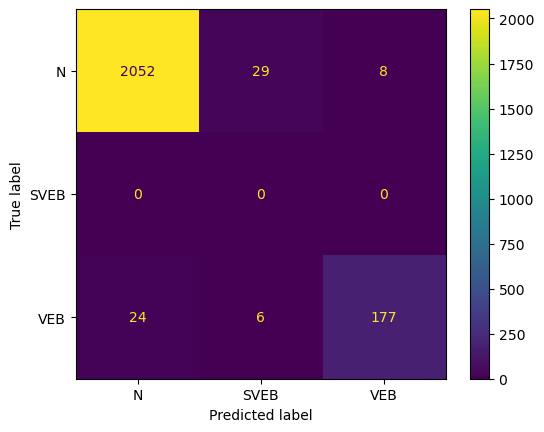

Fold 62:
  Test:  patient=61
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2950
         1.0       0.04      0.05      0.04        40
         2.0       0.37      0.59      0.45        29

    accuracy                           0.97      3019
   macro avg       0.47      0.54      0.49      3019
weighted avg       0.97      0.97      0.97      3019

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.992803   0.036364   0.369565  0.965883     0.466244   
recall        0.982034   0.050000   0.586207  0.965883     0.539414   
f1-score      0.987389   0.042105   0.453333  0.965883     0.494276   
support    2950.000000  40.000000  29.000000  0.965883  3019.000000   

           weighted avg  
precision      0.974144  
recall         0.965883  
f1-score       0.969735  
support     3019.000000  


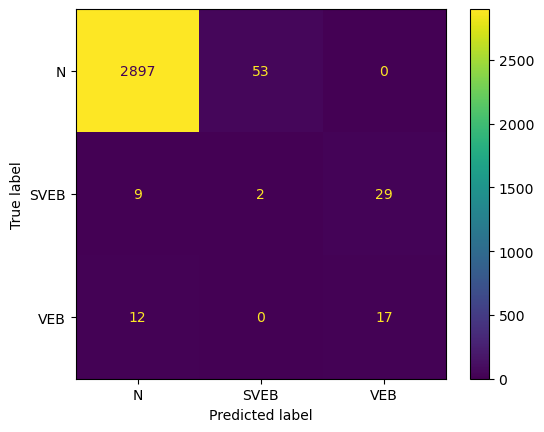

Fold 63:
  Test:  patient=62


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      1911
         1.0       0.08      0.34      0.13        29
         2.0       0.00      0.00      0.00         0

    accuracy                           0.92      1940
   macro avg       0.36      0.43      0.36      1940
weighted avg       0.98      0.92      0.95      1940

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.993300   0.082645  0.0  0.922165     0.358648      0.979687
recall        0.930926   0.344828  NaN  0.922165     0.425251      0.922165
f1-score      0.961102   0.133333  NaN  0.922165     0.364812      0.948728
support    1911.000000  29.000000  0.0  0.922165  1940.000000   1940.000000


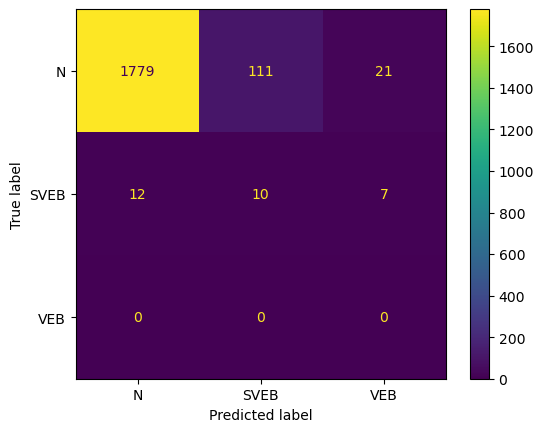

Fold 64:
  Test:  patient=63
              precision    recall  f1-score   support

         0.0       0.99      0.89      0.94      1744
         1.0       0.09      0.55      0.15        20
         2.0       0.04      0.50      0.08         8

    accuracy                           0.88      1772
   macro avg       0.38      0.65      0.39      1772
weighted avg       0.98      0.88      0.93      1772

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.994855   0.088710  0.043011   0.88149     0.375525   
recall        0.887041   0.550000  0.500000   0.88149     0.645680   
f1-score      0.937860   0.152778  0.079208   0.88149     0.389949   
support    1744.000000  20.000000  8.000000   0.88149  1772.000000   

           weighted avg  
precision      0.980331  
recall         0.881490  
f1-score       0.925122  
support     1772.000000  


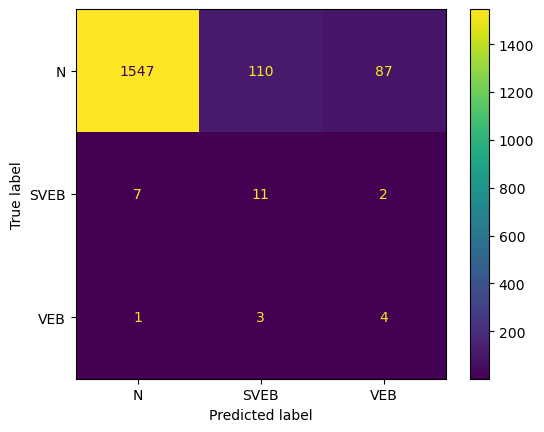

Fold 65:
  Test:  patient=64
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2430
         1.0       0.53      0.52      0.52       112
         2.0       0.00      0.00      0.00         0

    accuracy                           0.96      2542
   macro avg       0.50      0.50      0.50      2542
weighted avg       0.96      0.96      0.96      2542

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.979381    0.532110  0.0   0.95712     0.503831      0.959675
recall        0.977366    0.517857  NaN   0.95712     0.498408      0.957120
f1-score      0.978373    0.524887  NaN   0.95712     0.501087      0.958392
support    2430.000000  112.000000  0.0   0.95712  2542.000000   2542.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

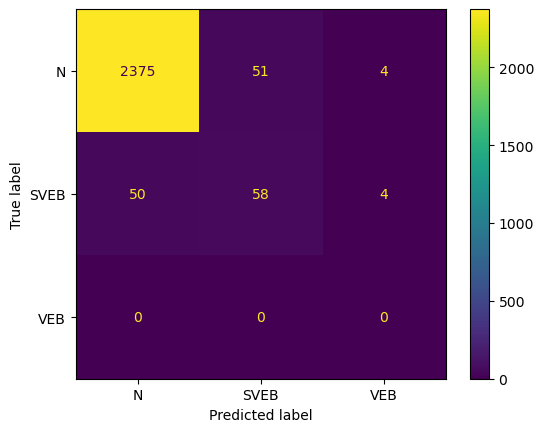

Fold 66:
  Test:  patient=65
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1837
         1.0       0.05      0.12      0.07         8
         2.0       0.91      0.73      0.81        56

    accuracy                           0.98      1901
   macro avg       0.65      0.62      0.62      1901
weighted avg       0.99      0.98      0.98      1901

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.992366  0.045455   0.911111  0.979484     0.649644   
recall        0.990746  0.125000   0.732143  0.979484     0.615963   
f1-score      0.991555  0.066667   0.811881  0.979484     0.623368   
support    1837.000000  8.000000  56.000000  0.979484  1901.000000   

           weighted avg  
precision      0.985988  
recall         0.979484  
f1-score       0.982370  
support     1901.000000  


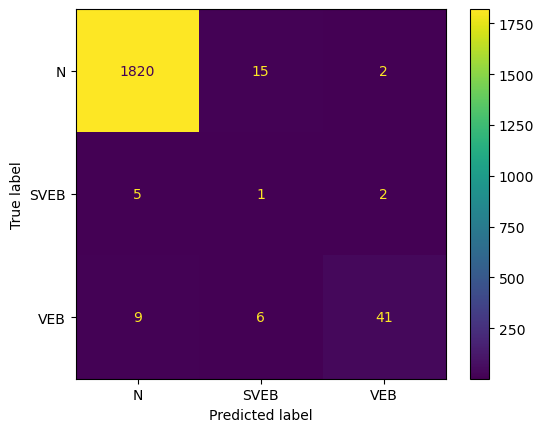

Fold 67:
  Test:  patient=66
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      1404
         1.0       0.00      0.00      0.00         1
         2.0       0.67      0.50      0.57        28

    accuracy                           0.96      1433
   macro avg       0.55      0.49      0.52      1433
weighted avg       0.99      0.96      0.97      1433

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.994891  0.0   0.666667  0.960921     0.553852      0.987783
recall        0.970798  0.0   0.500000  0.960921     0.490266      0.960921
f1-score      0.982696  0.0   0.571429  0.960921     0.518042      0.973975
support    1404.000000  1.0  28.000000  0.960921  1433.000000   1433.000000


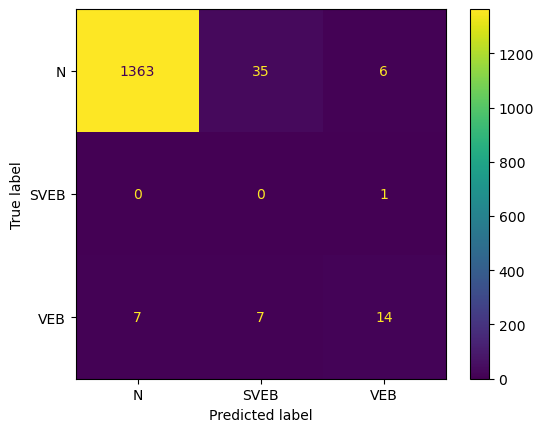

Fold 68:
  Test:  patient=67
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      1756
         1.0       0.04      0.21      0.06        14
         2.0       0.35      0.63      0.45        70

    accuracy                           0.90      1840
   macro avg       0.46      0.59      0.49      1840
weighted avg       0.96      0.90      0.93      1840

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.987164   0.037975   0.352000  0.903261     0.459046   
recall        0.919704   0.214286   0.628571  0.903261     0.587520   
f1-score      0.952241   0.064516   0.451282  0.903261     0.489346   
support    1756.000000  14.000000  70.000000  0.903261  1840.000000   

           weighted avg  
precision      0.955778  
recall         0.903261  
f1-score       0.926428  
support     1840.000000  


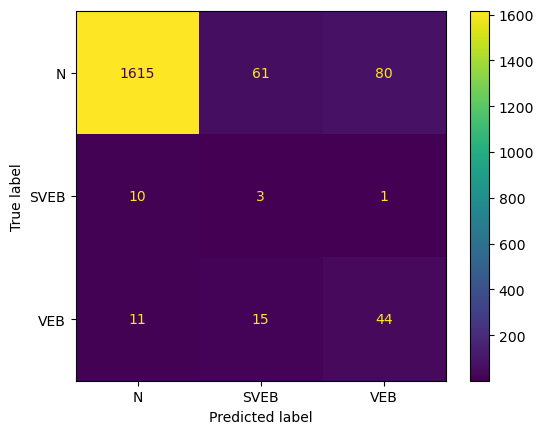

Fold 69:
  Test:  patient=68
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2161
         1.0       0.99      0.59      0.74       185
         2.0       0.04      1.00      0.08         3

    accuracy                           0.97      2349
   macro avg       0.68      0.86      0.61      2349
weighted avg       1.00      0.97      0.98      2349

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.996762    0.990991  0.039474  0.965517     0.675742   
recall        0.997224    0.594595  1.000000  0.965517     0.863939   
f1-score      0.996993    0.743243  0.075949  0.965517     0.605395   
support    2161.000000  185.000000  3.000000  0.965517  2349.000000   

           weighted avg  
precision      0.995085  
recall         0.965517  
f1-score       0.975832  
support     2349.000000  


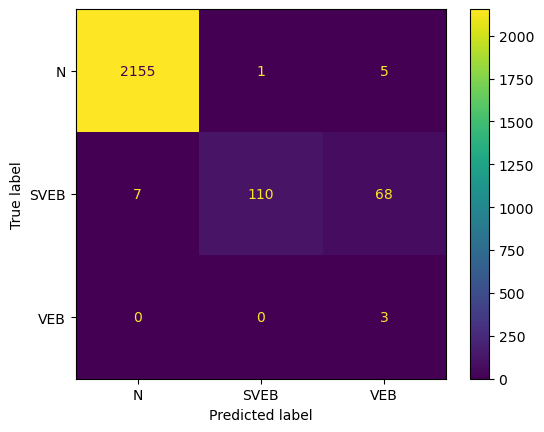

Fold 70:
  Test:  patient=69
              precision    recall  f1-score   support

         0.0       0.94      0.99      0.96      2480
         1.0       0.97      0.72      0.83       614
         2.0       0.41      0.56      0.47        36

    accuracy                           0.93      3130
   macro avg       0.77      0.76      0.75      3130
weighted avg       0.94      0.93      0.93      3130

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.936332    0.967249   0.408163  0.932588     0.770582   
recall        0.990323    0.721498   0.555556  0.932588     0.755792   
f1-score      0.962571    0.826493   0.470588  0.932588     0.753217   
support    2480.000000  614.000000  36.000000  0.932588  3130.000000   

           weighted avg  
precision      0.936322  
recall         0.932588  
f1-score       0.930218  
support     3130.000000  


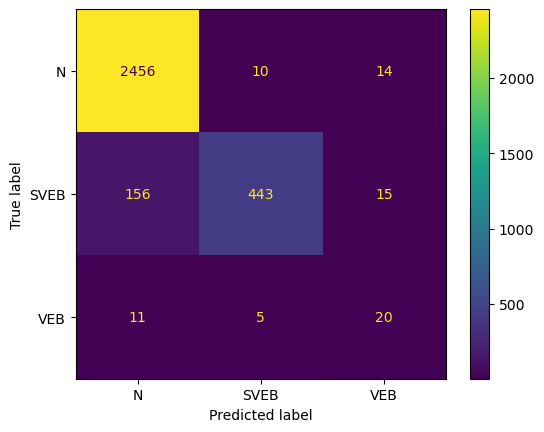

Fold 71:
  Test:  patient=70
              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88      1673
         1.0       0.88      0.08      0.15       658
         2.0       0.01      1.00      0.01         1

    accuracy                           0.74      2332
   macro avg       0.56      0.69      0.35      2332
weighted avg       0.82      0.74      0.67      2332

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.791627    0.883333  0.005882  0.736707     0.560281   
recall        0.994620    0.080547  1.000000  0.736707     0.691723   
f1-score      0.881589    0.147632  0.011696  0.736707     0.346973   
support    1673.000000  658.000000  1.000000  0.736707  2332.000000   

           weighted avg  
precision      0.817166  
recall         0.736707  
f1-score       0.674122  
support     2332.000000  


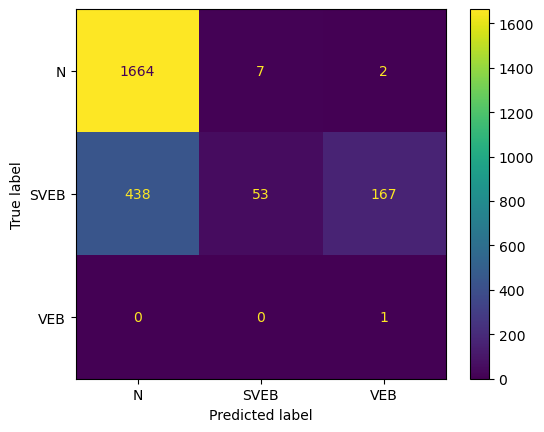

Fold 72:
  Test:  patient=71
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95      2477
         1.0       0.80      0.45      0.57       382
         2.0       0.00      0.00      0.00         0

    accuracy                           0.91      2859
   macro avg       0.57      0.47      0.51      2859
weighted avg       0.91      0.91      0.90      2859

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.923959    0.799065  0.0  0.905561     0.574341      0.907271
recall        0.976181    0.447644  NaN  0.905561     0.474608      0.905561
f1-score      0.949352    0.573826  NaN  0.905561     0.507726      0.899177
support    2477.000000  382.000000  0.0  0.905561  2859.000000   2859.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

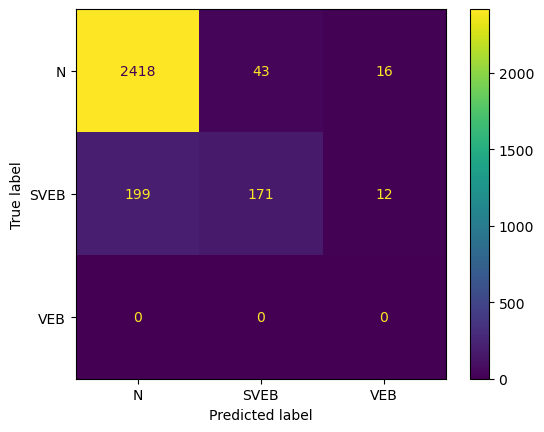

Fold 73:
  Test:  patient=72
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2214
         1.0       0.78      0.73      0.76       196
         2.0       0.00      0.00      0.00         7

    accuracy                           0.96      2417
   macro avg       0.59      0.57      0.58      2417
weighted avg       0.96      0.96      0.96      2417

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.982766    0.782609  0.0  0.956144     0.588458      0.963689
recall        0.978771    0.734694  0.0  0.956144     0.571155      0.956144
f1-score      0.980765    0.757895  0.0  0.956144     0.579553      0.959851
support    2214.000000  196.000000  7.0  0.956144  2417.000000   2417.000000


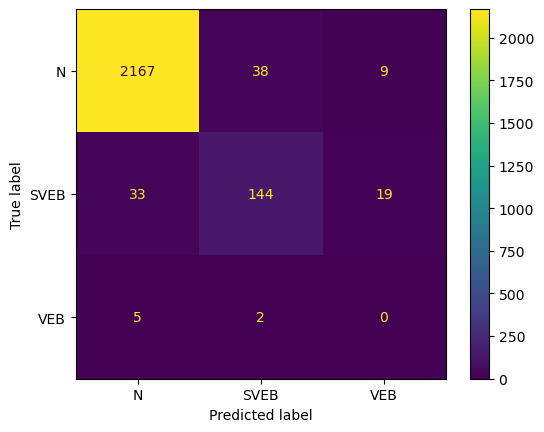

Fold 74:
  Test:  patient=73


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.07      0.13      2651
         1.0       0.94      0.11      0.20       145
         2.0       0.00      0.00      0.00         0

    accuracy                           0.07      2796
   macro avg       0.65      0.06      0.11      2796
weighted avg       1.00      0.07      0.14      2796

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000    0.941176  0.0  0.072604     0.647059      0.996949
recall        0.070539    0.110345  NaN  0.072604     0.060295      0.072604
f1-score      0.131783    0.197531  NaN  0.072604     0.109771      0.135193
support    2651.000000  145.000000  0.0  0.072604  2796.000000   2796.000000


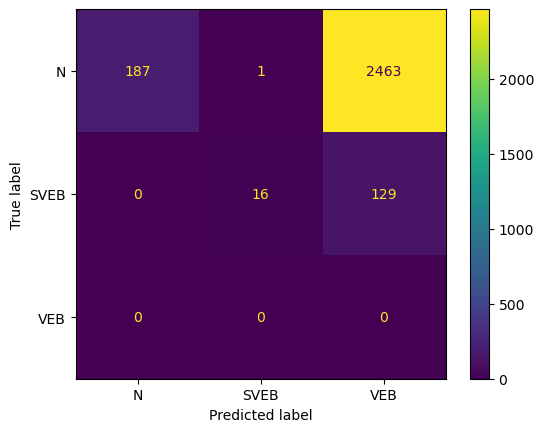

Fold 75:
  Test:  patient=74
              precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      2579
         1.0       0.18      0.68      0.28        80
         2.0       0.00      0.00      0.00         0

    accuracy                           0.89      2659
   macro avg       0.39      0.52      0.41      2659
weighted avg       0.97      0.89      0.92      2659

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.991431   0.175325  0.0   0.89056     0.388919      0.966877
recall        0.897247   0.675000  NaN   0.89056     0.524082      0.890560
f1-score      0.941991   0.278351  NaN   0.89056     0.406780      0.922024
support    2579.000000  80.000000  0.0   0.89056  2659.000000   2659.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

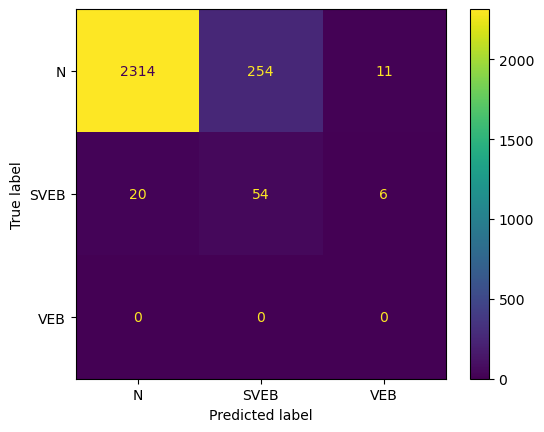

Fold 76:
  Test:  patient=75
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1842
         1.0       0.13      0.50      0.21        18
         2.0       0.00      0.00      0.00         0

    accuracy                           0.95      1860
   macro avg       0.38      0.49      0.40      1860
weighted avg       0.99      0.95      0.97      1860

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.996050   0.132353  0.0  0.953763     0.376134      0.987691
recall        0.958198   0.500000  NaN  0.953763     0.486066      0.953763
f1-score      0.976757   0.209302  NaN  0.953763     0.395353      0.969330
support    1842.000000  18.000000  0.0  0.953763  1860.000000   1860.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

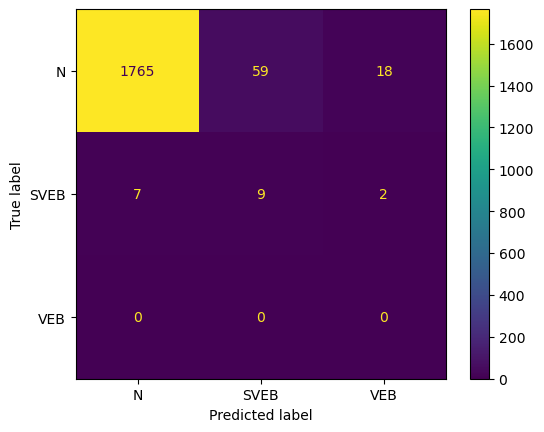

Fold 77:
  Test:  patient=76
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1755
         1.0       0.93      0.77      0.84       150
         2.0       0.50      1.00      0.67         6

    accuracy                           0.98      1911
   macro avg       0.81      0.92      0.83      1911
weighted avg       0.98      0.98      0.98      1911

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.982545    0.934959  0.500000  0.976452     0.805835   
recall        0.994302    0.766667  1.000000  0.976452     0.920323   
f1-score      0.988389    0.842491  0.666667  0.976452     0.832515   
support    1755.000000  150.000000  6.000000  0.976452  1911.000000   

           weighted avg  
precision      0.977295  
recall         0.976452  
f1-score       0.975927  
support     1911.000000  


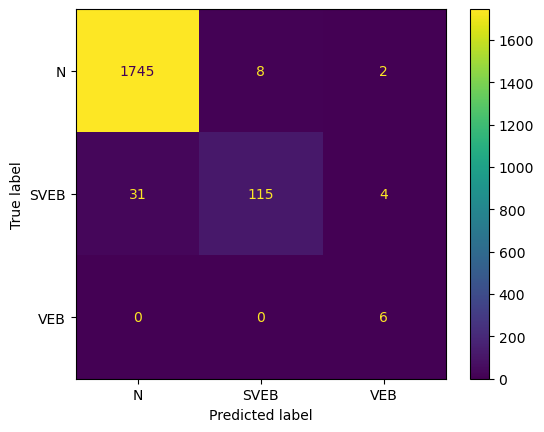

Fold 78:
  Test:  patient=77
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.98      1885
         1.0       0.52      0.95      0.68        80
         2.0       0.00      0.00      0.00         0

    accuracy                           0.95      1965
   macro avg       0.51      0.63      0.55      1965
weighted avg       0.98      0.95      0.96      1965

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.998887   0.524138  0.0  0.952163     0.507675      0.979559
recall        0.952255   0.950000  NaN  0.952163     0.634085      0.952163
f1-score      0.975014   0.675556  NaN  0.952163     0.550190      0.962822
support    1885.000000  80.000000  0.0  0.952163  1965.000000   1965.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

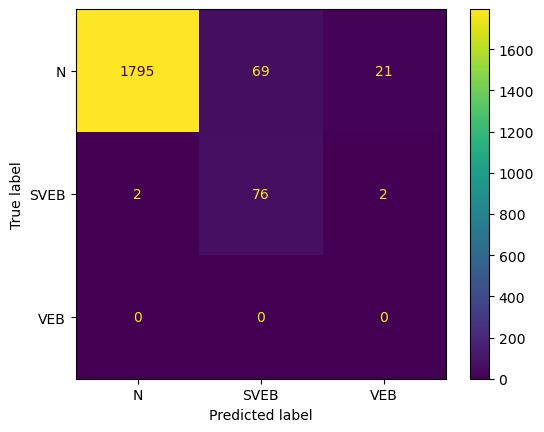

Fold 79:
  Test:  patient=78
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2339
         1.0       0.57      0.98      0.72        44
         2.0       0.07      1.00      0.13         1

    accuracy                           0.98      2384
   macro avg       0.55      0.99      0.61      2384
weighted avg       0.99      0.98      0.98      2384

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     1.000000   0.565789  0.071429  0.980705     0.545739   
recall        0.980761   0.977273  1.000000  0.980705     0.986011   
f1-score      0.990287   0.716667  0.133333  0.980705     0.613429   
support    2339.000000  44.000000  1.000000  0.980705  2384.000000   

           weighted avg  
precision      0.991597  
recall         0.980705  
f1-score       0.984878  
support     2384.000000  


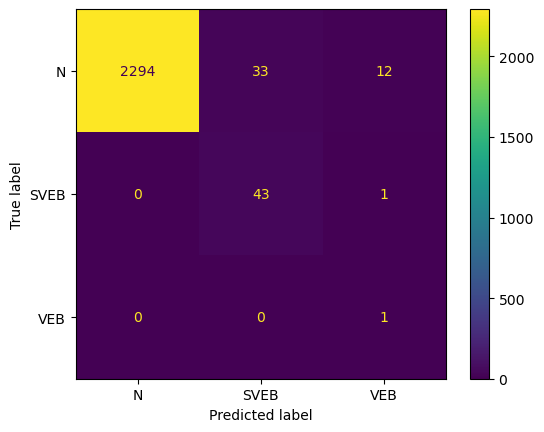

Fold 80:
  Test:  patient=79
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      1489
         1.0       0.15      0.02      0.03       106
         2.0       0.65      0.91      0.76       254

    accuracy                           0.91      1849
   macro avg       0.60      0.63      0.59      1849
weighted avg       0.89      0.91      0.89      1849

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.977073    0.153846    0.654391  0.909681     0.595104   
recall        0.973136    0.018868    0.909449  0.909681     0.633818   
f1-score      0.975101    0.033613    0.761120  0.909681     0.589945   
support    1489.000000  106.000000  254.000000  0.909681  1849.000000   

           weighted avg  
precision      0.885552  
recall         0.909681  
f1-score       0.891732  
support     1849.000000  


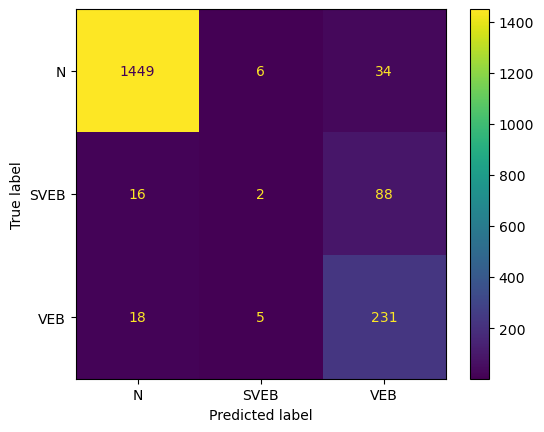

Fold 81:
  Test:  patient=80
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      2392
         1.0       0.25      0.26      0.25       104
         2.0       0.30      0.15      0.20        61

    accuracy                           0.92      2557
   macro avg       0.50      0.46      0.47      2557
weighted avg       0.91      0.92      0.91      2557

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.955335    0.247706   0.300000  0.917481     0.501014   
recall        0.965719    0.259615   0.147541  0.917481     0.457625   
f1-score      0.960499    0.253521   0.197802  0.917481     0.470607   
support    2392.000000  104.000000  61.000000  0.917481  2557.000000   

           weighted avg  
precision      0.910920  
recall         0.917481  
f1-score       0.913549  
support     2557.000000  


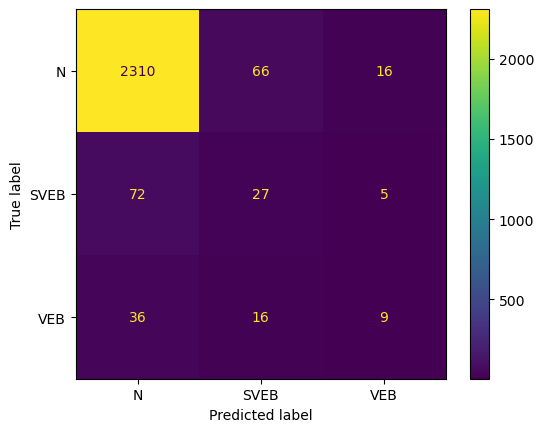

Fold 82:
  Test:  patient=81
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      2647
         1.0       0.11      0.52      0.18        21
         2.0       0.24      0.42      0.31        38

    accuracy                           0.94      2706
   macro avg       0.45      0.63      0.49      2706
weighted avg       0.97      0.94      0.96      2706

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.991342   0.111111   0.242424  0.940872     0.448292   
recall        0.951643   0.523810   0.421053  0.940872     0.632169   
f1-score      0.971087   0.183333   0.307692  0.940872     0.487371   
support    2647.000000  21.000000  38.000000  0.940872  2706.000000   

           weighted avg  
precision      0.973994  
recall         0.940872  
f1-score       0.955658  
support     2706.000000  


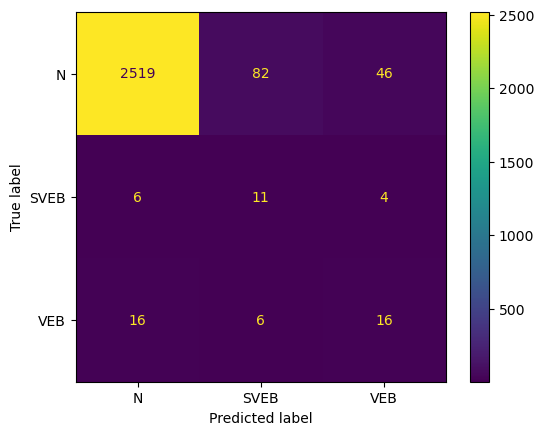

Fold 83:
  Test:  patient=82
              precision    recall  f1-score   support

         0.0       0.98      0.71      0.82      1648
         1.0       0.67      0.47      0.55        59
         2.0       0.00      0.00      0.00         0

    accuracy                           0.70      1707
   macro avg       0.55      0.40      0.46      1707
weighted avg       0.97      0.70      0.81      1707

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.978297   0.666667  0.0  0.702988     0.548321      0.967526
recall        0.711165   0.474576  NaN  0.702988     0.395247      0.702988
f1-score      0.823612   0.554455  NaN  0.702988     0.459356      0.814309
support    1648.000000  59.000000  0.0  0.702988  1707.000000   1707.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

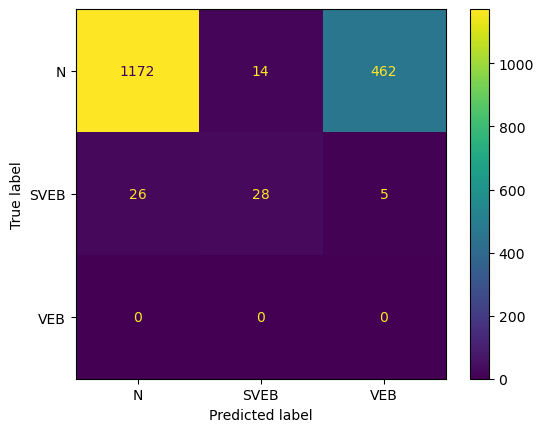

Fold 84:
  Test:  patient=83
              precision    recall  f1-score   support

         0.0       1.00      0.71      0.83      2826
         1.0       0.09      0.48      0.15        27
         2.0       0.01      0.37      0.03        30

    accuracy                           0.70      2883
   macro avg       0.37      0.52      0.34      2883
weighted avg       0.98      0.70      0.81      2883

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.996505   0.092199   0.014885  0.700659     0.367863   
recall        0.706299   0.481481   0.366667  0.700659     0.518149   
f1-score      0.826672   0.154762   0.028609  0.700659     0.336681   
support    2826.000000  27.000000  30.000000  0.700659  2883.000000   

           weighted avg  
precision      0.977822  
recall         0.700659  
f1-score       0.812075  
support     2883.000000  


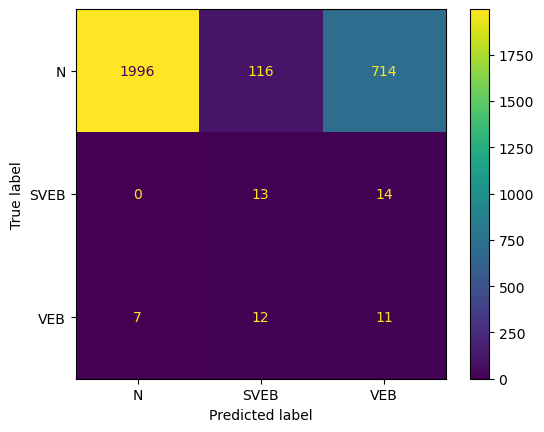

Fold 85:
  Test:  patient=84


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1659
         1.0       0.49      0.85      0.62        20
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      1679
   macro avg       0.50      0.61      0.54      1679
weighted avg       0.99      0.99      0.99      1679

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.999391   0.485714  0.0  0.986897     0.495035      0.993272
recall        0.988547   0.850000  NaN  0.986897     0.612849      0.986897
f1-score      0.993939   0.618182  NaN  0.986897     0.537374      0.989463
support    1659.000000  20.000000  0.0  0.986897  1679.000000   1679.000000


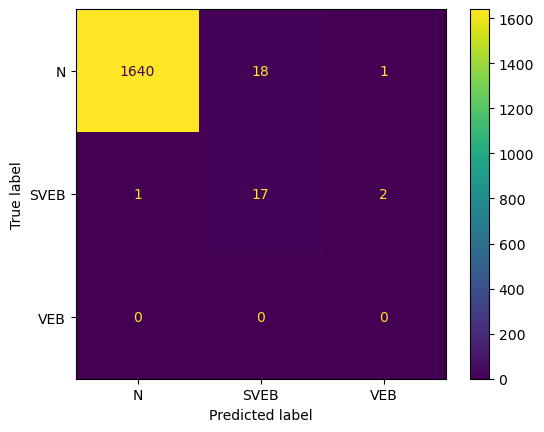

Fold 86:
  Test:  patient=85
              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97      1665
         1.0       0.27      0.53      0.36        51
         2.0       0.63      0.77      0.69        44

    accuracy                           0.93      1760
   macro avg       0.63      0.75      0.67      1760
weighted avg       0.96      0.93      0.94      1760

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.985056   0.270000   0.629630  0.933523     0.628229   
recall        0.950150   0.529412   0.772727  0.933523     0.750763   
f1-score      0.967288   0.357616   0.693878  0.933523     0.672927   
support    1665.000000  51.000000  44.000000  0.933523  1760.000000   

           weighted avg  
precision      0.955450  
recall         0.933523  
f1-score       0.942786  
support     1760.000000  


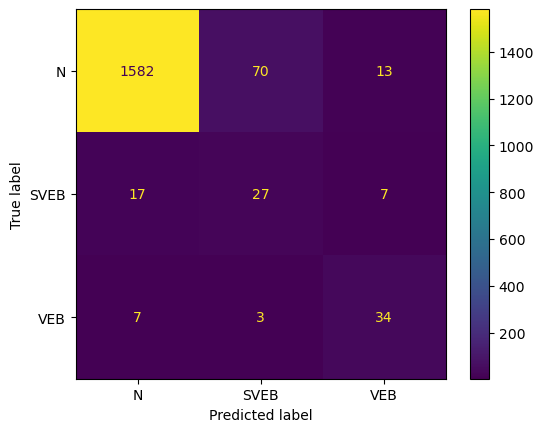

Fold 87:
  Test:  patient=86
              precision    recall  f1-score   support

         0.0       1.00      0.94      0.97      4226
         1.0       0.07      0.60      0.12        30
         2.0       0.00      0.00      0.00         1

    accuracy                           0.93      4257
   macro avg       0.36      0.51      0.36      4257
weighted avg       0.99      0.93      0.96      4257

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.997731   0.067416  0.0  0.933991     0.355049      0.990941
recall        0.936583   0.600000  0.0  0.933991     0.512194      0.933991
f1-score      0.966191   0.121212  0.0  0.933991     0.362468      0.960009
support    4226.000000  30.000000  1.0  0.933991  4257.000000   4257.000000


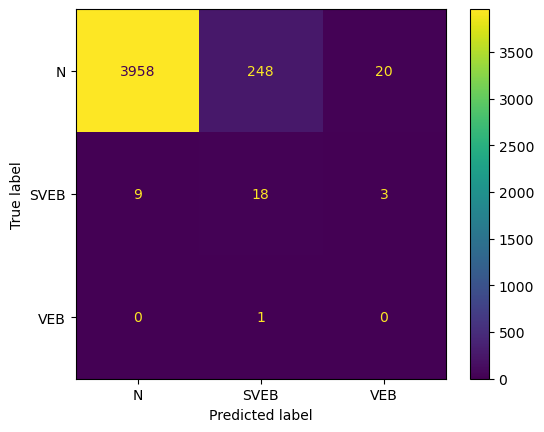

Fold 88:
  Test:  patient=87
              precision    recall  f1-score   support

         0.0       0.99      0.92      0.95      2058
         1.0       0.22      0.15      0.18        74
         2.0       0.01      0.33      0.02         6

    accuracy                           0.89      2138
   macro avg       0.40      0.47      0.38      2138
weighted avg       0.96      0.89      0.92      2138

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.986925   0.215686  0.011429  0.888681     0.404680   
recall        0.916910   0.148649  0.333333  0.888681     0.466297   
f1-score      0.950630   0.176000  0.022099  0.888681     0.382910   
support    2058.000000  74.000000  6.000000  0.888681  2138.000000   

           weighted avg  
precision      0.957493  
recall         0.888681  
f1-score       0.921213  
support     2138.000000  


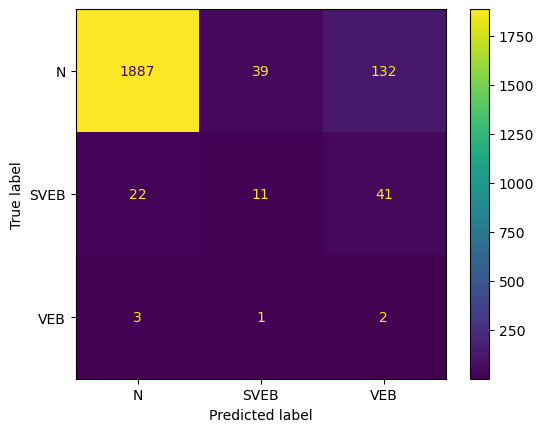

Fold 89:
  Test:  patient=88


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1829
         1.0       0.00      0.00      0.00         7
         2.0       0.00      0.00      0.00         0

    accuracy                           0.98      1836
   macro avg       0.33      0.33      0.33      1836
weighted avg       0.99      0.98      0.99      1836

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.996135  0.0  0.0  0.982571     0.332045      0.992337
recall        0.986331  0.0  NaN  0.982571     0.328777      0.982571
f1-score      0.991209  0.0  NaN  0.982571     0.330403      0.987430
support    1829.000000  7.0  0.0  0.982571  1836.000000   1836.000000


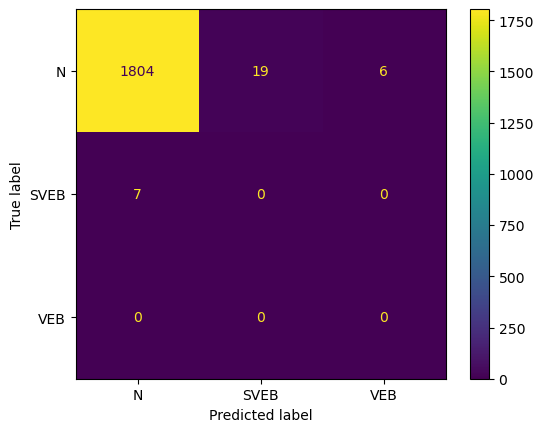

Fold 90:
  Test:  patient=89
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      2167
         1.0       0.14      0.31      0.20        32
         2.0       0.83      0.78      0.80       427

    accuracy                           0.92      2626
   macro avg       0.64      0.68      0.65      2626
weighted avg       0.93      0.92      0.92      2626

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.958217   0.144928    0.828784  0.916984     0.643976   
recall        0.952469   0.312500    0.782201  0.916984     0.682390   
f1-score      0.955334   0.198020    0.804819  0.916984     0.652724   
support    2167.000000  32.000000  427.000000  0.916984  2626.000000   

           weighted avg  
precision      0.927260  
recall         0.916984  
f1-score       0.921631  
support     2626.000000  


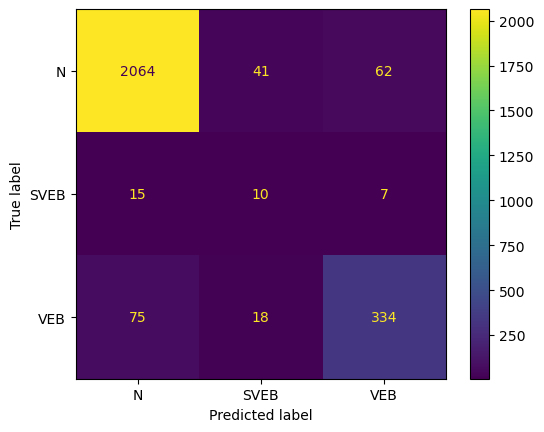

Fold 91:
  Test:  patient=90
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      2332
         1.0       0.77      0.40      0.53       321
         2.0       0.07      0.56      0.12         9

    accuracy                           0.90      2662
   macro avg       0.59      0.64      0.54      2662
weighted avg       0.91      0.90      0.90      2662

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.934406    0.772455  0.070423  0.901202     0.592428   
recall        0.971269    0.401869  0.555556  0.901202     0.642898   
f1-score      0.952481    0.528689  0.125000  0.901202     0.535390   
support    2332.000000  321.000000  9.000000  0.901202  2662.000000   

           weighted avg  
precision      0.911956  
recall         0.901202  
f1-score       0.898580  
support     2662.000000  


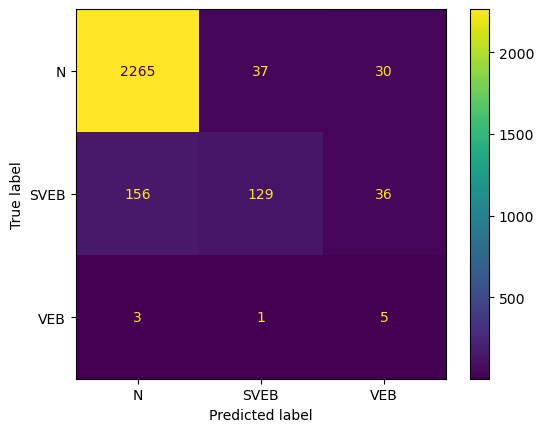

Fold 92:
  Test:  patient=91
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      2105
         1.0       0.24      0.25      0.24        48
         2.0       0.35      0.88      0.50        64

    accuracy                           0.93      2217
   macro avg       0.53      0.69      0.57      2217
weighted avg       0.96      0.93      0.94      2217

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.995017   0.235294   0.352201  0.931439     0.527504   
recall        0.948694   0.250000   0.875000  0.931439     0.691231   
f1-score      0.971304   0.242424   0.502242  0.931439     0.571990   
support    2105.000000  48.000000  64.000000  0.931439  2217.000000   

           weighted avg  
precision      0.960012  
recall         0.931439  
f1-score       0.941982  
support     2217.000000  


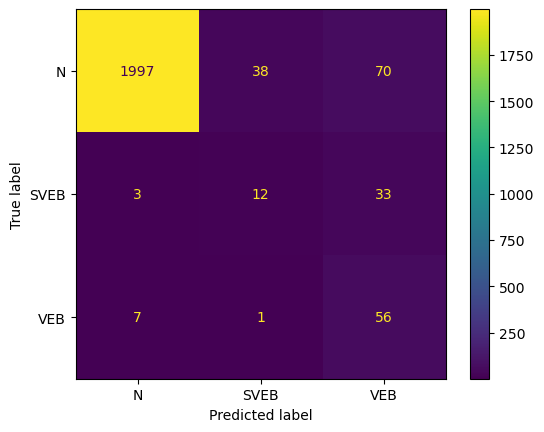

Fold 93:
  Test:  patient=92
              precision    recall  f1-score   support

         0.0       0.72      0.78      0.75      1788
         1.0       0.39      0.31      0.34       460
         2.0       0.26      0.23      0.25       478

    accuracy                           0.61      2726
   macro avg       0.46      0.44      0.45      2726
weighted avg       0.59      0.61      0.59      2726

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.723602    0.393855    0.256881  0.605649     0.458113   
recall        0.781879    0.306522    0.234310  0.605649     0.440904   
f1-score      0.751613    0.344743    0.245077  0.605649     0.447144   
support    1788.000000  460.000000  478.000000  0.605649  2726.000000   

           weighted avg  
precision      0.586120  
recall         0.605649  
f1-score       0.594135  
support     2726.000000  


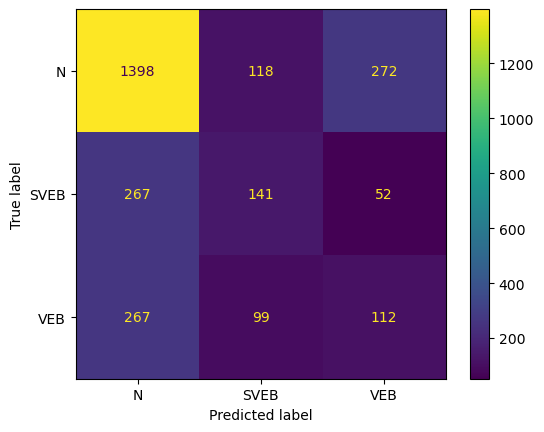

Fold 94:
  Test:  patient=93
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95      2034
         1.0       0.57      0.25      0.35       227
         2.0       0.98      0.79      0.88       276

    accuracy                           0.90      2537
   macro avg       0.82      0.68      0.72      2537
weighted avg       0.89      0.90      0.89      2537

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.908352    0.570000    0.981982  0.901458     0.820111   
recall        0.989184    0.251101    0.789855  0.901458     0.676713   
f1-score      0.947046    0.348624    0.875502  0.901458     0.723724   
support    2034.000000  227.000000  276.000000  0.901458  2537.000000   

           weighted avg  
precision      0.886088  
recall         0.901458  
f1-score       0.885719  
support     2537.000000  


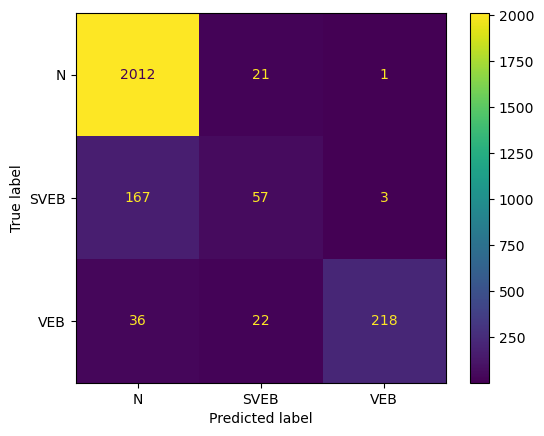

Fold 95:
  Test:  patient=94
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      2810
         1.0       0.03      0.25      0.05        12
         2.0       0.22      0.89      0.35        28

    accuracy                           0.93      2850
   macro avg       0.42      0.69      0.46      2850
weighted avg       0.98      0.93      0.95      2850

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.996199   0.028302   0.221239  0.929474     0.415247   
recall        0.932740   0.250000   0.892857  0.929474     0.691866   
f1-score      0.963426   0.050847   0.354610  0.929474     0.456294   
support    2810.000000  12.000000  28.000000  0.929474  2850.000000   

           weighted avg  
precision      0.984510  
recall         0.929474  
f1-score       0.953602  
support     2850.000000  


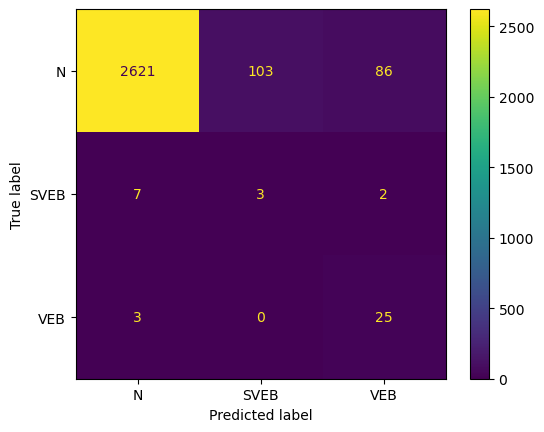

Fold 96:
  Test:  patient=95
              precision    recall  f1-score   support

         0.0       0.94      0.19      0.32      2400
         1.0       0.14      0.32      0.19        38
         2.0       0.05      0.69      0.09       144

    accuracy                           0.22      2582
   macro avg       0.38      0.40      0.20      2582
weighted avg       0.88      0.22      0.30      2582

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.936864   0.139535    0.049875  0.221534     0.375425   
recall        0.191667   0.315789    0.694444  0.221534     0.400634   
f1-score      0.318229   0.193548    0.093067  0.221534     0.201615   
support    2400.000000  38.000000  144.000000  0.221534  2582.000000   

           weighted avg  
precision      0.875661  
recall         0.221534  
f1-score       0.303837  
support     2582.000000  


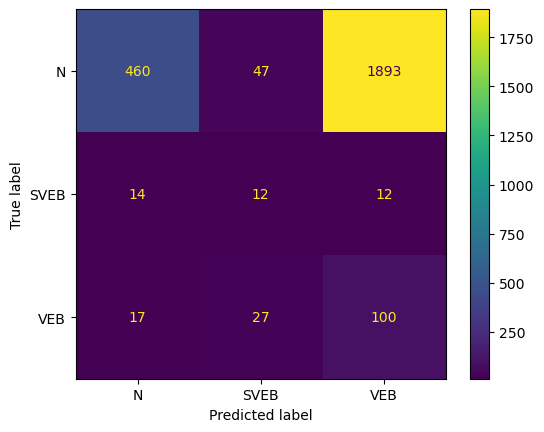

Fold 97:
  Test:  patient=96
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93      2167
         1.0       0.01      0.25      0.01         8
         2.0       0.07      0.33      0.12         3

    accuracy                           0.87      2178
   macro avg       0.36      0.48      0.35      2178
weighted avg       0.99      0.87      0.92      2178

                   0.0       1.0       2.0  accuracy    macro avg  \
precision     0.997349  0.007194  0.071429  0.865014     0.358657   
recall        0.868020  0.250000  0.333333  0.865014     0.483785   
f1-score      0.928201  0.013986  0.117647  0.865014     0.353278   
support    2167.000000  8.000000  3.000000  0.865014  2178.000000   

           weighted avg  
precision      0.992437  
recall         0.865014  
f1-score       0.923727  
support     2178.000000  


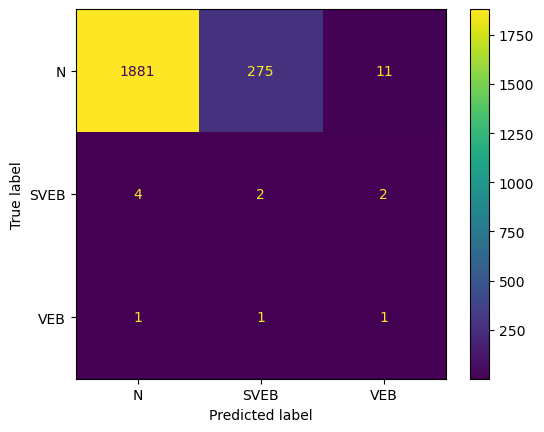

Fold 98:
  Test:  patient=97
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.89      3007
         1.0       0.09      0.41      0.15        69
         2.0       0.49      0.70      0.58       464

    accuracy                           0.80      3540
   macro avg       0.51      0.64      0.54      3540
weighted avg       0.88      0.80      0.83      3540

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.961404   0.091205    0.489521  0.796893     0.514043   
recall        0.820086   0.405797    0.704741  0.796893     0.643542   
f1-score      0.885140   0.148936    0.577739  0.796893     0.537272   
support    3007.000000  69.000000  464.000000  0.796893  3540.000000   

           weighted avg  
precision      0.882591  
recall         0.796893  
f1-score       0.830498  
support     3540.000000  


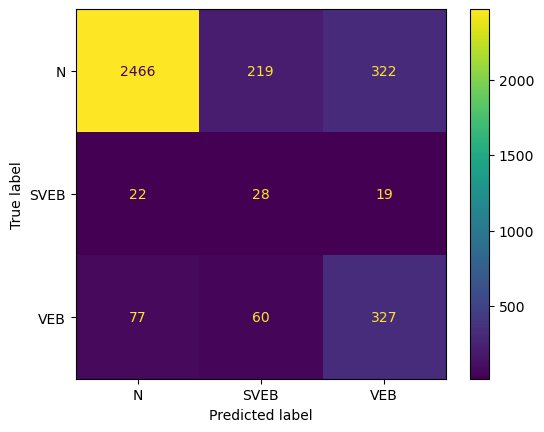

Fold 99:
  Test:  patient=98
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1672
         1.0       0.00      0.00      0.00        17
         2.0       0.94      0.88      0.91       727

    accuracy                           0.92      2416
   macro avg       0.63      0.61      0.62      2416
weighted avg       0.94      0.92      0.93      2416

                   0.0   1.0         2.0  accuracy    macro avg  weighted avg
precision     0.950448   0.0    0.941176  0.923841     0.630541      0.940970
recall        0.952153   0.0    0.880330  0.923841     0.610828      0.923841
f1-score      0.951300   0.0    0.909737  0.923841     0.620346      0.932099
support    1672.000000  17.0  727.000000  0.923841  2416.000000   2416.000000


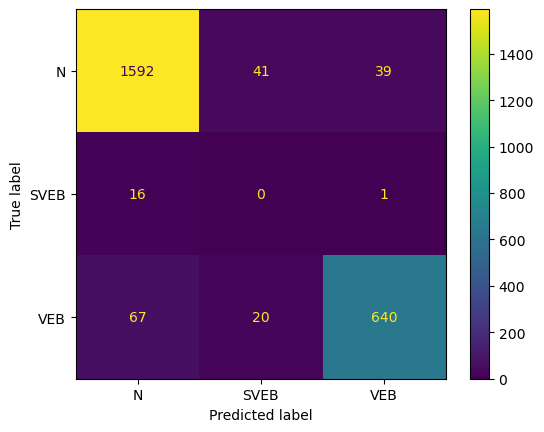

Fold 100:
  Test:  patient=99
              precision    recall  f1-score   support

         0.0       0.90      0.93      0.91      1873
         1.0       0.73      0.29      0.41       569
         2.0       0.08      0.96      0.15        27

    accuracy                           0.78      2469
   macro avg       0.57      0.73      0.49      2469
weighted avg       0.85      0.78      0.79      2469

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.896694    0.727679   0.084142  0.779668     0.569505   
recall        0.926855    0.286467   0.962963  0.779668     0.725429   
f1-score      0.911525    0.411097   0.154762  0.779668     0.492461   
support    1873.000000  569.000000  27.000000  0.779668  2469.000000   

           weighted avg  
precision      0.848858  
recall         0.779668  
f1-score       0.787922  
support     2469.000000  


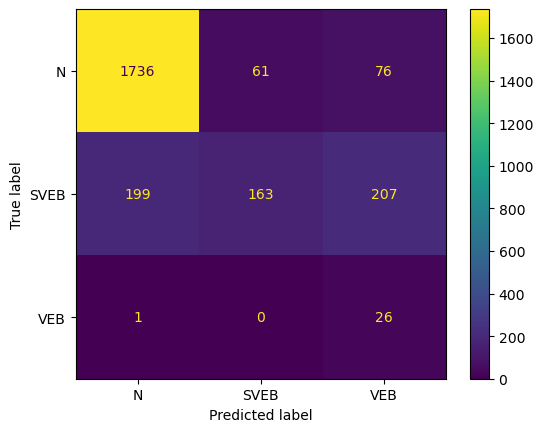

Fold 101:
  Test:  patient=100
              precision    recall  f1-score   support

         0.0       0.99      0.35      0.51      2133
         1.0       0.00      0.00      0.00        26
         2.0       0.01      0.70      0.02        23

    accuracy                           0.34      2182
   macro avg       0.33      0.35      0.18      2182
weighted avg       0.96      0.34      0.50      2182

                   0.0   1.0        2.0  accuracy    macro avg  weighted avg
precision     0.985274   0.0   0.011536  0.344638     0.332270      0.963270
recall        0.345054   0.0   0.695652  0.344638     0.346902      0.344638
f1-score      0.511111   0.0   0.022695  0.344638     0.177935      0.499873
support    2133.000000  26.0  23.000000  0.344638  2182.000000   2182.000000


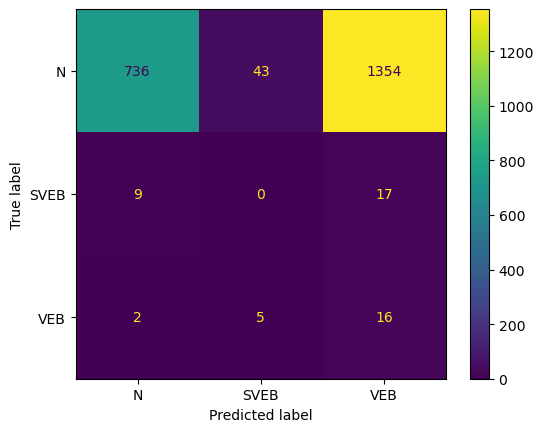

Fold 102:
  Test:  patient=101
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2560
         1.0       0.54      0.40      0.46       321
         2.0       0.53      0.56      0.54       240

    accuracy                           0.90      3121
   macro avg       0.68      0.65      0.66      3121
weighted avg       0.89      0.90      0.89      3121

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.965727    0.535270    0.527559  0.896828     0.676185   
recall        0.990625    0.401869    0.558333  0.896828     0.650276   
f1-score      0.978018    0.459075    0.542510  0.896828     0.659868   
support    2560.000000  321.000000  240.000000  0.896828  3121.000000   

           weighted avg  
precision      0.887760  
recall         0.896828  
f1-score       0.891154  
support     3121.000000  


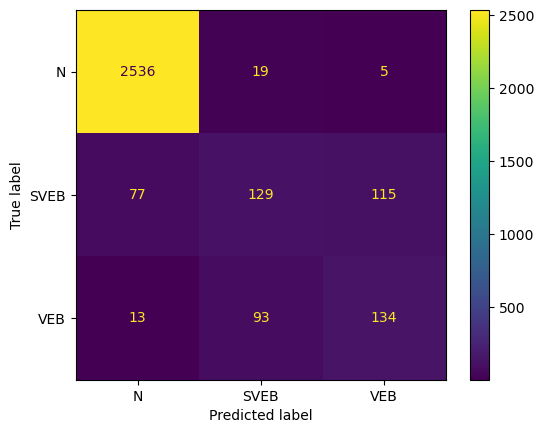

Fold 103:
  Test:  patient=102
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      1742
         1.0       0.29      0.53      0.38        19
         2.0       0.87      0.70      0.77       132

    accuracy                           0.96      1893
   macro avg       0.71      0.74      0.71      1893
weighted avg       0.97      0.96      0.96      1893

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.980605   0.294118    0.867925  0.961965     0.714216   
recall        0.986797   0.526316    0.696970  0.961965     0.736694   
f1-score      0.983691   0.377358    0.773109  0.961965     0.711386   
support    1742.000000  19.000000  132.000000  0.961965  1893.000000   

           weighted avg  
precision      0.965857  
recall         0.961965  
f1-score       0.962921  
support     1893.000000  


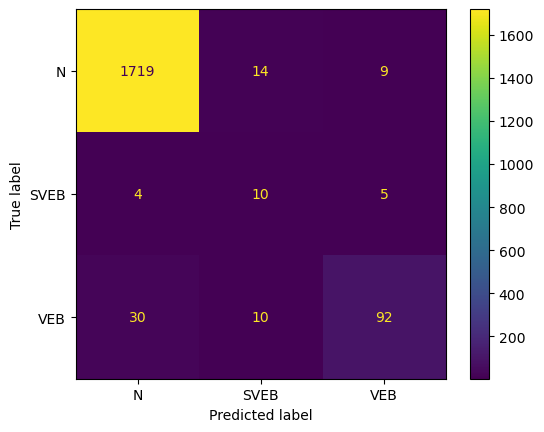

Fold 104:
  Test:  patient=103
              precision    recall  f1-score   support

         0.0       0.40      0.88      0.55      1101
         1.0       0.94      0.16      0.27      1818
         2.0       0.45      0.83      0.59       234

    accuracy                           0.46      3153
   macro avg       0.60      0.62      0.47      3153
weighted avg       0.72      0.46      0.39      3153

                   0.0          1.0         2.0  accuracy    macro avg  \
precision     0.401076     0.940984    0.451389  0.460197     0.597816   
recall        0.880109     0.157866    0.833333  0.460197     0.623769   
f1-score      0.551038     0.270372    0.585586  0.460197     0.468999   
support    1101.000000  1818.000000  234.000000  0.460197  3153.000000   

           weighted avg  
precision      0.716117  
recall         0.460197  
f1-score       0.391772  
support     3153.000000  


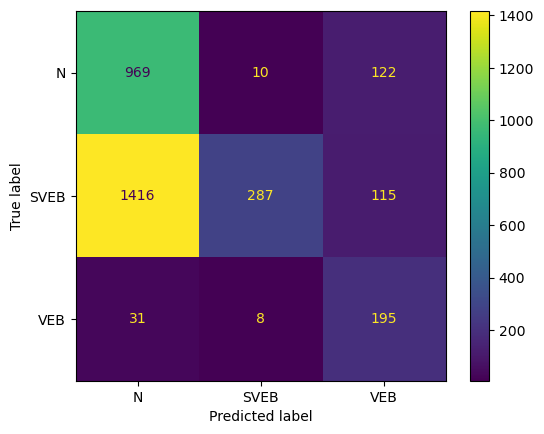

Fold 105:
  Test:  patient=104
              precision    recall  f1-score   support

         0.0       0.85      0.83      0.84      2050
         1.0       0.16      0.39      0.22       167
         2.0       0.30      0.15      0.20       447

    accuracy                           0.69      2664
   macro avg       0.43      0.46      0.42      2664
weighted avg       0.71      0.69      0.69      2664

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.846726    0.155502    0.295652  0.690691     0.432627   
recall        0.832683    0.389222    0.152125  0.690691     0.458010   
f1-score      0.839646    0.222222    0.200886  0.690691     0.420918   
support    2050.000000  167.000000  447.000000  0.690691  2664.000000   

           weighted avg  
precision      0.710929  
recall         0.690691  
f1-score       0.693762  
support     2664.000000  


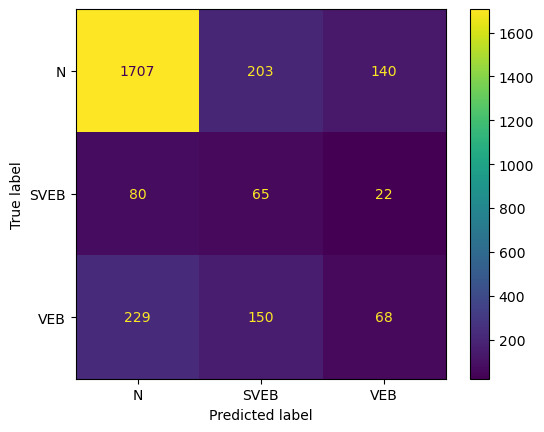

Fold 106:
  Test:  patient=105
              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83      2787
         1.0       0.06      0.15      0.09       136
         2.0       0.01      0.08      0.02        75

    accuracy                           0.70      2998
   macro avg       0.34      0.33      0.31      2998
weighted avg       0.87      0.70      0.78      2998

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.932408    0.060345   0.014423  0.703803     0.335725   
recall        0.747399    0.154412   0.080000  0.703803     0.327270   
f1-score      0.829715    0.086777   0.024440  0.703803     0.313644   
support    2787.000000  136.000000  75.000000  0.703803  2998.000000   

           weighted avg  
precision      0.869883  
recall         0.703803  
f1-score       0.775868  
support     2998.000000  


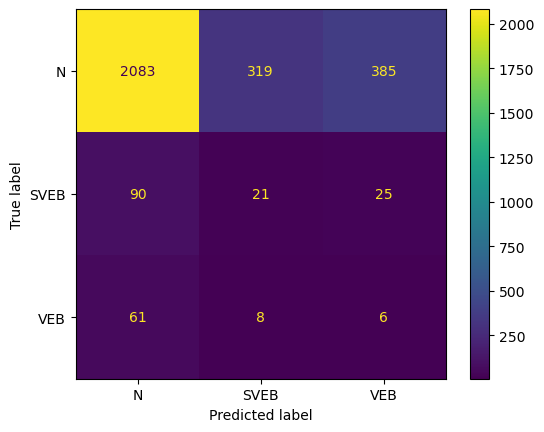

Fold 107:
  Test:  patient=106
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84      2552
         1.0       0.19      0.40      0.26       227
         2.0       0.30      0.26      0.28       555

    accuracy                           0.69      3334
   macro avg       0.45      0.49      0.46      3334
weighted avg       0.72      0.69      0.70      3334

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.864322    0.192719    0.298539  0.688962     0.451860   
recall        0.808777    0.396476    0.257658  0.688962     0.487637   
f1-score      0.835628    0.259366    0.276596  0.688962     0.457196   
support    2552.000000  227.000000  555.000000  0.688962  3334.000000   

           weighted avg  
precision      0.724411  
recall         0.688962  
f1-score       0.703332  
support     3334.000000  


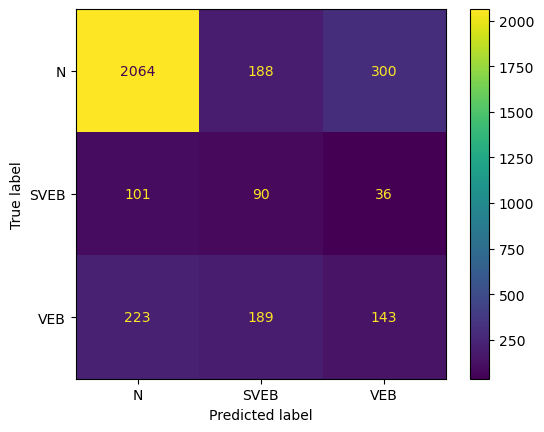

Fold 108:
  Test:  patient=107
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92      1506
         1.0       0.92      0.39      0.55       631
         2.0       0.06      0.82      0.12        22

    accuracy                           0.78      2159
   macro avg       0.62      0.72      0.53      2159
weighted avg       0.89      0.78      0.80      2159

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.884758    0.917603   0.064748  0.783233     0.622370   
recall        0.948207    0.388273   0.818182  0.783233     0.718221   
f1-score      0.915385    0.545657   0.120000  0.783233     0.527014   
support    1506.000000  631.000000  22.000000  0.783233  2159.000000   

           weighted avg  
precision      0.886002  
recall         0.783233  
f1-score       0.799221  
support     2159.000000  


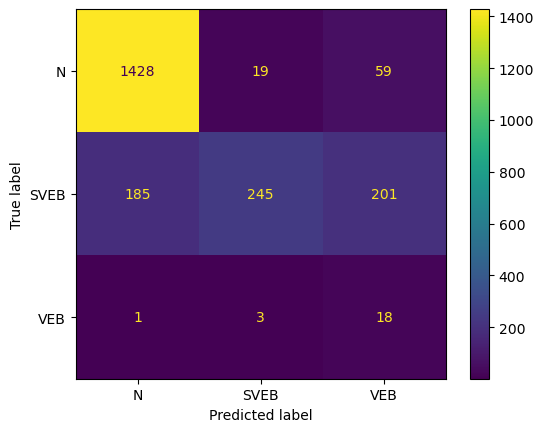

Fold 109:
  Test:  patient=108
              precision    recall  f1-score   support

         0.0       0.85      0.95      0.90      1785
         1.0       0.64      0.44      0.52       454
         2.0       0.79      0.69      0.73       437

    accuracy                           0.82      2676
   macro avg       0.76      0.69      0.72      2676
weighted avg       0.81      0.82      0.81      2676

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.853978    0.638710    0.789474   0.81988     0.760720   
recall        0.950140    0.436123    0.686499   0.81988     0.690921   
f1-score      0.899496    0.518325    0.734394   0.81988     0.717405   
support    1785.000000  454.000000  437.000000   0.81988  2676.000000   

           weighted avg  
precision      0.806923  
recall         0.819880  
f1-score       0.807866  
support     2676.000000  


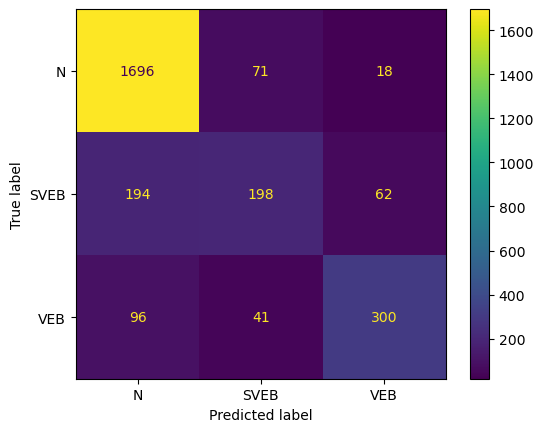

Fold 110:
  Test:  patient=109
              precision    recall  f1-score   support

         0.0       1.00      0.92      0.96      1774
         1.0       0.10      0.50      0.16        12
         2.0       0.07      0.88      0.14         8

    accuracy                           0.92      1794
   macro avg       0.39      0.77      0.42      1794
weighted avg       0.99      0.92      0.95      1794

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.997557   0.095238  0.074468  0.917503     0.389088   
recall        0.920519   0.500000  0.875000  0.917503     0.765173   
f1-score      0.957490   0.160000  0.137255  0.917503     0.418248   
support    1774.000000  12.000000  8.000000  0.917503  1794.000000   

           weighted avg  
precision      0.987405  
recall         0.917503  
f1-score       0.948498  
support     1794.000000  


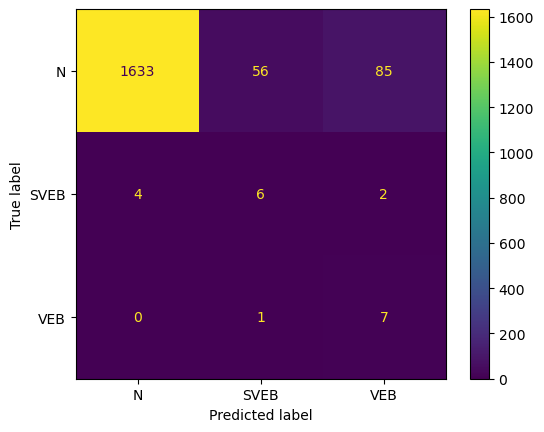

Fold 111:
  Test:  patient=110
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1896
         1.0       0.00      0.00      0.00         9
         2.0       0.91      0.96      0.93        74

    accuracy                           0.98      1979
   macro avg       0.64      0.65      0.64      1979
weighted avg       0.99      0.98      0.99      1979

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.998936  0.0   0.910256  0.984336     0.636397      0.991077
recall        0.989979  0.0   0.959459  0.984336     0.649813      0.984336
f1-score      0.994437  0.0   0.934211  0.984336     0.642883      0.987663
support    1896.000000  9.0  74.000000  0.984336  1979.000000   1979.000000


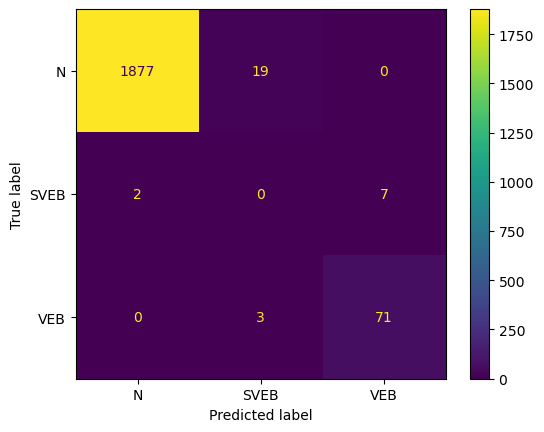

Fold 112:
  Test:  patient=111
              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      1624
         1.0       0.15      0.67      0.24        15
         2.0       0.13      0.08      0.10        26

    accuracy                           0.94      1665
   macro avg       0.42      0.57      0.44      1665
weighted avg       0.96      0.94      0.95      1665

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.984839   0.149254   0.133333  0.943544     0.422475   
recall        0.959975   0.666667   0.076923  0.943544     0.567855   
f1-score      0.972248   0.243902   0.097561  0.943544     0.437904   
support    1624.000000  15.000000  26.000000  0.943544  1665.000000   

           weighted avg  
precision      0.964014  
recall         0.943544  
f1-score       0.952028  
support     1665.000000  


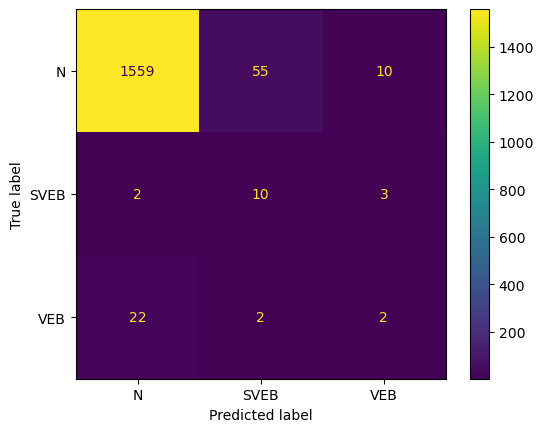

Fold 113:
  Test:  patient=112
              precision    recall  f1-score   support

         0.0       0.99      0.53      0.69      2188
         1.0       0.00      0.00      0.00         9
         2.0       0.03      0.76      0.06        41

    accuracy                           0.53      2238
   macro avg       0.34      0.43      0.25      2238
weighted avg       0.97      0.53      0.68      2238

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.994867  0.0   0.033586  0.533512     0.342818      0.973256
recall        0.531536  0.0   0.756098  0.533512     0.429211      0.533512
f1-score      0.692881  0.0   0.064315  0.533512     0.252399      0.678579
support    2188.000000  9.0  41.000000  0.533512  2238.000000   2238.000000


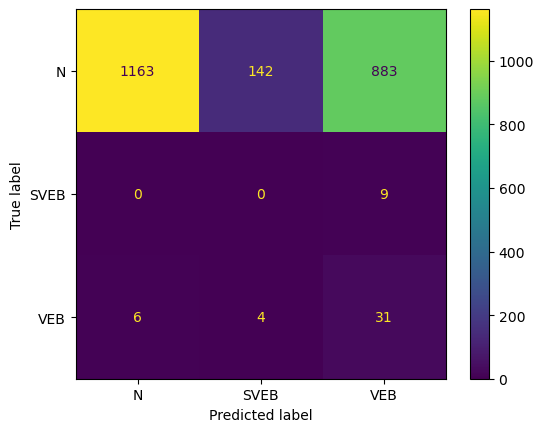

Fold 114:
  Test:  patient=113
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1944
         1.0       0.08      0.38      0.14         8
         2.0       0.63      0.80      0.71        97

    accuracy                           0.96      2049
   macro avg       0.57      0.72      0.61      2049
weighted avg       0.97      0.96      0.96      2049

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.995236  0.083333   0.629032  0.957052     0.569200   
recall        0.967078  0.375000   0.804124  0.957052     0.715401   
f1-score      0.980955  0.136364   0.705882  0.957052     0.607734   
support    1944.000000  8.000000  97.000000  0.957052  2049.000000   

           weighted avg  
precision      0.974339  
recall         0.957052  
f1-score       0.964635  
support     2049.000000  


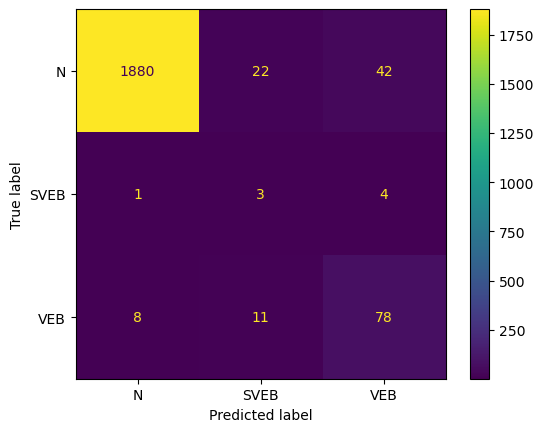

Fold 115:
  Test:  patient=114
              precision    recall  f1-score   support

         0.0       0.99      0.93      0.96      2004
         1.0       0.44      0.77      0.56       135
         2.0       0.00      0.00      0.00         0

    accuracy                           0.92      2139
   macro avg       0.48      0.57      0.51      2139
weighted avg       0.95      0.92      0.93      2139

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.986758    0.442553  0.0  0.919589     0.476437      0.952412
recall        0.929641    0.770370  NaN  0.919589     0.566670      0.919589
f1-score      0.957348    0.562162  NaN  0.919589     0.506504      0.932407
support    2004.000000  135.000000  0.0  0.919589  2139.000000   2139.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

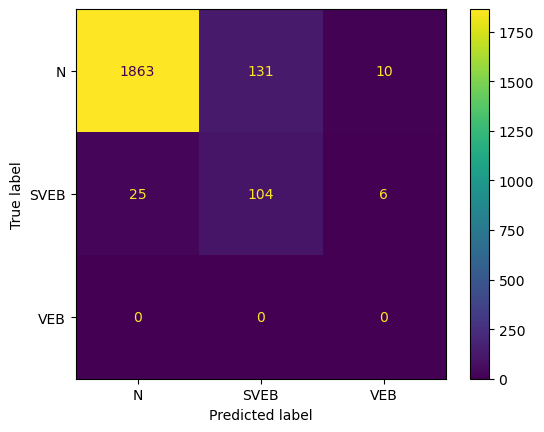

Fold 116:
  Test:  patient=115
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      1839
         1.0       0.87      0.60      0.71       196
         2.0       0.00      0.00      0.00         1

    accuracy                           0.95      2036
   macro avg       0.61      0.53      0.56      2036
weighted avg       0.95      0.95      0.95      2036

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.961965    0.867647  0.0  0.952358     0.609871      0.952413
recall        0.990212    0.602041  0.0  0.952358     0.530751      0.952358
f1-score      0.975884    0.710843  0.0  0.952358     0.562243      0.949890
support    1839.000000  196.000000  1.0  0.952358  2036.000000   2036.000000


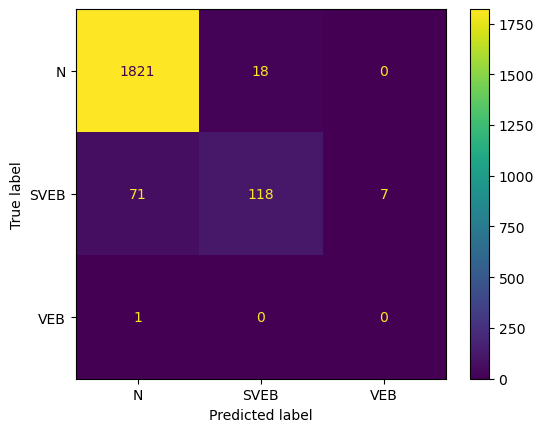

Fold 117:
  Test:  patient=116
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1589
         1.0       0.96      0.70      0.81        64
         2.0       0.97      0.92      0.94       256

    accuracy                           0.98      1909
   macro avg       0.97      0.87      0.91      1909
weighted avg       0.98      0.98      0.98      1909

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.978986   0.957447    0.967213  0.976951     0.967882   
recall        0.996853   0.703125    0.921875  0.976951     0.873951   
f1-score      0.987839   0.810811    0.944000  0.976951     0.914217   
support    1589.000000  64.000000  256.000000  0.976951  1909.000000   

           weighted avg  
precision      0.976685  
recall         0.976951  
f1-score       0.976025  
support     1909.000000  


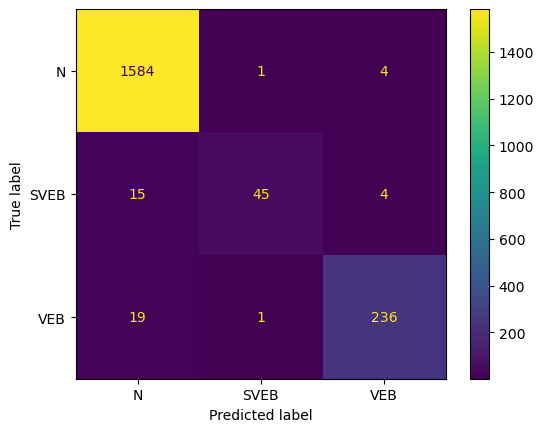

Fold 118:
  Test:  patient=117
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1470
         1.0       0.42      0.83      0.56        48
         2.0       0.98      0.89      0.93       542

    accuracy                           0.96      2060
   macro avg       0.80      0.90      0.83      2060
weighted avg       0.97      0.96      0.97      2060

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.989817   0.416667    0.979633   0.96068     0.795372   
recall        0.991837   0.833333    0.887454   0.96068     0.904208   
f1-score      0.990826   0.555556    0.931268   0.96068     0.825883   
support    1470.000000  48.000000  542.000000   0.96068  2060.000000   

           weighted avg  
precision      0.973782  
recall         0.960680  
f1-score       0.965013  
support     2060.000000  


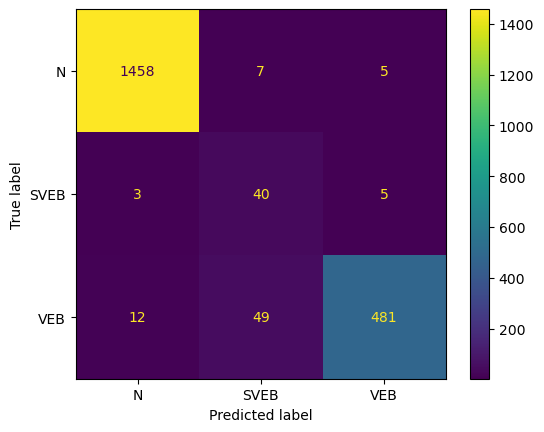

Fold 119:
  Test:  patient=118
              precision    recall  f1-score   support

         0.0       0.97      0.60      0.74      3103
         1.0       0.09      0.42      0.15       241
         2.0       0.24      0.76      0.36       141

    accuracy                           0.59      3485
   macro avg       0.43      0.59      0.42      3485
weighted avg       0.88      0.59      0.69      3485

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.973877    0.090502    0.235165  0.594548     0.433181   
recall        0.600709    0.419087    0.758865  0.594548     0.592887   
f1-score      0.743074    0.148858    0.359060  0.594548     0.416997   
support    3103.000000  241.000000  141.000000  0.594548  3485.000000   

           weighted avg  
precision      0.882901  
recall         0.594548  
f1-score       0.686445  
support     3485.000000  


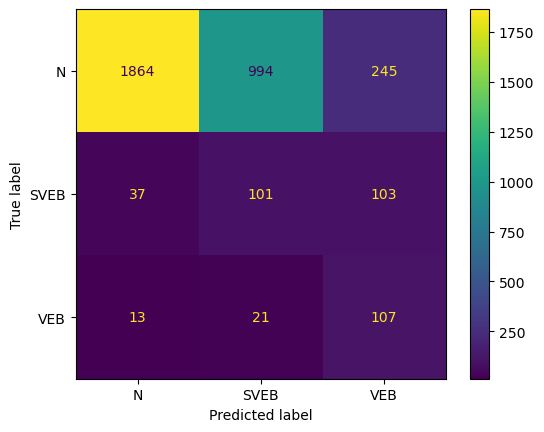

Fold 120:
  Test:  patient=119
              precision    recall  f1-score   support

         0.0       0.76      0.96      0.85      1323
         1.0       0.71      0.37      0.49       628
         2.0       0.53      0.44      0.48       307

    accuracy                           0.73      2258
   macro avg       0.67      0.59      0.61      2258
weighted avg       0.71      0.73      0.70      2258

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.758209    0.710366    0.533333  0.725864     0.667303   
recall        0.959940    0.371019    0.442997  0.725864     0.591318   
f1-score      0.847231    0.487448    0.483986  0.725864     0.606222   
support    1323.000000  628.000000  307.000000  0.725864  2258.000000   

           weighted avg  
precision      0.714328  
recall         0.725864  
f1-score       0.697780  
support     2258.000000  


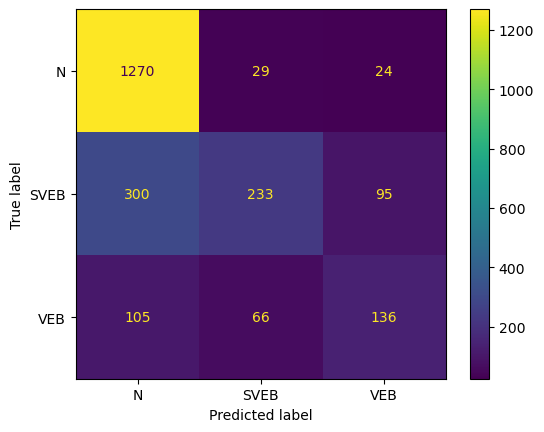

Fold 121:
  Test:  patient=120
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1887
         1.0       0.81      0.83      0.82        41
         2.0       0.45      1.00      0.62         5

    accuracy                           0.99      1933
   macro avg       0.75      0.94      0.81      1933
weighted avg       0.99      0.99      0.99      1933

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.999468   0.809524  0.454545   0.99224     0.754512   
recall        0.995760   0.829268  1.000000   0.99224     0.941676   
f1-score      0.997611   0.819277  0.625000   0.99224     0.813963   
support    1887.000000  41.000000  5.000000   0.99224  1933.000000   

           weighted avg  
precision      0.994030  
recall         0.992240  
f1-score       0.992864  
support     1933.000000  


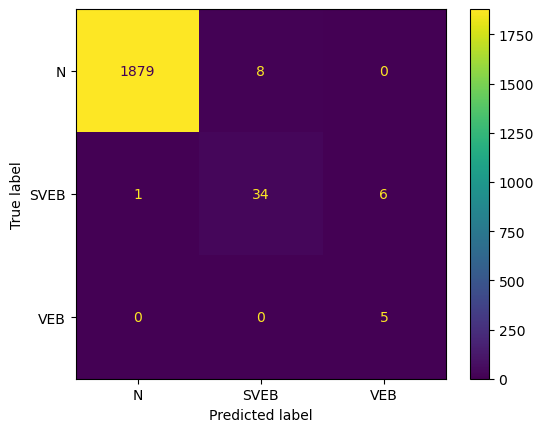

Fold 122:
  Test:  patient=121
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1771
         1.0       0.90      0.88      0.89        40
         2.0       0.56      0.71      0.63         7

    accuracy                           0.99      1818
   macro avg       0.82      0.86      0.84      1818
weighted avg       0.99      0.99      0.99      1818

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.997175   0.897436  0.555556  0.992849     0.816722   
recall        0.996612   0.875000  0.714286  0.992849     0.861966   
f1-score      0.996894   0.886076  0.625000  0.992849     0.835990   
support    1771.000000  40.000000  7.000000  0.992849  1818.000000   

           weighted avg  
precision      0.993280  
recall         0.992849  
f1-score       0.993023  
support     1818.000000  


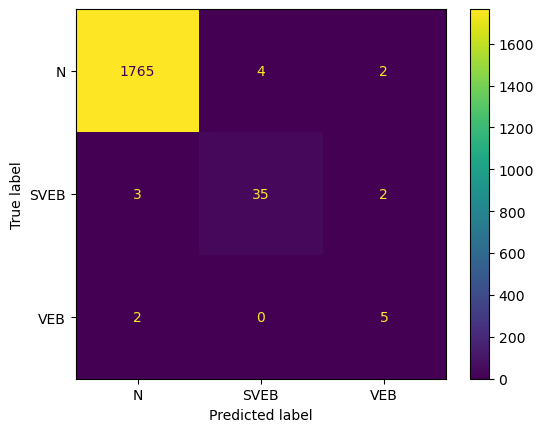

Fold 123:
  Test:  patient=122
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      2484
         1.0       0.27      0.49      0.34        53
         2.0       0.90      0.98      0.94       343

    accuracy                           0.96      2880
   macro avg       0.72      0.81      0.75      2880
weighted avg       0.97      0.96      0.96      2880

                   0.0        1.0         2.0  accuracy    macro avg  \
precision     0.991698   0.265306    0.900804  0.955208     0.719269   
recall        0.961755   0.490566    0.979592  0.955208     0.810638   
f1-score      0.976497   0.344371    0.938547  0.955208     0.753138   
support    2484.000000  53.000000  343.000000  0.955208  2880.000000   

           weighted avg  
precision      0.967505  
recall         0.955208  
f1-score       0.960344  
support     2880.000000  


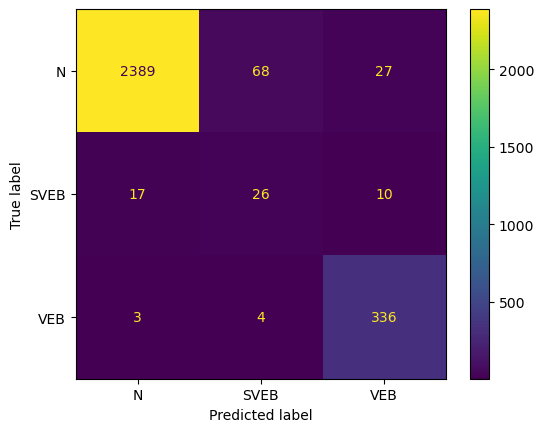

Fold 124:
  Test:  patient=123
              precision    recall  f1-score   support

         0.0       0.89      0.97      0.93      1505
         1.0       0.83      0.34      0.48       399
         2.0       0.24      0.70      0.36        54

    accuracy                           0.84      1958
   macro avg       0.66      0.67      0.59      1958
weighted avg       0.86      0.84      0.83      1958

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.894448    0.834356   0.243590  0.837589     0.657464   
recall        0.974086    0.340852   0.703704  0.837589     0.672881   
f1-score      0.932570    0.483986   0.361905  0.837589     0.592820   
support    1505.000000  399.000000  54.000000  0.837589  1958.000000   

           weighted avg  
precision      0.864252  
recall         0.837589  
f1-score       0.825419  
support     1958.000000  


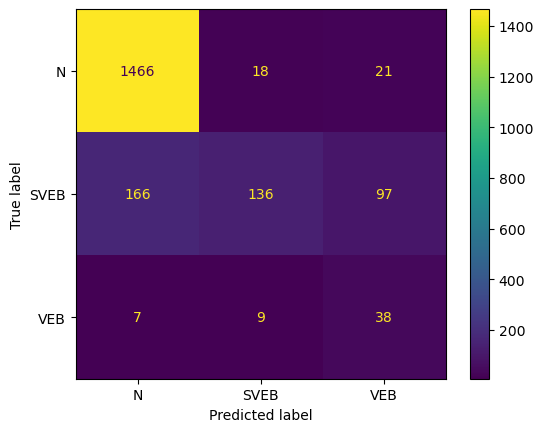

Fold 125:
  Test:  patient=124
              precision    recall  f1-score   support

         0.0       1.00      0.86      0.93      2168
         1.0       0.37      0.38      0.38        26
         2.0       0.07      0.85      0.13        27

    accuracy                           0.86      2221
   macro avg       0.48      0.70      0.48      2221
weighted avg       0.98      0.86      0.91      2221

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.998397   0.370370   0.071429  0.856371     0.480065   
recall        0.862085   0.384615   0.851852  0.856371     0.699517   
f1-score      0.925248   0.377358   0.131805  0.856371     0.478137   
support    2168.000000  26.000000  27.000000  0.856371  2221.000000   

           weighted avg  
precision      0.979777  
recall         0.856371  
f1-score       0.909188  
support     2221.000000  


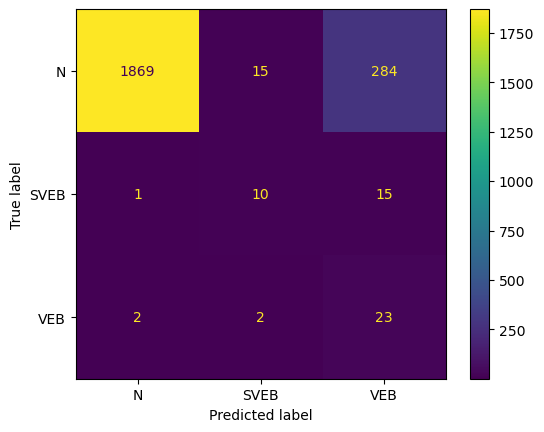

Fold 126:
  Test:  patient=125
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2352
         1.0       0.44      0.77      0.56       125
         2.0       0.77      0.23      0.35       210

    accuracy                           0.91      2687
   macro avg       0.72      0.66      0.63      2687
weighted avg       0.92      0.91      0.90      2687

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.957624    0.440367    0.774194  0.911425     0.724061   
recall        0.980017    0.768000    0.228571  0.911425     0.658863   
f1-score      0.968691    0.559767    0.352941  0.911425     0.627133   
support    2352.000000  125.000000  210.000000  0.911425  2687.000000   

           weighted avg  
precision      0.919225  
recall         0.911425  
f1-score       0.901544  
support     2687.000000  


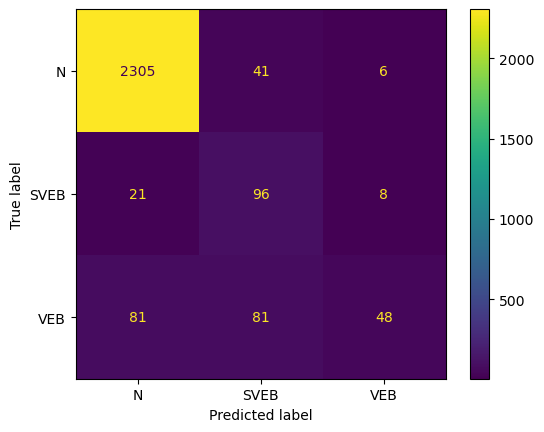

Fold 127:
  Test:  patient=126
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2189
         1.0       0.45      0.94      0.61        68
         2.0       0.71      0.22      0.34        54

    accuracy                           0.95      2311
   macro avg       0.71      0.71      0.64      2311
weighted avg       0.97      0.95      0.95      2311

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.987918   0.450704   0.705882  0.952834     0.714835   
recall        0.971220   0.941176   0.222222  0.952834     0.711539   
f1-score      0.979498   0.609524   0.338028  0.952834     0.642350   
support    2189.000000  68.000000  54.000000  0.952834  2311.000000   

           weighted avg  
precision      0.965521  
recall         0.952834  
f1-score       0.953623  
support     2311.000000  


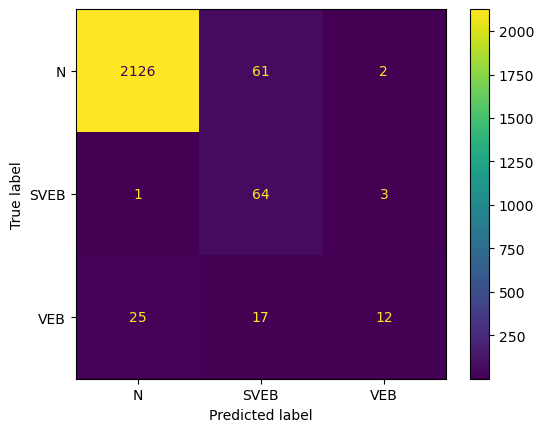

Fold 128:
  Test:  patient=127
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      1464
         1.0       0.71      0.55      0.62       152
         2.0       0.64      0.65      0.64        91

    accuracy                           0.93      1707
   macro avg       0.77      0.73      0.75      1707
weighted avg       0.92      0.93      0.93      1707

                   0.0         1.0        2.0  accuracy    macro avg  \
precision     0.963928    0.711864   0.641304  0.929115     0.772366   
recall        0.985656    0.552632   0.648352  0.929115     0.728880   
f1-score      0.974671    0.622222   0.644809  0.929115     0.747234   
support    1464.000000  152.000000  91.000000  0.929115  1707.000000   

           weighted avg  
precision      0.924284  
recall         0.929115  
f1-score       0.925702  
support     1707.000000  


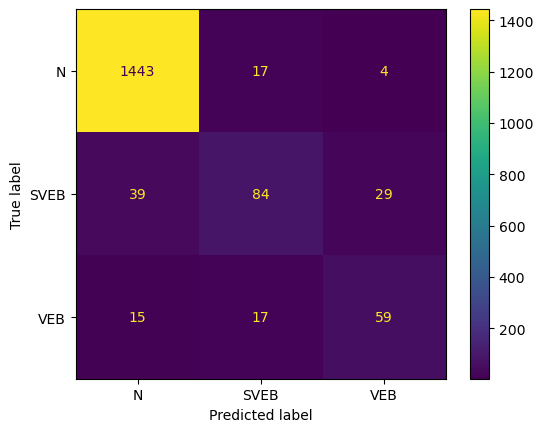

Fold 129:
  Test:  patient=128
              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      2001
         1.0       0.19      0.08      0.11        74
         2.0       0.26      0.66      0.37        97

    accuracy                           0.87      2172
   macro avg       0.47      0.55      0.47      2172
weighted avg       0.91      0.87      0.89      2172

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.966684   0.187500   0.257028  0.873849     0.470404   
recall        0.913543   0.081081   0.659794  0.873849     0.551473   
f1-score      0.939363   0.113208   0.369942  0.873849     0.474171   
support    2001.000000  74.000000  97.000000  0.873849  2172.000000   

           weighted avg  
precision      0.908445  
recall         0.873849  
f1-score       0.885786  
support     2172.000000  


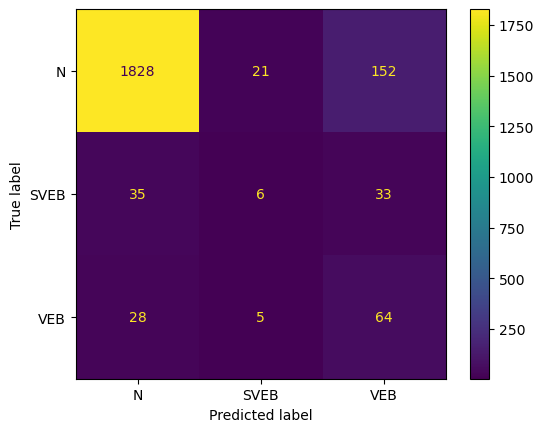

Fold 130:
  Test:  patient=129
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.96      2120
         1.0       0.80      0.82      0.81       277
         2.0       0.57      0.41      0.48       207

    accuracy                           0.91      2604
   macro avg       0.77      0.73      0.75      2604
weighted avg       0.90      0.91      0.90      2604

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.944675    0.800000    0.566667  0.907066     0.770447   
recall        0.966509    0.823105    0.410628  0.907066     0.733414   
f1-score      0.955467    0.811388    0.476190  0.907066     0.747682   
support    2120.000000  277.000000  207.000000  0.907066  2604.000000   

           weighted avg  
precision      0.899236  
recall         0.907066  
f1-score       0.902042  
support     2604.000000  


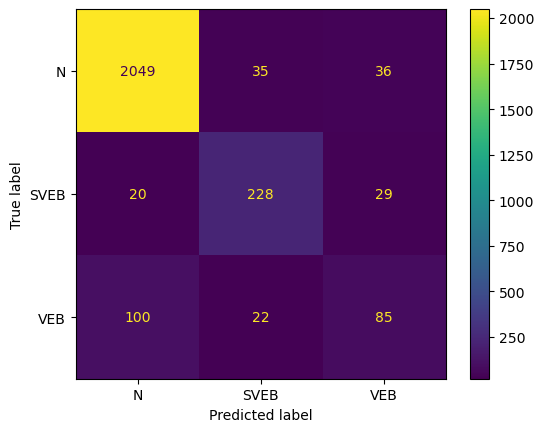

Fold 131:
  Test:  patient=130
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      1740
         1.0       0.83      0.58      0.68       523
         2.0       0.80      0.81      0.80       577

    accuracy                           0.87      2840
   macro avg       0.84      0.79      0.81      2840
weighted avg       0.87      0.87      0.86      2840

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.901326    0.826558    0.798635  0.870423     0.842173   
recall        0.976437    0.583174    0.811092  0.870423     0.790234   
f1-score      0.937379    0.683857    0.804815  0.870423     0.808684   
support    1740.000000  523.000000  577.000000  0.870423  2840.000000   

           weighted avg  
precision      0.866694  
recall         0.870423  
f1-score       0.863759  
support     2840.000000  


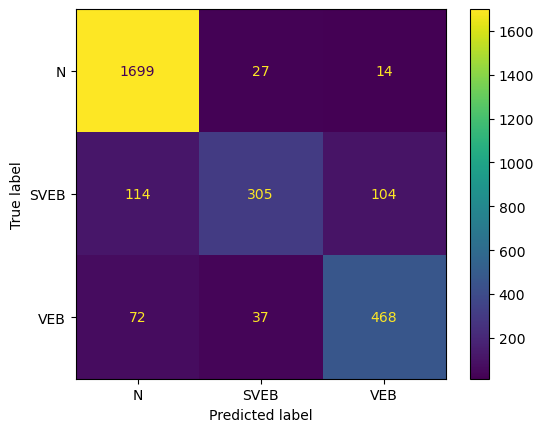

Fold 132:
  Test:  patient=131


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.99      0.94      0.97      2188
         1.0       0.00      0.00      0.00         0
         2.0       0.97      0.90      0.94       338

    accuracy                           0.94      2526
   macro avg       0.65      0.61      0.63      2526
weighted avg       0.99      0.94      0.96      2526

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.993247  0.0    0.971338  0.935867     0.654861      0.990315
recall        0.941042  NaN    0.902367  0.935867     0.614470      0.935867
f1-score      0.966440  NaN    0.935583  0.935867     0.634008      0.962311
support    2188.000000  0.0  338.000000  0.935867  2526.000000   2526.000000


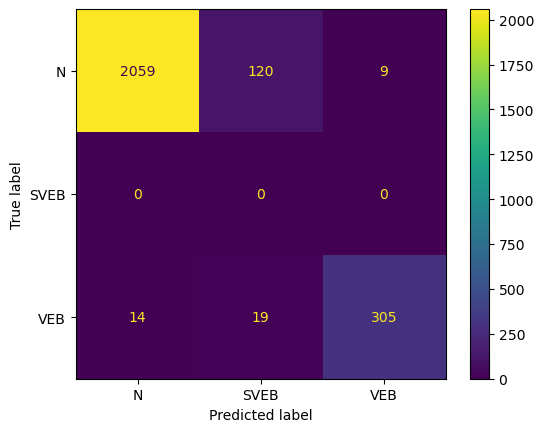

Fold 133:
  Test:  patient=132
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      2211
         1.0       0.25      0.46      0.32        80
         2.0       0.17      0.77      0.28        53

    accuracy                           0.86      2344
   macro avg       0.47      0.70      0.51      2344
weighted avg       0.95      0.86      0.89      2344

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.989280   0.250000   0.172996  0.860068     0.470759   
recall        0.876526   0.462500   0.773585  0.860068     0.704204   
f1-score      0.929496   0.324561   0.282759  0.860068     0.512272   
support    2211.000000  80.000000  53.000000  0.860068  2344.000000   

           weighted avg  
precision      0.945592  
recall         0.860068  
f1-score       0.894227  
support     2344.000000  


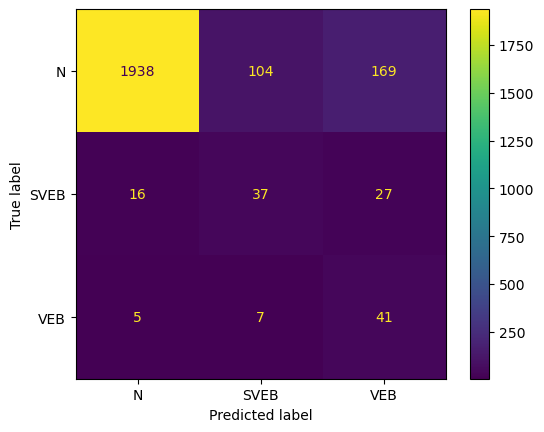

Fold 134:
  Test:  patient=133
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2411
         1.0       0.00      0.00      0.00         0
         2.0       0.83      0.95      0.88       344

    accuracy                           0.96      2755
   macro avg       0.61      0.64      0.62      2755
weighted avg       0.97      0.96      0.97      2755

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.995730  0.0    0.829517  0.964791     0.608416      0.974976
recall        0.967234  NaN    0.947674  0.964791     0.638303      0.964791
f1-score      0.981275  NaN    0.884668  0.964791     0.621981      0.969212
support    2411.000000  0.0  344.000000  0.964791  2755.000000   2755.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

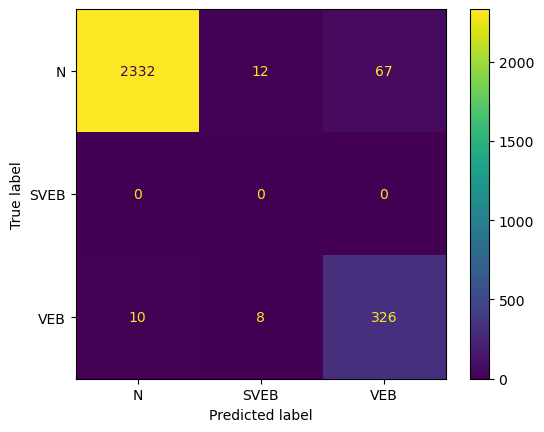

Fold 135:
  Test:  patient=134
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2443
         1.0       0.00      0.00      0.00         0
         2.0       0.82      0.80      0.81       229

    accuracy                           0.96      2672
   macro avg       0.60      0.59      0.60      2672
weighted avg       0.97      0.96      0.97      2672

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.982709  0.0    0.817778  0.962201     0.600162      0.968574
recall        0.977077  NaN    0.803493  0.962201     0.593524      0.962201
f1-score      0.979885  NaN    0.810573  0.962201     0.596819      0.965374
support    2443.000000  0.0  229.000000  0.962201  2672.000000   2672.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

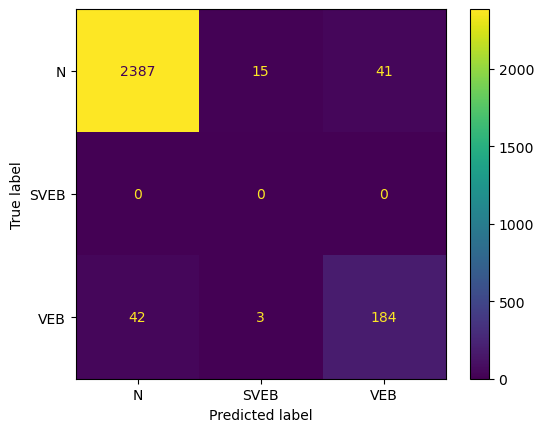

Fold 136:
  Test:  patient=135
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2323
         1.0       0.00      0.00      0.00         2
         2.0       0.97      0.97      0.97       125

    accuracy                           0.99      2450
   macro avg       0.66      0.65      0.66      2450
weighted avg       1.00      0.99      1.00      2450

                   0.0  1.0      2.0  accuracy    macro avg  weighted avg
precision     0.998706  0.0    0.968  0.994694     0.655569      0.996324
recall        0.996987  0.0    0.968  0.994694     0.654996      0.994694
f1-score      0.997846  0.0    0.968  0.994694     0.655282      0.995508
support    2323.000000  2.0  125.000  0.994694  2450.000000   2450.000000


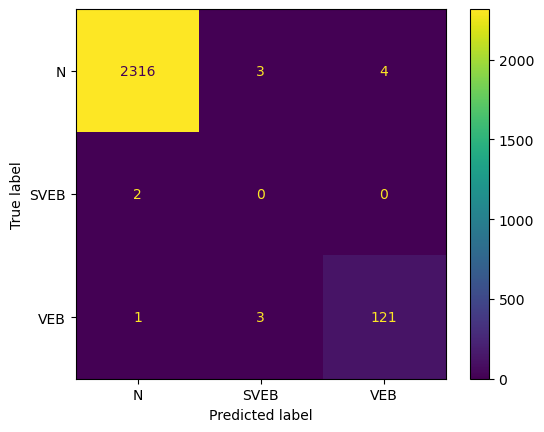

Fold 137:
  Test:  patient=136
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      2268
         1.0       0.00      0.00      0.00        16
         2.0       0.91      0.48      0.63       121

    accuracy                           0.96      2405
   macro avg       0.63      0.49      0.54      2405
weighted avg       0.96      0.96      0.96      2405

                   0.0   1.0         2.0  accuracy    macro avg  weighted avg
precision     0.974558   0.0    0.906250  0.963825     0.626936      0.964638
recall        0.996473   0.0    0.479339  0.963825     0.491937      0.963825
f1-score      0.985394   0.0    0.627027  0.963825     0.537474      0.960808
support    2268.000000  16.0  121.000000  0.963825  2405.000000   2405.000000


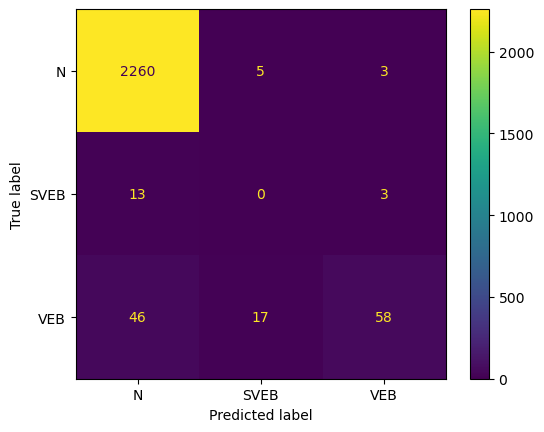

Fold 138:
  Test:  patient=137
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1518
         1.0       0.00      0.00      0.00         0
         2.0       0.97      0.56      0.71       247

    accuracy                           0.94      1765
   macro avg       0.64      0.52      0.56      1765
weighted avg       0.96      0.94      0.94      1765

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.963694  0.0    0.965278  0.935977     0.642991      0.963916
recall        0.996706  NaN    0.562753  0.935977     0.519820      0.935977
f1-score      0.979922  NaN    0.710997  0.935977     0.563640      0.942288
support    1518.000000  0.0  247.000000  0.935977  1765.000000   1765.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

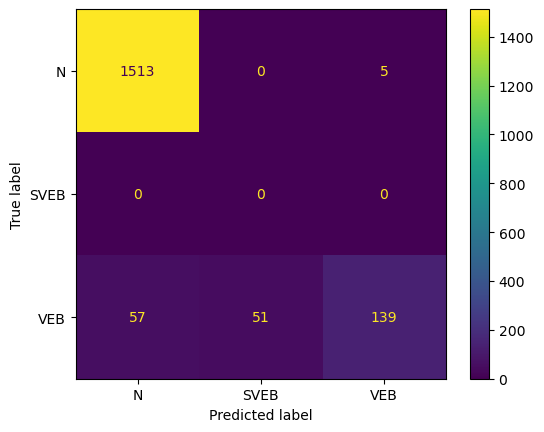

Fold 139:
  Test:  patient=138
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2434
         1.0       0.68      0.81      0.74        48
         2.0       0.82      1.00      0.90         9

    accuracy                           0.99      2491
   macro avg       0.83      0.93      0.88      2491
weighted avg       0.99      0.99      0.99      2491

                   0.0        1.0       2.0  accuracy    macro avg  \
precision     0.996698   0.684211  0.818182   0.98876     0.833030   
recall        0.992194   0.812500  1.000000   0.98876     0.934898   
f1-score      0.994441   0.742857  0.900000   0.98876     0.879099   
support    2434.000000  48.000000  9.000000   0.98876  2491.000000   

           weighted avg  
precision      0.990032  
recall         0.988760  
f1-score       0.989252  
support     2491.000000  


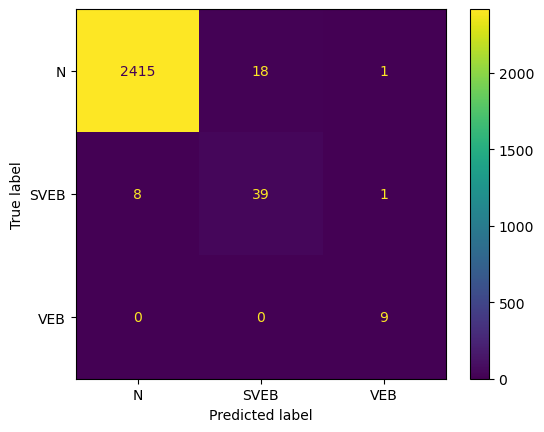

Fold 140:
  Test:  patient=139
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2638
         1.0       0.86      0.66      0.75        65
         2.0       0.00      0.00      0.00         1

    accuracy                           0.99      2704
   macro avg       0.62      0.55      0.58      2704
weighted avg       0.99      0.99      0.99      2704

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     0.995066   0.860000  0.0  0.985577     0.618355      0.991452
recall        0.993935   0.661538  0.0  0.985577     0.551824      0.985577
f1-score      0.994500   0.747826  0.0  0.985577     0.580775      0.988203
support    2638.000000  65.000000  1.0  0.985577  2704.000000   2704.000000


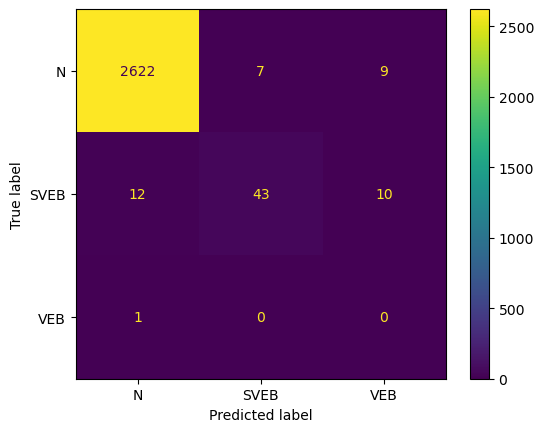

Fold 141:
  Test:  patient=140
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      1776
         1.0       0.03      0.50      0.06         2
         2.0       0.95      0.86      0.90       350

    accuracy                           0.96      2128
   macro avg       0.66      0.78      0.65      2128
weighted avg       0.97      0.96      0.97      2128

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.979260  0.034483    0.952381  0.962406     0.655375   
recall        0.983671  0.500000    0.857143  0.962406     0.780271   
f1-score      0.981461  0.064516    0.902256  0.962406     0.649411   
support    1776.000000  2.000000  350.000000  0.962406  2128.000000   

           weighted avg  
precision      0.973951  
recall         0.962406  
f1-score       0.967572  
support     2128.000000  


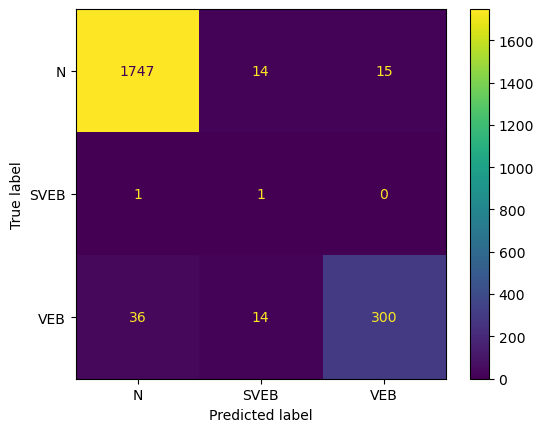

Fold 142:
  Test:  patient=141
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2946
         1.0       0.00      0.00      0.00         0
         2.0       0.75      0.95      0.84        41

    accuracy                           0.99      2987
   macro avg       0.58      0.65      0.61      2987
weighted avg       1.00      0.99      0.99      2987

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999318  0.0   0.75000  0.993974     0.583106      0.995896
recall        0.994569  NaN   0.95122  0.993974     0.648596      0.993974
f1-score      0.996938  NaN   0.83871  0.993974     0.611882      0.994766
support    2946.000000  0.0  41.00000  0.993974  2987.000000   2987.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

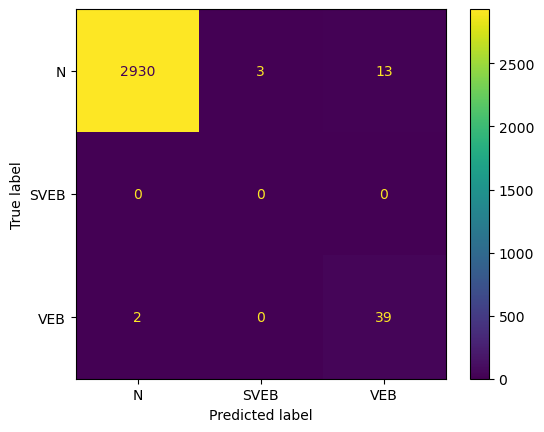

Fold 143:
  Test:  patient=142
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3597
         1.0       0.00      0.00      0.00         0
         2.0       0.90      0.93      0.91        83

    accuracy                           0.99      3680
   macro avg       0.63      0.64      0.64      3680
weighted avg       1.00      0.99      0.99      3680

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.998327  0.0   0.895349   0.99375     0.631225      0.996004
recall        0.995274  NaN   0.927711   0.99375     0.640995      0.993750
f1-score      0.996798  NaN   0.911243   0.99375     0.636014      0.994868
support    3597.000000  0.0  83.000000   0.99375  3680.000000   3680.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

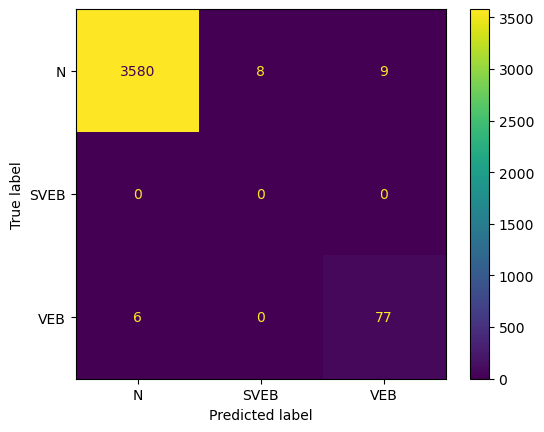

Fold 144:
  Test:  patient=143
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      2076
         1.0       0.00      0.00      0.00         0
         2.0       0.07      1.00      0.13         4

    accuracy                           0.96      2080
   macro avg       0.36      0.65      0.37      2080
weighted avg       1.00      0.96      0.98      2080

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.068966  0.963942     0.356322      0.998210
recall        0.963873  NaN  1.000000  0.963942     0.654624      0.963942
f1-score      0.981604  NaN  0.129032  0.963942     0.370212      0.979965
support    2076.000000  0.0  4.000000  0.963942  2080.000000   2080.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

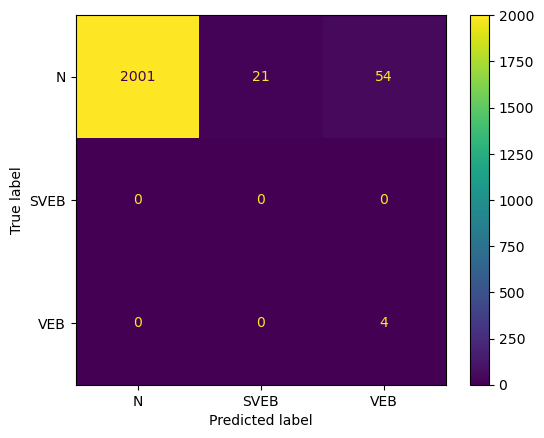

Fold 145:
  Test:  patient=144
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2798
         1.0       0.00      0.00      0.00         1
         2.0       0.40      1.00      0.57         6

    accuracy                           0.99      2805
   macro avg       0.47      0.66      0.52      2805
weighted avg       1.00      0.99      0.99      2805

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.400000  0.988948     0.466667      0.998360
recall        0.989278  0.0  1.000000  0.988948     0.663093      0.988948
f1-score      0.994610  0.0  0.571429  0.988948     0.522013      0.993350
support    2798.000000  1.0  6.000000  0.988948  2805.000000   2805.000000


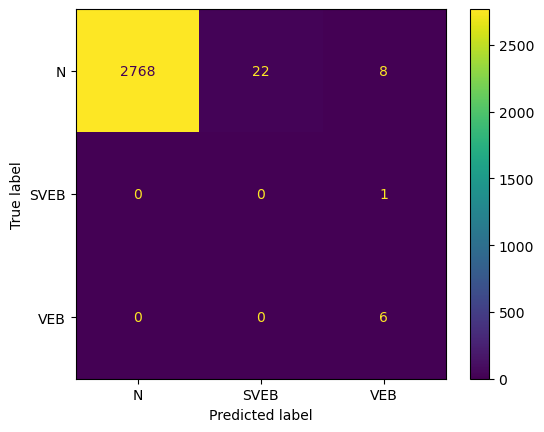

Fold 146:
  Test:  patient=145
              precision    recall  f1-score   support

         0.0       0.99      0.91      0.95      1791
         1.0       0.00      0.00      0.00         0
         2.0       0.60      0.92      0.73       230

    accuracy                           0.91      2021
   macro avg       0.53      0.61      0.56      2021
weighted avg       0.95      0.91      0.92      2021

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.991489  0.0    0.598870  0.911925     0.530120      0.946807
recall        0.910664  NaN    0.921739  0.911925     0.610801      0.911925
f1-score      0.949360  NaN    0.726027  0.911925     0.558462      0.923943
support    1791.000000  0.0  230.000000  0.911925  2021.000000   2021.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

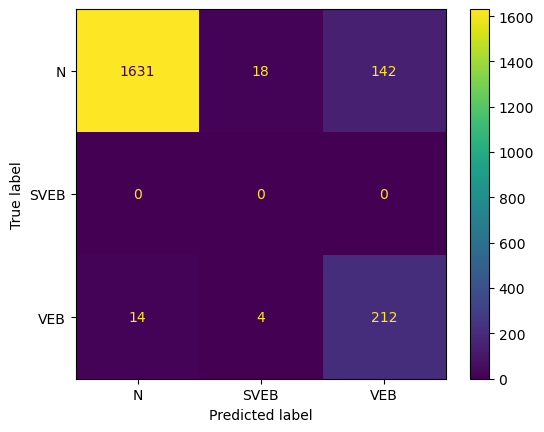

Fold 147:
  Test:  patient=146
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1800
         1.0       0.00      0.00      0.00         0
         2.0       0.95      0.92      0.94        64

    accuracy                           0.99      1864
   macro avg       0.65      0.64      0.64      1864
weighted avg       1.00      0.99      0.99      1864

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.997205  0.0   0.951613  0.988734     0.649606      0.995640
recall        0.991111  NaN   0.921875  0.988734     0.637662      0.988734
f1-score      0.994149  NaN   0.936508  0.988734     0.643552      0.992170
support    1800.000000  0.0  64.000000  0.988734  1864.000000   1864.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

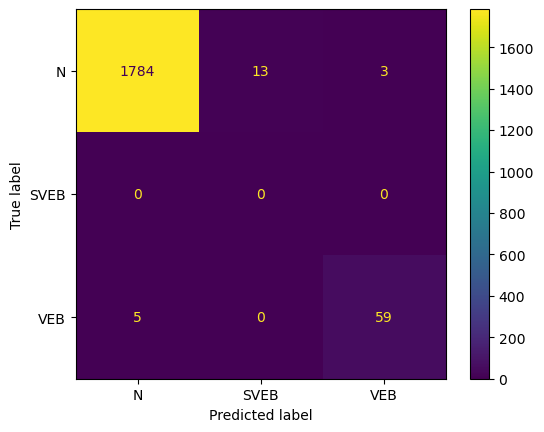

Fold 148:
  Test:  patient=147
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2630
         1.0       0.00      0.00      0.00         0
         2.0       0.60      1.00      0.75         3

    accuracy                           1.00      2633
   macro avg       0.53      0.67      0.58      2633
weighted avg       1.00      1.00      1.00      2633

                   0.0  1.0   2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.60  0.995063     0.533333      0.999544
recall        0.995057  NaN  1.00  0.995063     0.665019      0.995063
f1-score      0.997522  NaN  0.75  0.995063     0.582507      0.997240
support    2630.000000  0.0  3.00  0.995063  2633.000000   2633.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

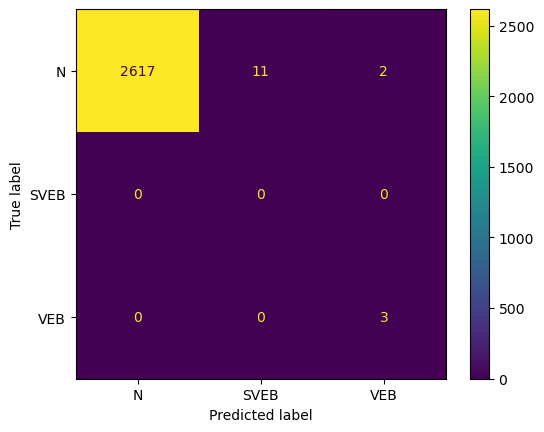

Fold 149:
  Test:  patient=148
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      1518
         1.0       0.00      0.00      0.00         0
         2.0       0.02      0.50      0.03         2

    accuracy                           0.85      1520
   macro avg       0.34      0.45      0.32      1520
weighted avg       1.00      0.85      0.92      1520

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.017857  0.853947     0.339286      0.998708
recall        0.854414  NaN  0.500000  0.853947     0.451471      0.853947
f1-score      0.921492  NaN  0.034483  0.853947     0.318658      0.920325
support    1518.000000  0.0  2.000000  0.853947  1520.000000   1520.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

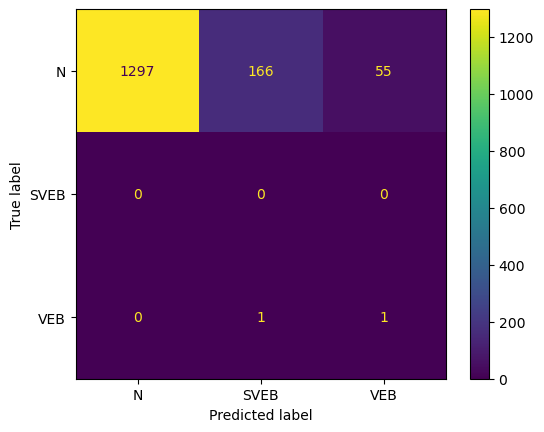

Fold 150:
  Test:  patient=149


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92      1644
         1.0       0.00      0.00      0.00         0
         2.0       0.17      0.81      0.29        27

    accuracy                           0.85      1671
   macro avg       0.39      0.56      0.40      1671
weighted avg       0.99      0.85      0.91      1671

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999288  0.0   0.174603  0.853381     0.391297      0.985963
recall        0.854015  NaN   0.814815  0.853381     0.556276      0.853381
f1-score      0.920958  NaN   0.287582  0.853381     0.402846      0.910724
support    1644.000000  0.0  27.000000  0.853381  1671.000000   1671.000000


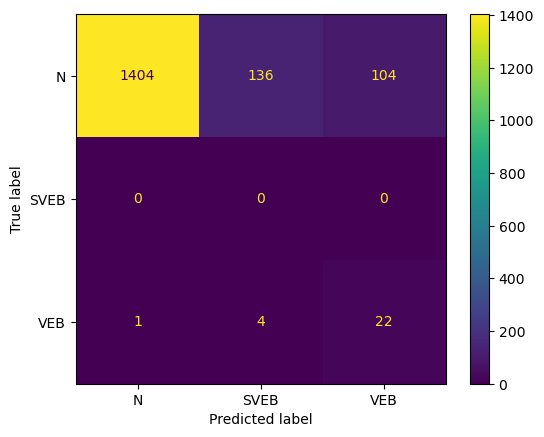

Fold 151:
  Test:  patient=150


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      2660
         1.0       0.00      0.00      0.00         0
         2.0       0.87      0.49      0.62       366

    accuracy                           0.91      3026
   macro avg       0.61      0.49      0.53      3026
weighted avg       0.95      0.91      0.92      3026

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.959926  0.0    0.868293  0.913748     0.609406      0.948843
recall        0.972556  NaN    0.486339  0.913748     0.486298      0.913748
f1-score      0.966200  NaN    0.623468  0.913748     0.529889      0.924746
support    2660.000000  0.0  366.000000  0.913748  3026.000000   3026.000000


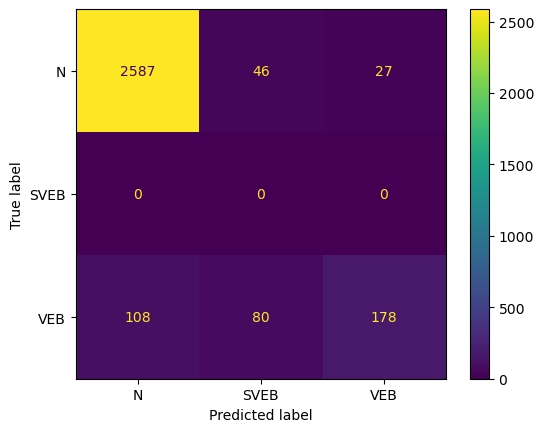

Fold 152:
  Test:  patient=151
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1211
         1.0       0.00      0.00      0.00         0
         2.0       0.93      0.82      0.87       849

    accuracy                           0.90      2060
   macro avg       0.63      0.59      0.61      2060
weighted avg       0.94      0.90      0.92      2060

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.949836  0.0    0.931909  0.899515     0.627248      0.942447
recall        0.953757  NaN    0.822144  0.899515     0.591967      0.899515
f1-score      0.951792  NaN    0.873592  0.899515     0.608461      0.919563
support    1211.000000  0.0  849.000000  0.899515  2060.000000   2060.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

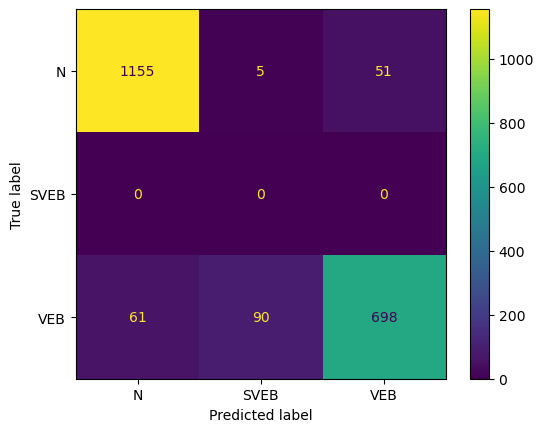

Fold 153:
  Test:  patient=152
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      2360
         1.0       0.86      0.45      0.59       179
         2.0       0.90      0.77      0.83       110

    accuracy                           0.95      2649
   macro avg       0.91      0.74      0.80      2649
weighted avg       0.95      0.95      0.95      2649

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.956928    0.861702    0.904255   0.95168     0.907629   
recall        0.997881    0.452514    0.772727   0.95168     0.741041   
f1-score      0.976976    0.593407    0.833333   0.95168     0.801239   
support    2360.000000  179.000000  110.000000   0.95168  2649.000000   

           weighted avg  
precision      0.948306  
recall         0.951680  
f1-score       0.945092  
support     2649.000000  


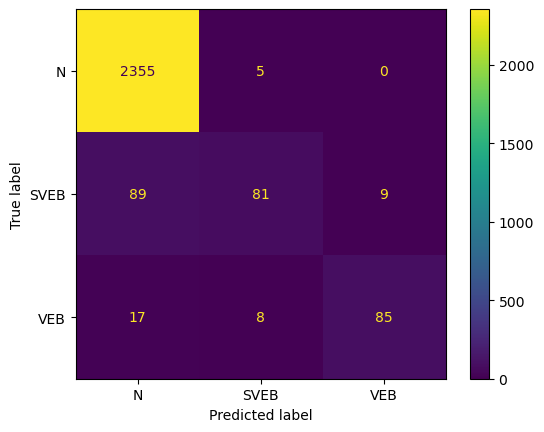

Fold 154:
  Test:  patient=153
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2070
         1.0       0.75      0.78      0.76       104
         2.0       0.88      0.88      0.88         8

    accuracy                           0.98      2182
   macro avg       0.87      0.88      0.88      2182
weighted avg       0.98      0.98      0.98      2182

                   0.0         1.0    2.0  accuracy    macro avg  weighted avg
precision     0.988383    0.750000  0.875  0.976169     0.871128      0.976606
recall        0.986473    0.778846  0.875  0.976169     0.880107      0.976169
f1-score      0.987427    0.764151  0.875  0.976169     0.875526      0.976373
support    2070.000000  104.000000  8.000  0.976169  2182.000000   2182.000000


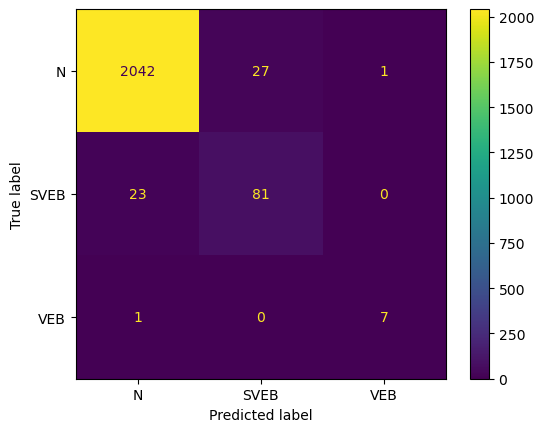

Fold 155:
  Test:  patient=154
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2814
         1.0       0.64      0.66      0.65       124
         2.0       0.91      0.74      0.81       185

    accuracy                           0.96      3123
   macro avg       0.84      0.80      0.82      3123
weighted avg       0.96      0.96      0.96      3123

                   0.0         1.0         2.0  accuracy    macro avg  \
precision     0.980668    0.635659    0.912752  0.963176     0.843026   
recall        0.991471    0.661290    0.735135  0.963176     0.795966   
f1-score      0.986040    0.648221    0.814371  0.963176     0.816211   
support    2814.000000  124.000000  185.000000  0.963176  3123.000000   

           weighted avg  
precision      0.962946  
recall         0.963176  
f1-score       0.962457  
support     3123.000000  


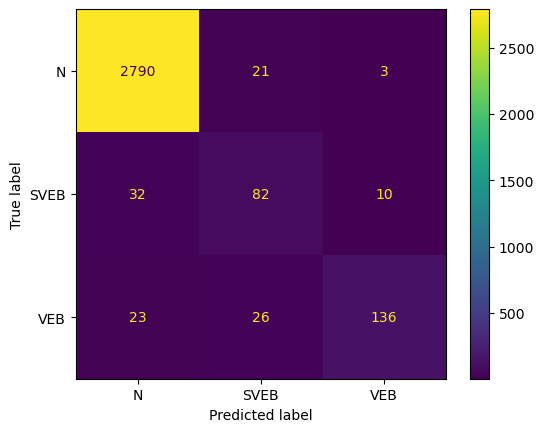

Fold 156:
  Test:  patient=155


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2190
         1.0       0.00      0.00      0.00         0
         2.0       0.45      1.00      0.62        13

    accuracy                           0.99      2203
   macro avg       0.48      0.66      0.54      2203
weighted avg       1.00      0.99      0.99      2203

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0   0.448276  0.991375     0.482759      0.996744
recall        0.991324  NaN   1.000000  0.991375     0.663775      0.991375
f1-score      0.995643  NaN   0.619048  0.991375     0.538230      0.993421
support    2190.000000  0.0  13.000000  0.991375  2203.000000   2203.000000


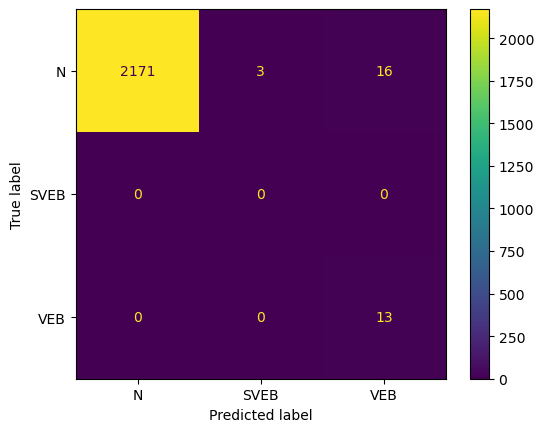

Fold 157:
  Test:  patient=156


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2563
         1.0       0.00      0.00      0.00         0
         2.0       0.23      1.00      0.38         6

    accuracy                           0.99      2569
   macro avg       0.41      0.66      0.46      2569
weighted avg       1.00      0.99      0.99      2569

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.230769  0.987544     0.410256      0.998203
recall        0.987515  NaN  1.000000  0.987544     0.662505      0.987544
f1-score      0.993718  NaN  0.375000  0.987544     0.456239      0.992273
support    2563.000000  0.0  6.000000  0.987544  2569.000000   2569.000000


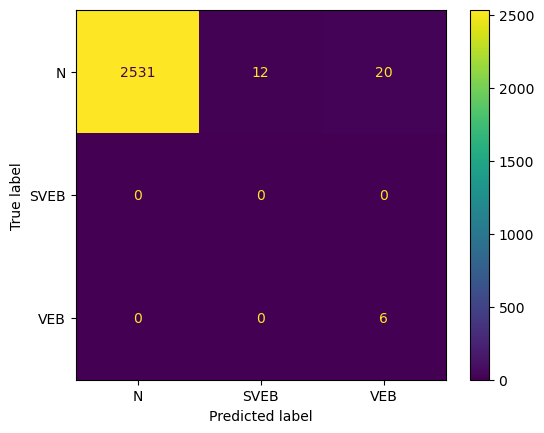

Fold 158:
  Test:  patient=157
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      1703
         1.0       0.00      0.00      0.00         2
         2.0       0.17      0.60      0.26         5

    accuracy                           0.96      1710
   macro avg       0.39      0.52      0.41      1710
weighted avg       1.00      0.96      0.98      1710

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.998781  0.0  0.166667  0.960234     0.388483      0.995180
recall        0.962419  0.0  0.600000  0.960234     0.520806      0.960234
f1-score      0.980263  0.0  0.260870  0.960234     0.413711      0.977013
support    1703.000000  2.0  5.000000  0.960234  1710.000000   1710.000000


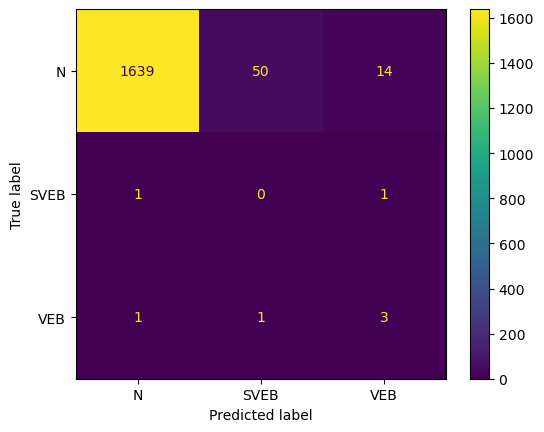

Fold 159:
  Test:  patient=158
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1496
         1.0       0.00      0.00      0.00         7
         2.0       0.50      0.50      0.50         4

    accuracy                           0.99      1507
   macro avg       0.50      0.50      0.50      1507
weighted avg       0.99      0.99      0.99      1507

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.995343  NaN  0.5  0.994028     0.498448      0.989405
recall        1.000000  0.0  0.5  0.994028     0.500000      0.994028
f1-score      0.997666  NaN  0.5  0.994028     0.499222      0.991711
support    1496.000000  7.0  4.0  0.994028  1507.000000   1507.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\

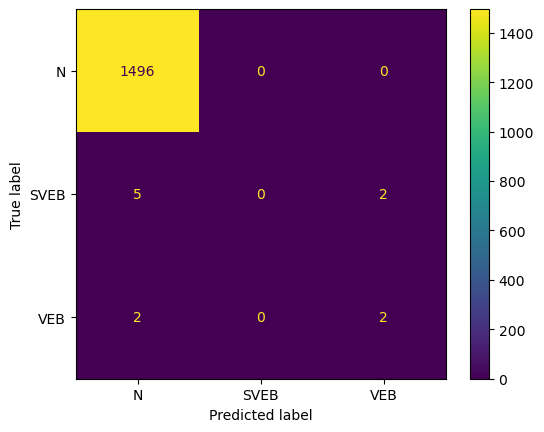

Fold 160:
  Test:  patient=159
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1884
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.99      1.00       719

    accuracy                           1.00      2603
   macro avg       0.67      0.66      0.67      2603
weighted avg       1.00      1.00      1.00      2603

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.998939  0.0    0.998603  0.998079     0.665847      0.998846
recall        0.999469  NaN    0.994437  0.998079     0.664635      0.998079
f1-score      0.999204  NaN    0.996516  0.998079     0.665240      0.998461
support    1884.000000  0.0  719.000000  0.998079  2603.000000   2603.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

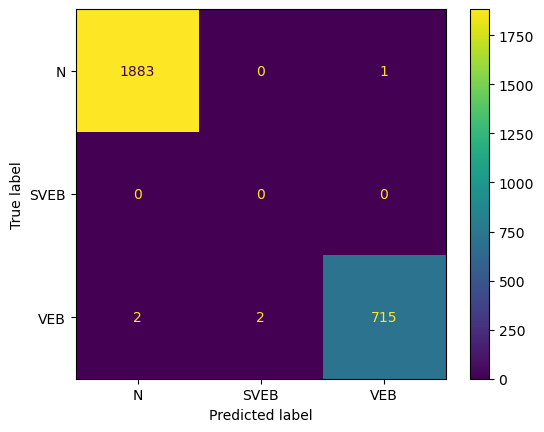

Fold 161:
  Test:  patient=160
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97      1711
         1.0       0.00      0.00      0.00         0
         2.0       0.09      1.00      0.16         4

    accuracy                           0.95      1715
   macro avg       0.36      0.65      0.38      1715
weighted avg       1.00      0.95      0.97      1715

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.086957  0.949271     0.362319      0.997870
recall        0.949153  NaN  1.000000  0.949271     0.649718      0.949271
f1-score      0.973913  NaN  0.160000  0.949271     0.377971      0.972015
support    1711.000000  0.0  4.000000  0.949271  1715.000000   1715.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

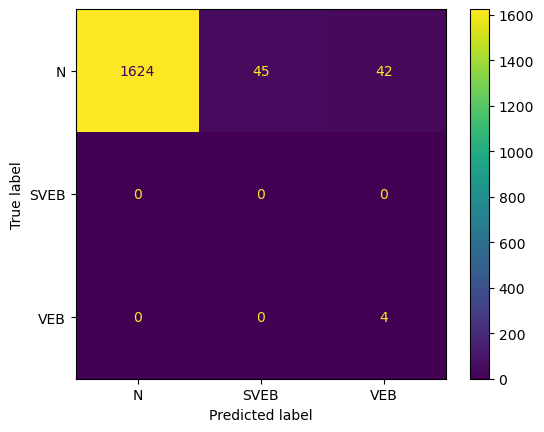

Fold 162:
  Test:  patient=161


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1835
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.83      0.91       783

    accuracy                           0.95      2618
   macro avg       0.65      0.61      0.63      2618
weighted avg       0.96      0.95      0.95      2618

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.949974  0.0    0.989394   0.94576     0.646456      0.961764
recall        0.993460  NaN    0.833972   0.94576     0.609144      0.945760
f1-score      0.971231  NaN    0.905059   0.94576     0.625430      0.951440
support    1835.000000  0.0  783.000000   0.94576  2618.000000   2618.000000


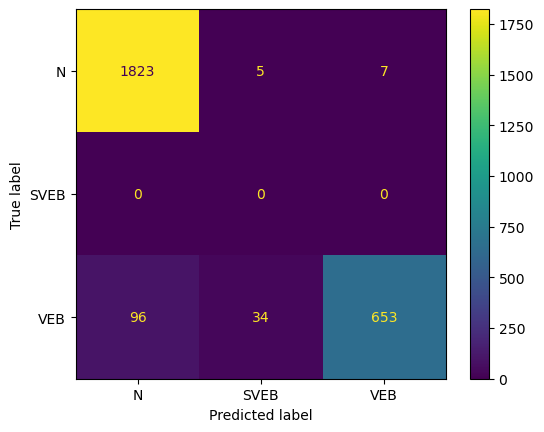

Fold 163:
  Test:  patient=162


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1705
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.94      0.97       755

    accuracy                           0.98      2460
   macro avg       0.66      0.65      0.65      2460
weighted avg       0.99      0.98      0.98      2460

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.981556  0.0    0.998592  0.980488     0.660049      0.986785
recall        0.998827  NaN    0.939073  0.980488     0.645967      0.980488
f1-score      0.990116  NaN    0.967918  0.980488     0.652678      0.983303
support    1705.000000  0.0  755.000000  0.980488  2460.000000   2460.000000


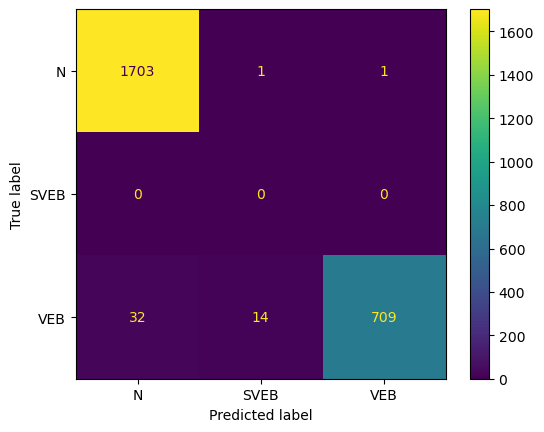

Fold 164:
  Test:  patient=163
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      1843
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.85      0.91      1364

    accuracy                           0.93      3207
   macro avg       0.64      0.61      0.62      3207
weighted avg       0.95      0.93      0.94      3207

                   0.0  1.0          2.0  accuracy    macro avg  weighted avg
precision     0.919638  0.0     0.989708  0.930776     0.636449      0.949441
recall        0.993489  NaN     0.846041  0.930776     0.613177      0.930776
f1-score      0.955138  NaN     0.912253  0.930776     0.622464      0.936898
support    1843.000000  0.0  1364.000000  0.930776  3207.000000   3207.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

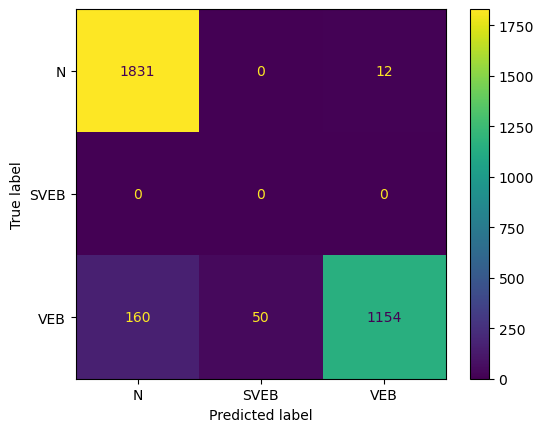

Fold 165:
  Test:  patient=164


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      1560
         1.0       0.00      0.00      0.00         0
         2.0       0.76      0.89      0.82        57

    accuracy                           0.97      1617
   macro avg       0.59      0.62      0.60      1617
weighted avg       0.99      0.97      0.98      1617

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.996073  0.0   0.761194  0.972789     0.585756      0.987794
recall        0.975641  NaN   0.894737  0.972789     0.623459      0.972789
f1-score      0.985751  NaN   0.822581  0.972789     0.602777      0.979999
support    1560.000000  0.0  57.000000  0.972789  1617.000000   1617.000000


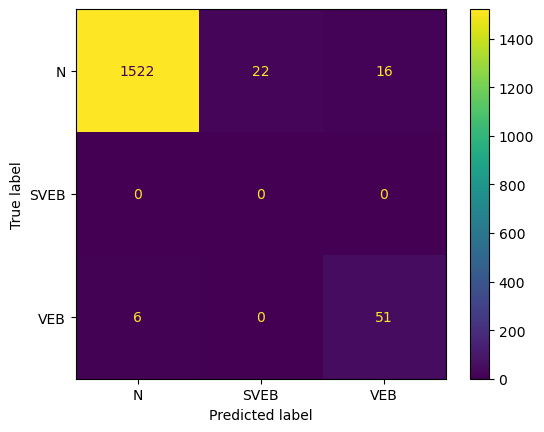

Fold 166:
  Test:  patient=165
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92      1245
         1.0       0.99      0.63      0.77       589
         2.0       0.04      1.00      0.08         1

    accuracy                           0.88      1835
   macro avg       0.63      0.87      0.59      1835
weighted avg       0.90      0.88      0.87      1835

                   0.0         1.0       2.0  accuracy    macro avg  \
precision     0.860125    0.986631  0.041667  0.875204     0.629474   
recall        0.992771    0.626486  1.000000  0.875204     0.873086   
f1-score      0.921700    0.766355  0.080000  0.875204     0.589352   
support    1245.000000  589.000000  1.000000  0.875204  1835.000000   

           weighted avg  
precision      0.900285  
recall         0.875204  
f1-score       0.871379  
support     1835.000000  


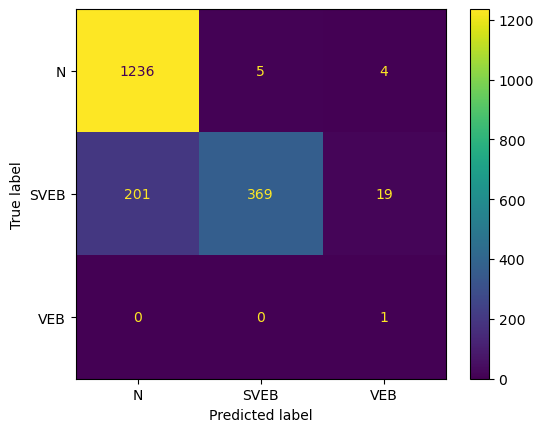

Fold 167:
  Test:  patient=166
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1427
         1.0       0.99      0.90      0.95       536
         2.0       0.00      0.00      0.00         0

    accuracy                           0.97      1963
   macro avg       0.66      0.63      0.65      1963
weighted avg       0.99      0.97      0.98      1963

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.982069    0.993840  0.0  0.971982     0.658636      0.985283
recall        0.997898    0.902985  NaN  0.971982     0.633628      0.971982
f1-score      0.989920    0.946237  NaN  0.971982     0.645386      0.977992
support    1427.000000  536.000000  0.0  0.971982  1963.000000   1963.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

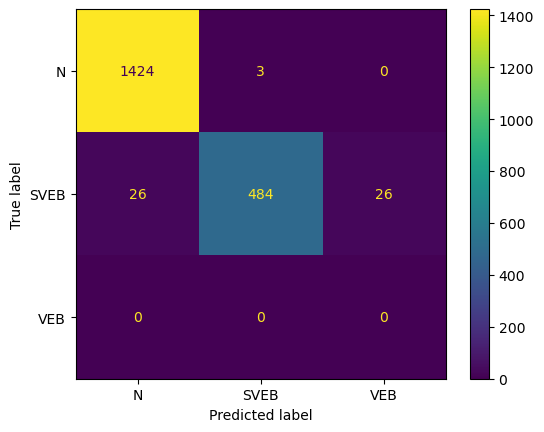

Fold 168:
  Test:  patient=167
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      3199
         1.0       0.00      0.00      0.00         0
         2.0       0.96      0.81      0.88       457

    accuracy                           0.95      3656
   macro avg       0.65      0.59      0.62      3656
weighted avg       0.98      0.95      0.96      3656

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.976708  0.0    0.963446  0.949672     0.646718      0.975050
recall        0.969991  NaN    0.807440  0.949672     0.592477      0.949672
f1-score      0.973338  NaN    0.878571  0.949672     0.617303      0.961492
support    3199.000000  0.0  457.000000  0.949672  3656.000000   3656.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

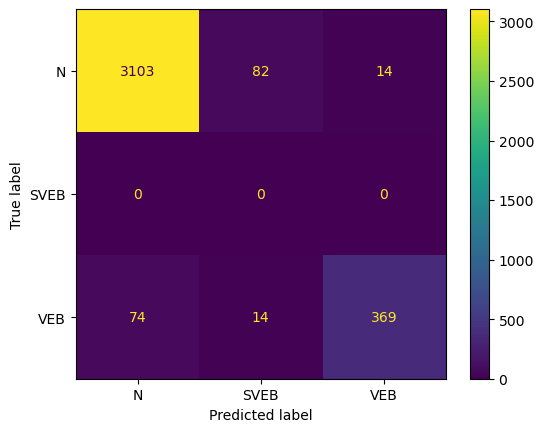

Fold 169:
  Test:  patient=168
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      3447
         1.0       0.00      0.00      0.00         0
         2.0       0.86      0.94      0.90       450

    accuracy                           0.97      3897
   macro avg       0.62      0.64      0.63      3897
weighted avg       0.98      0.97      0.97      3897

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.993450  0.0    0.856566  0.965101     0.616672      0.977644
recall        0.968088  NaN    0.942222  0.965101     0.636770      0.965101
f1-score      0.980605  NaN    0.897354  0.965101     0.625987      0.970992
support    3447.000000  0.0  450.000000  0.965101  3897.000000   3897.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

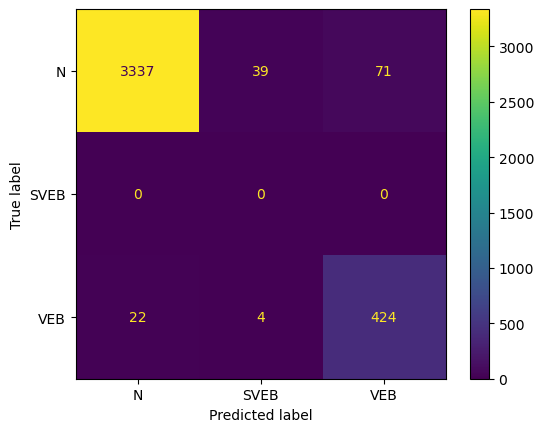

Fold 170:
  Test:  patient=169
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2007
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.99      0.99       452

    accuracy                           1.00      2459
   macro avg       0.66      0.66      0.66      2459
weighted avg       1.00      1.00      1.00      2459

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.997510  0.0    0.995536  0.995933     0.664349      0.997147
recall        0.998007  NaN    0.986726  0.995933     0.661578      0.995933
f1-score      0.997758  NaN    0.991111  0.995933     0.662957      0.996537
support    2007.000000  0.0  452.000000  0.995933  2459.000000   2459.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

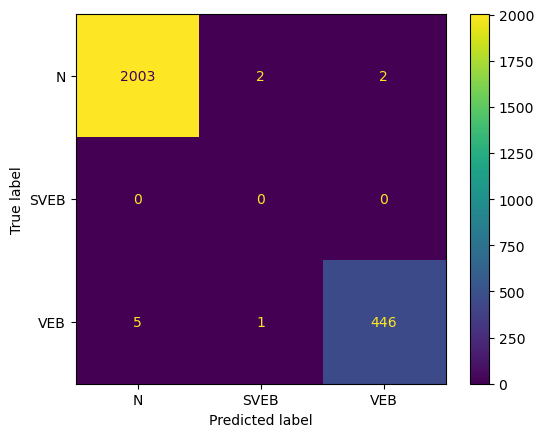

Fold 171:
  Test:  patient=170
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      2153
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.90      0.95       543

    accuracy                           0.98      2696
   macro avg       0.66      0.63      0.65      2696
weighted avg       0.99      0.98      0.99      2696

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.989880  0.0    0.997963   0.97997     0.662615      0.991508
recall        0.999536  NaN    0.902394   0.97997     0.633977      0.979970
f1-score      0.994685  NaN    0.947776   0.97997     0.647487      0.985237
support    2153.000000  0.0  543.000000   0.97997  2696.000000   2696.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

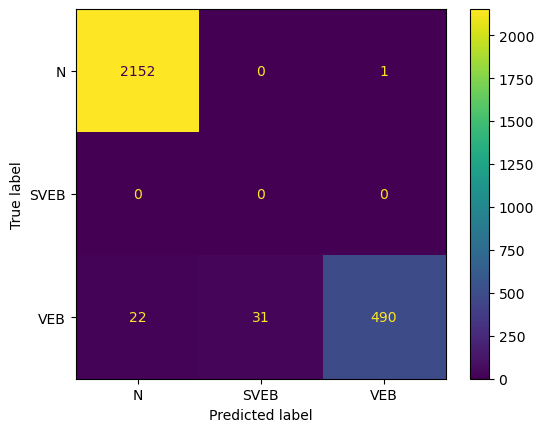

Fold 172:
  Test:  patient=171
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99      1460
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.94      0.97       313

    accuracy                           0.99      1773
   macro avg       0.66      0.65      0.65      1773
weighted avg       0.99      0.99      0.99      1773

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.987813  0.0    0.996599  0.988156     0.661471      0.989364
recall        0.999315  NaN    0.936102  0.988156     0.645139      0.988156
f1-score      0.993531  NaN    0.965404  0.988156     0.652978      0.988565
support    1460.000000  0.0  313.000000  0.988156  1773.000000   1773.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

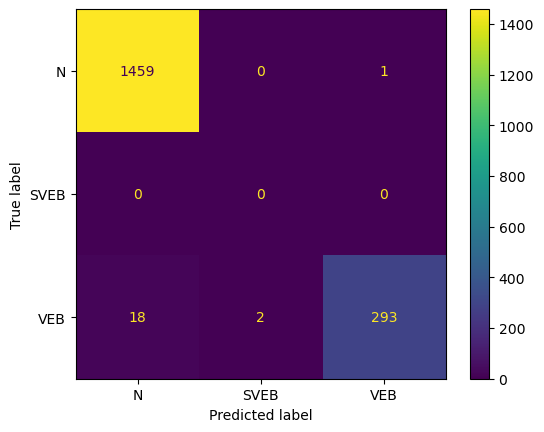

Fold 173:
  Test:  patient=172
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2566
         1.0       0.00      0.00      0.00         6
         2.0       0.95      0.98      0.96        92

    accuracy                           0.99      2664
   macro avg       0.65      0.66      0.65      2664
weighted avg       0.99      0.99      0.99      2664

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.997660  0.0   0.947368  0.993994     0.648343      0.993676
recall        0.996882  0.0   0.978261  0.993994     0.658381      0.993994
f1-score      0.997271  0.0   0.962567  0.993994     0.653279      0.993826
support    2566.000000  6.0  92.000000  0.993994  2664.000000   2664.000000


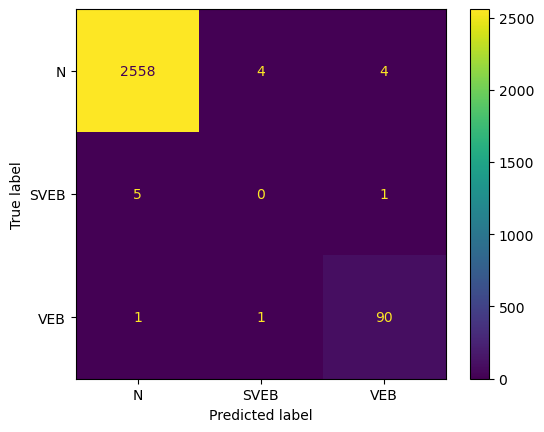

Fold 174:
  Test:  patient=173
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96      1622
         1.0       0.00      0.00      0.00         5
         2.0       0.00      0.00      0.00         1

    accuracy                           0.93      1628
   macro avg       0.33      0.31      0.32      1628
weighted avg       0.99      0.93      0.96      1628

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     0.996055  0.0  0.0   0.93059     0.332018      0.992384
recall        0.934032  0.0  0.0   0.93059     0.311344      0.930590
f1-score      0.964047  0.0  0.0   0.93059     0.321349      0.960494
support    1622.000000  5.0  1.0   0.93059  1628.000000   1628.000000


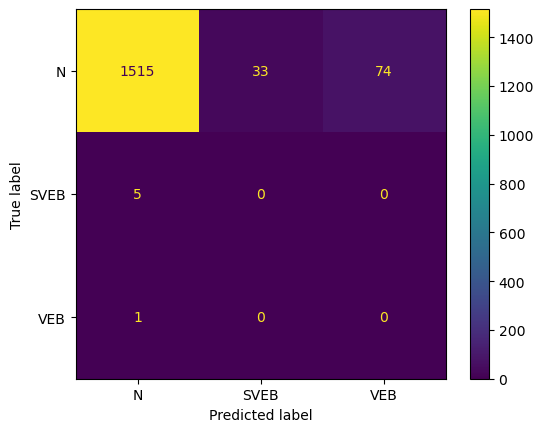

Fold 175:
  Test:  patient=174
              precision    recall  f1-score   support

         0.0       0.76      0.99      0.86      1544
         1.0       0.00      0.00      0.00         0
         2.0       0.99      0.65      0.78      1554

    accuracy                           0.82      3098
   macro avg       0.58      0.55      0.55      3098
weighted avg       0.88      0.82      0.82      3098

                   0.0  1.0          2.0  accuracy    macro avg  weighted avg
precision     0.759186  0.0     0.991142  0.818593     0.583442      0.875538
recall        0.990285  NaN     0.648005  0.818593     0.546097      0.818593
f1-score      0.859472  NaN     0.783658  0.818593     0.547710      0.821442
support    1544.000000  0.0  1554.000000  0.818593  3098.000000   3098.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

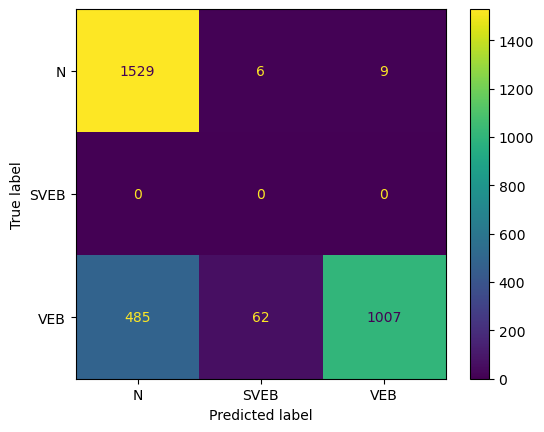

Fold 176:
  Test:  patient=175
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1085
         1.0       0.00      0.00      0.00         0
         2.0       0.99      1.00      1.00      1120

    accuracy                           1.00      2205
   macro avg       0.66      0.66      0.66      2205
weighted avg       1.00      1.00      1.00      2205

                   0.0  1.0          2.0  accuracy    macro avg  weighted avg
precision     0.998150  0.0     0.994652  0.995465     0.664267      0.996373
recall        0.994470  NaN     0.996429  0.995465     0.663633      0.995465
f1-score      0.996307  NaN     0.995540  0.995465     0.663949      0.995917
support    1085.000000  0.0  1120.000000  0.995465  2205.000000   2205.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

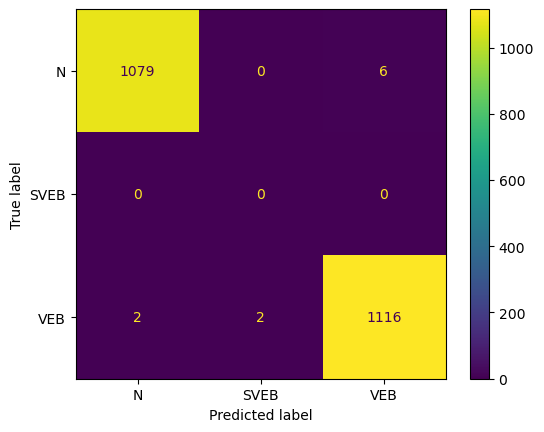

Fold 177:
  Test:  patient=176
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1802
         1.0       0.83      0.62      0.71         8
         2.0       1.00      1.00      1.00       683

    accuracy                           1.00      2493
   macro avg       0.94      0.87      0.90      2493
weighted avg       1.00      1.00      1.00      2493

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.998336  0.833333    0.998538  0.997994     0.943402   
recall        0.998890  0.625000    1.000000  0.997994     0.874630   
f1-score      0.998613  0.714286    0.999268  0.997994     0.904056   
support    1802.000000  8.000000  683.000000  0.997994  2493.000000   

           weighted avg  
precision      0.997862  
recall         0.997994  
f1-score       0.997880  
support     2493.000000  


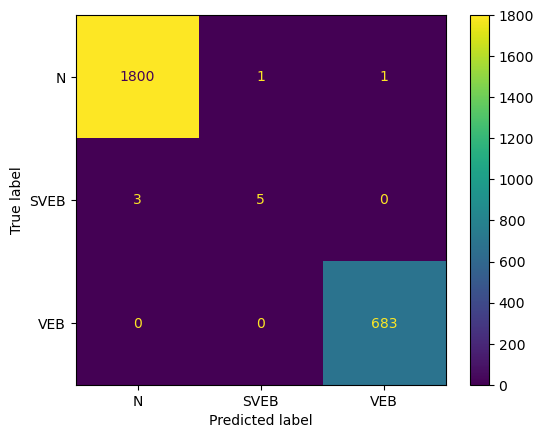

Fold 178:
  Test:  patient=177
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1435
         1.0       0.00      0.00      0.00         0
         2.0       1.00      1.00      1.00       491

    accuracy                           1.00      1926
   macro avg       0.67      0.67      0.67      1926
weighted avg       1.00      1.00      1.00      1926

                   0.0  1.0    2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0    1.0  0.999481     0.666667      1.000000
recall        0.999303  NaN    1.0  0.999481     0.666434      0.999481
f1-score      0.999651  NaN    1.0  0.999481     0.666550      0.999740
support    1435.000000  0.0  491.0  0.999481  1926.000000   1926.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

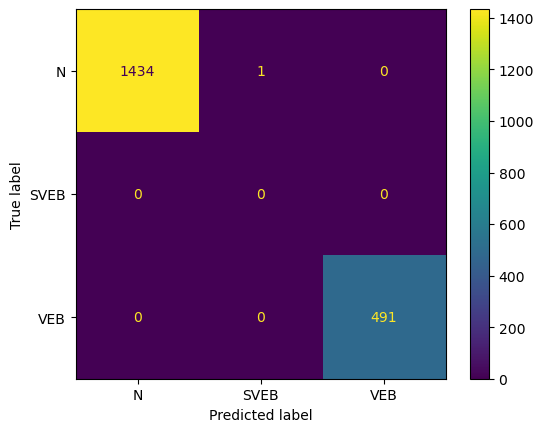

Fold 179:
  Test:  patient=178
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2230
         1.0       0.08      1.00      0.14         1
         2.0       0.91      0.98      0.95       422

    accuracy                           0.98      2653
   macro avg       0.66      0.99      0.69      2653
weighted avg       0.98      0.98      0.98      2653

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.998627  0.076923    0.912088  0.979269     0.662546   
recall        0.978475  1.000000    0.983412  0.979269     0.987296   
f1-score      0.988448  0.142857    0.946408  0.979269     0.692571   
support    2230.000000  1.000000  422.000000  0.979269  2653.000000   

           weighted avg  
precision      0.984514  
recall         0.979269  
f1-score       0.981443  
support     2653.000000  


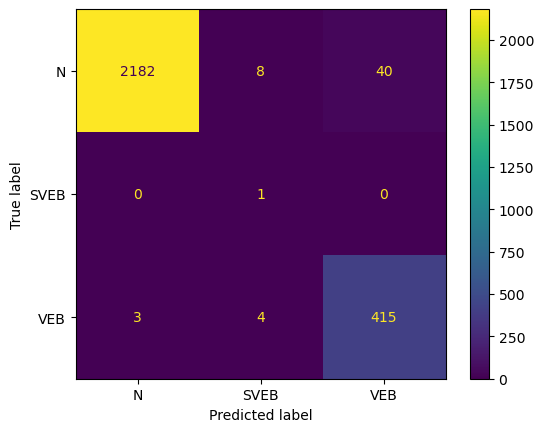

Fold 180:
  Test:  patient=179
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.97      1857
         1.0       0.00      0.00      0.00         1
         2.0       0.59      0.65      0.62        93

    accuracy                           0.94      1951
   macro avg       0.53      0.53      0.53      1951
weighted avg       0.96      0.94      0.95      1951

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.982222  0.0   0.594059  0.936955     0.525427      0.963216
recall        0.952073  0.0   0.645161  0.936955     0.532412      0.936955
f1-score      0.966913  0.0   0.618557  0.936955     0.528490      0.949812
support    1857.000000  1.0  93.000000  0.936955  1951.000000   1951.000000


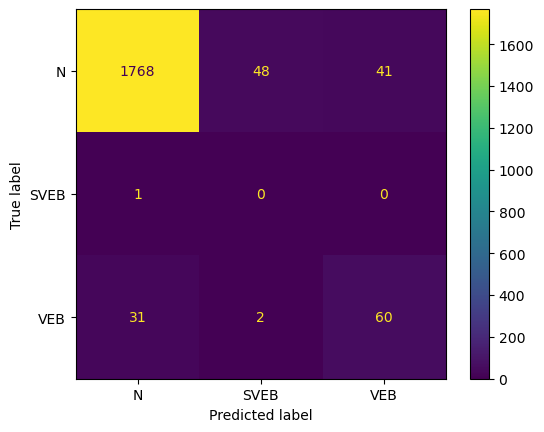

Fold 181:
  Test:  patient=180
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2117
         1.0       0.00      0.00      0.00         2
         2.0       0.99      0.98      0.99       235

    accuracy                           1.00      2354
   macro avg       0.66      0.66      0.66      2354
weighted avg       1.00      1.00      1.00      2354

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.997639  0.0    0.987179  0.995752     0.661606      0.995747
recall        0.998111  0.0    0.982979  0.995752     0.660363      0.995752
f1-score      0.997875  0.0    0.985075  0.995752     0.660983      0.995749
support    2117.000000  2.0  235.000000  0.995752  2354.000000   2354.000000


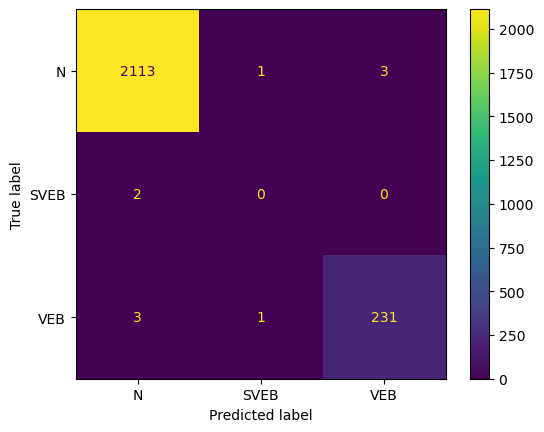

Fold 182:
  Test:  patient=181
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2119
         1.0       0.00      0.00      0.00         0
         2.0       0.69      0.93      0.79        27

    accuracy                           0.99      2146
   macro avg       0.56      0.64      0.60      2146
weighted avg       1.00      0.99      0.99      2146

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0   0.694444  0.987884     0.564815      0.996156
recall        0.988674  NaN   0.925926  0.987884     0.638200      0.987884
f1-score      0.994305  NaN   0.793651  0.987884     0.595985      0.991780
support    2119.000000  0.0  27.000000  0.987884  2146.000000   2146.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

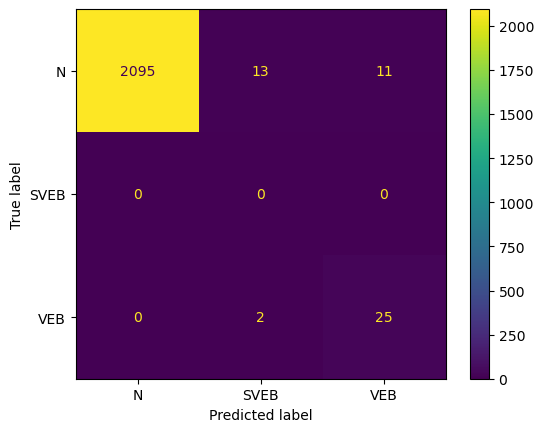

Fold 183:
  Test:  patient=182
              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98      2993
         1.0       0.00      0.00      0.00         0
         2.0       0.05      0.75      0.09         4

    accuracy                           0.96      2997
   macro avg       0.35      0.57      0.36      2997
weighted avg       1.00      0.96      0.98      2997

                   0.0  1.0       2.0  accuracy    macro avg  weighted avg
precision     0.999654  0.0  0.046875  0.964298     0.348843      0.998382
recall        0.964584  NaN  0.750000  0.964298     0.571528      0.964298
f1-score      0.981806  NaN  0.088235  0.964298     0.356680      0.980613
support    2993.000000  0.0  4.000000  0.964298  2997.000000   2997.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

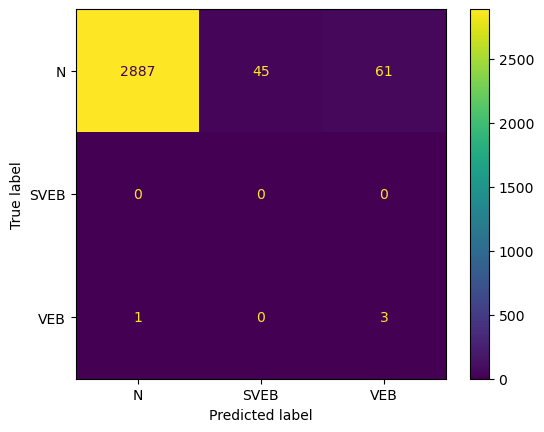

Fold 184:
  Test:  patient=183
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1969
         1.0       0.05      0.33      0.09         3
         2.0       1.00      0.95      0.97       802

    accuracy                           0.98      2774
   macro avg       0.68      0.76      0.68      2774
weighted avg       0.99      0.98      0.98      2774

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.985405  0.050000    0.996089  0.981615     0.677165   
recall        0.994413  0.333333    0.952618  0.981615     0.760122   
f1-score      0.989889  0.086957    0.973869  0.981615     0.683571   
support    1969.000000  3.000000  802.000000  0.981615  2774.000000   

           weighted avg  
precision      0.987482  
recall         0.981615  
f1-score       0.984281  
support     2774.000000  


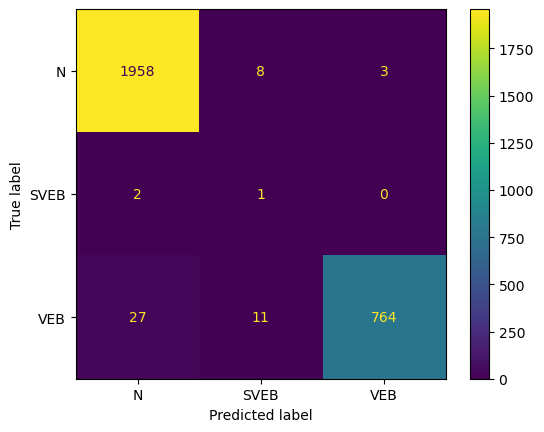

Fold 185:
  Test:  patient=184
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1608
         1.0       0.00      0.00      0.00         0
         2.0       0.99      1.00      1.00       137

    accuracy                           0.99      1745
   macro avg       0.66      0.66      0.66      1745
weighted avg       1.00      0.99      1.00      1745

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0    0.992754  0.993696     0.664251      0.999431
recall        0.993159  NaN    1.000000  0.993696     0.664386      0.993696
f1-score      0.996568  NaN    0.996364  0.993696     0.664310      0.996552
support    1608.000000  0.0  137.000000  0.993696  1745.000000   1745.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

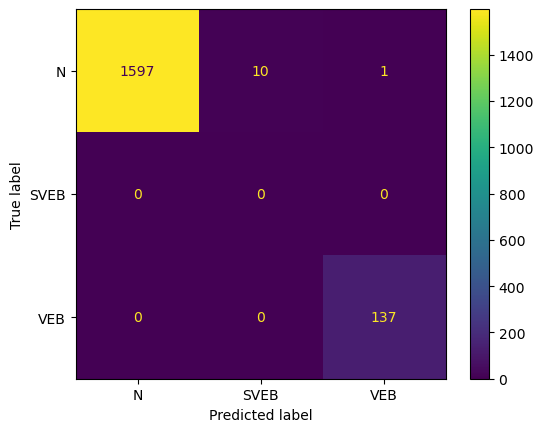

Fold 186:
  Test:  patient=185
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1150
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.98      0.99      1110

    accuracy                           0.99      2260
   macro avg       0.66      0.66      0.66      2260
weighted avg       0.99      0.99      0.99      2260

                   0.0  1.0          2.0  accuracy    macro avg  weighted avg
precision     0.979540  0.0     1.000000  0.988053     0.659847      0.989589
recall        0.999130  NaN     0.976577  0.988053     0.658569      0.988053
f1-score      0.989238  NaN     0.988149  0.988053     0.659129      0.988703
support    1150.000000  0.0  1110.000000  0.988053  2260.000000   2260.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

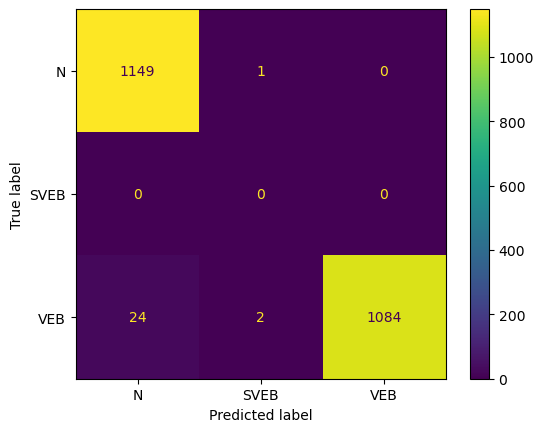

Fold 187:
  Test:  patient=186
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      2338
         1.0       0.00      0.00      0.00         1
         2.0       0.23      0.73      0.35        22

    accuracy                           0.97      2361
   macro avg       0.41      0.57      0.44      2361
weighted avg       0.99      0.97      0.98      2361

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.998680  0.0   0.228571  0.968234     0.409084      0.991081
recall        0.970915  0.0   0.727273  0.968234     0.566063      0.968234
f1-score      0.984602  0.0   0.347826  0.968234     0.444143      0.978251
support    2338.000000  1.0  22.000000  0.968234  2361.000000   2361.000000


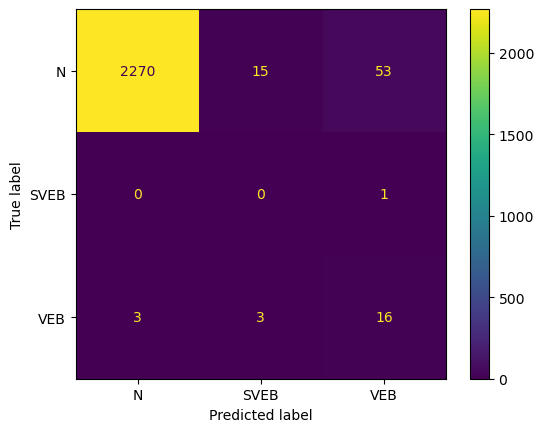

Fold 188:
  Test:  patient=187
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      2146
         1.0       0.04      1.00      0.08         1
         2.0       0.60      0.71      0.65        17

    accuracy                           0.98      2164
   macro avg       0.55      0.90      0.57      2164
weighted avg       1.00      0.98      0.99      2164

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.998586  0.043478   0.600000   0.98475     0.547355   
recall        0.986952  1.000000   0.705882   0.98475     0.897612   
f1-score      0.992735  0.083333   0.648649   0.98475     0.574906   
support    2146.000000  1.000000  17.000000   0.98475  2164.000000   

           weighted avg  
precision      0.995013  
recall         0.984750  
f1-score       0.989612  
support     2164.000000  


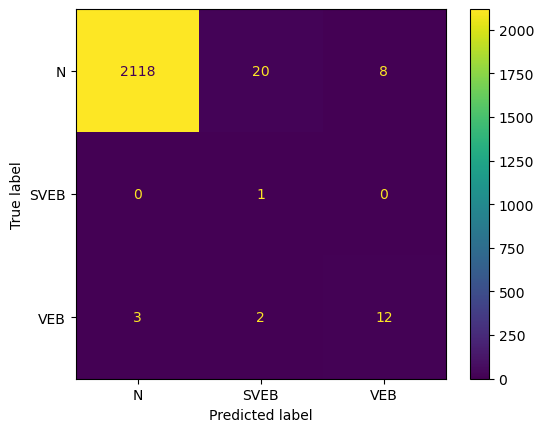

Fold 189:
  Test:  patient=188
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1670
         1.0       0.00      0.00      0.00        26
         2.0       0.16      1.00      0.27         7

    accuracy                           0.98      1703
   macro avg       0.39      0.66      0.42      1703
weighted avg       0.98      0.98      0.98      1703

                   0.0   1.0       2.0  accuracy    macro avg  weighted avg
precision     1.000000   0.0  0.159091  0.977099     0.386364      0.981276
recall        0.992216   0.0  1.000000  0.977099     0.664072      0.977099
f1-score      0.996093   0.0  0.274510  0.977099     0.423534      0.977919
support    1670.000000  26.0  7.000000  0.977099  1703.000000   1703.000000


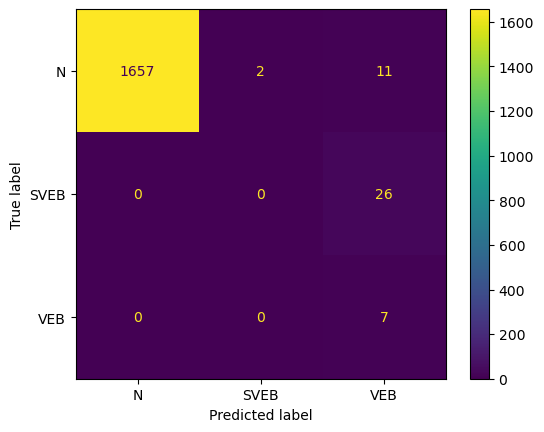

Fold 190:
  Test:  patient=189
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2840
         1.0       0.20      0.33      0.25         3
         2.0       0.67      0.67      0.67        21

    accuracy                           0.99      2864
   macro avg       0.62      0.67      0.64      2864
weighted avg       0.99      0.99      0.99      2864

                   0.0       1.0        2.0  accuracy    macro avg  \
precision     0.996829  0.200000   0.666667  0.993017     0.621165   
recall        0.996127  0.333333   0.666667  0.993017     0.665376   
f1-score      0.996478  0.250000   0.666667  0.993017     0.637715   
support    2840.000000  3.000000  21.000000  0.993017  2864.000000   

           weighted avg  
precision      0.993573  
recall         0.993017  
f1-score       0.993277  
support     2864.000000  


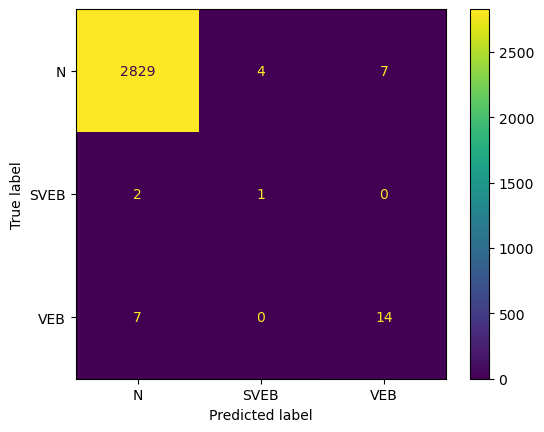

Fold 191:
  Test:  patient=190
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2311
         1.0       0.00      0.00      0.00         0
         2.0       1.00      0.67      0.80        12

    accuracy                           1.00      2323
   macro avg       0.67      0.56      0.60      2323
weighted avg       1.00      1.00      1.00      2323

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.999135  0.0   1.000000  0.997417     0.666378      0.999139
recall        0.999135  NaN   0.666667  0.997417     0.555267      0.997417
f1-score      0.999135  NaN   0.800000  0.997417     0.599712      0.998106
support    2311.000000  0.0  12.000000  0.997417  2323.000000   2323.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

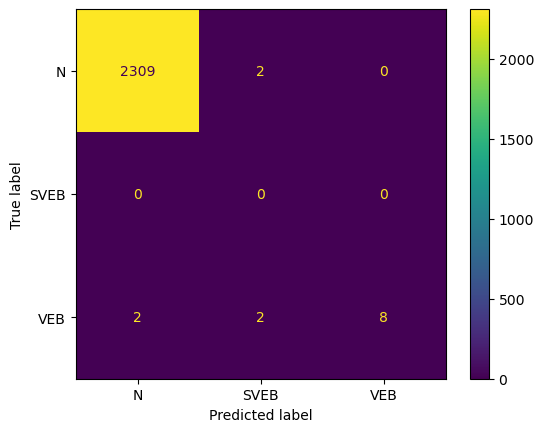

Fold 192:
  Test:  patient=191
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2065
         1.0       0.00      0.00      0.00         0
         2.0       0.80      0.75      0.78        81

    accuracy                           0.98      2146
   macro avg       0.60      0.58      0.59      2146
weighted avg       0.98      0.98      0.98      2146

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.990333  0.0   0.802632  0.983225     0.597655      0.983249
recall        0.992252  NaN   0.753086  0.983225     0.581779      0.983225
f1-score      0.991292  NaN   0.777070  0.983225     0.589454      0.983206
support    2065.000000  0.0  81.000000  0.983225  2146.000000   2146.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

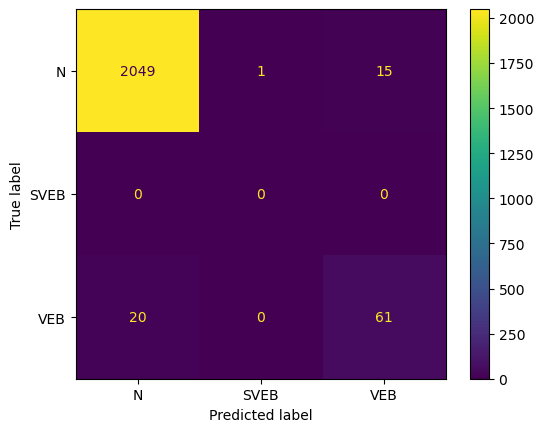

Fold 193:
  Test:  patient=192
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2473
         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         0

    accuracy                           0.99      2473
   macro avg       0.33      0.33      0.33      2473
weighted avg       1.00      0.99      1.00      2473

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.994743     0.333333      1.000000
recall        0.994743  NaN  NaN  0.994743     0.331581      0.994743
f1-score      0.997365  NaN  NaN  0.994743     0.332455      0.997365
support    2473.000000  0.0  0.0  0.994743  2473.000000   2473.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

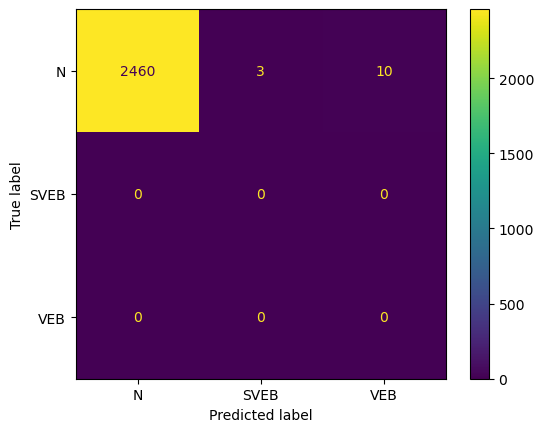

Fold 194:
  Test:  patient=193
              precision    recall  f1-score   support

         0.0       1.00      0.93      0.97      1451
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         0

    accuracy                           0.93      1452
   macro avg       0.33      0.31      0.32      1452
weighted avg       1.00      0.93      0.97      1452

                   0.0  1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0  0.0  0.933196     0.333333      0.999311
recall        0.933839  0.0  NaN  0.933196     0.311280      0.933196
f1-score      0.965788  0.0  NaN  0.933196     0.321929      0.965122
support    1451.000000  1.0  0.0  0.933196  1452.000000   1452.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

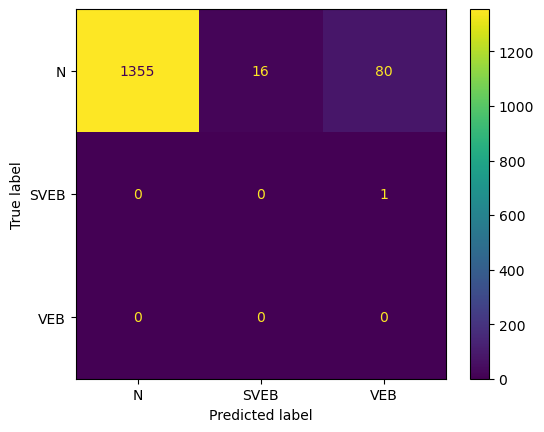

Fold 195:
  Test:  patient=194
              precision    recall  f1-score   support

         0.0       0.76      1.00      0.86      1451
         1.0       0.02      0.11      0.03         9
         2.0       0.98      0.37      0.54       795

    accuracy                           0.77      2255
   macro avg       0.59      0.49      0.48      2255
weighted avg       0.83      0.77      0.75      2255

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.760252  0.020408    0.980263  0.773836     0.586975   
recall        0.996554  0.111111    0.374843  0.773836     0.494169   
f1-score      0.862511  0.034483    0.542311  0.773836     0.479768   
support    1451.000000  9.000000  795.000000  0.773836  2255.000000   

           weighted avg  
precision      0.834864  
recall         0.773836  
f1-score       0.746320  
support     2255.000000  


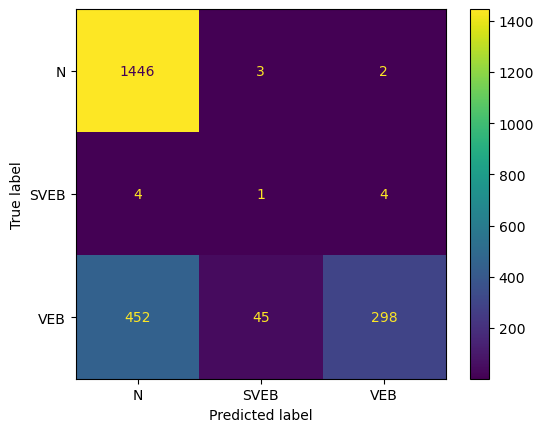

Fold 196:
  Test:  patient=195
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1845
         1.0       0.00      0.00      0.00         1
         2.0       1.00      0.84      0.91       138

    accuracy                           0.99      1984
   macro avg       0.66      0.61      0.64      1984
weighted avg       0.99      0.99      0.99      1984

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.990870  0.0    1.000000  0.988407     0.663623      0.991006
recall        1.000000  0.0    0.840580  0.988407     0.613527      0.988407
f1-score      0.995414  0.0    0.913386  0.988407     0.636267      0.989207
support    1845.000000  1.0  138.000000  0.988407  1984.000000   1984.000000


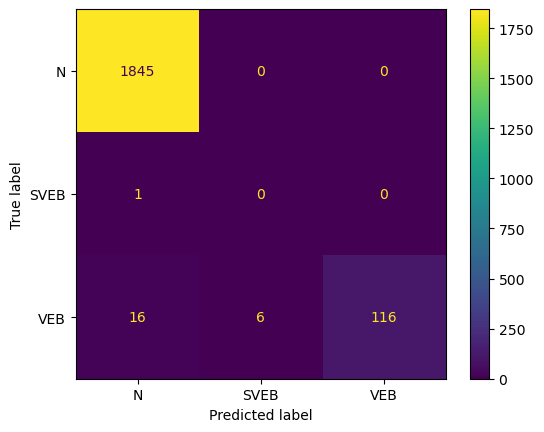

Fold 197:
  Test:  patient=196
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1885
         1.0       0.00      0.00      0.00         0
         2.0       0.71      0.65      0.68        23

    accuracy                           0.99      1908
   macro avg       0.57      0.55      0.56      1908
weighted avg       0.99      0.99      0.99      1908

                   0.0  1.0        2.0  accuracy    macro avg  weighted avg
precision     0.996283  0.0   0.714286   0.99109     0.570189      0.992883
recall        0.995225  NaN   0.652174   0.99109     0.549133      0.991090
f1-score      0.995754  NaN   0.681818   0.99109     0.559191      0.991969
support    1885.000000  0.0  23.000000   0.99109  1908.000000   1908.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

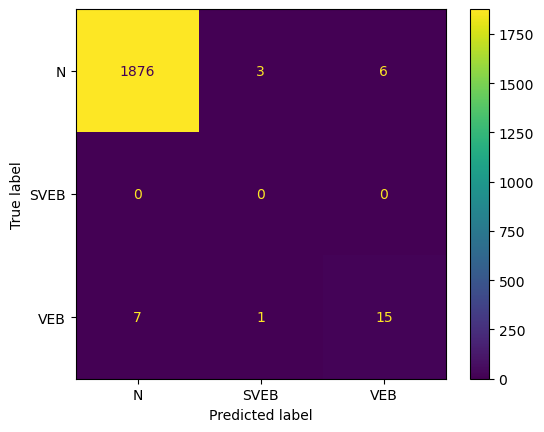

Fold 198:
  Test:  patient=197
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2271
         1.0       0.07      0.20      0.10         5
         2.0       0.97      0.87      0.92       382

    accuracy                           0.97      2658
   macro avg       0.67      0.69      0.67      2658
weighted avg       0.98      0.97      0.97      2658

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.980009  0.066667    0.970760  0.973664     0.672479   
recall        0.992955  0.200000    0.869110  0.973664     0.687355   
f1-score      0.986439  0.100000    0.917127  0.973664     0.667855   
support    2271.000000  5.000000  382.000000  0.973664  2658.000000   

           weighted avg  
precision      0.976961  
recall         0.973664  
f1-score       0.974810  
support     2658.000000  


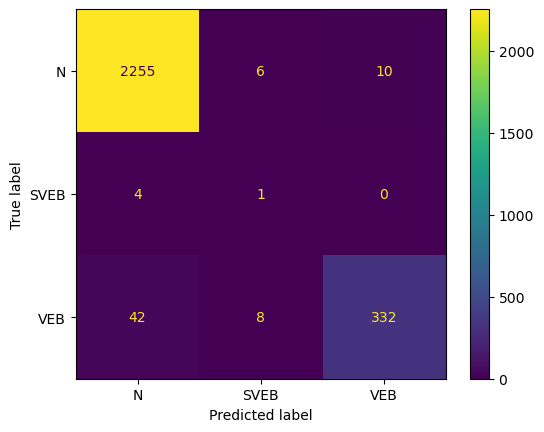

Fold 199:
  Test:  patient=198
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2137
         1.0       0.00      0.00      0.00         1
         2.0       0.99      0.92      0.95       200

    accuracy                           0.98      2338
   macro avg       0.66      0.63      0.65      2338
weighted avg       0.99      0.98      0.99      2338

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.992485  0.0    0.989189  0.982036     0.660558      0.991778
recall        0.988769  0.0    0.915000  0.982036     0.634590      0.982036
f1-score      0.990624  0.0    0.950649  0.982036     0.647091      0.986780
support    2137.000000  1.0  200.000000  0.982036  2338.000000   2338.000000


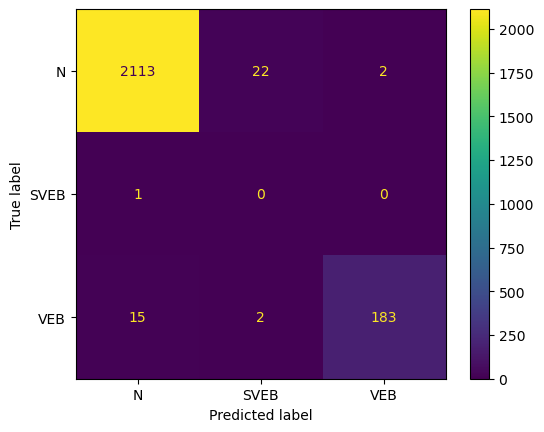

Fold 200:
  Test:  patient=199
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2436
         1.0       0.00      0.00      0.00         5
         2.0       0.99      0.99      0.99       531

    accuracy                           0.99      2972
   macro avg       0.66      0.66      0.66      2972
weighted avg       0.99      0.99      0.99      2972

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.997531  0.0    0.988722  0.992598     0.662084      0.994279
recall        0.995074  0.0    0.990584  0.992598     0.661886      0.992598
f1-score      0.996301  0.0    0.989652  0.992598     0.661984      0.993437
support    2436.000000  5.0  531.000000  0.992598  2972.000000   2972.000000


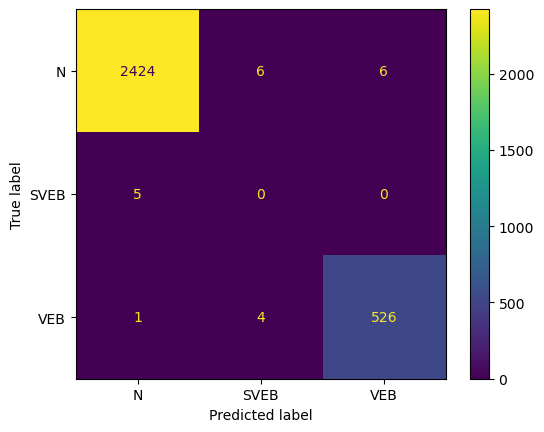

Fold 201:
  Test:  patient=200
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      2480
         1.0       0.00      0.00      0.00         2
         2.0       0.89      0.98      0.93       161

    accuracy                           0.99      2643
   macro avg       0.63      0.66      0.64      2643
weighted avg       0.99      0.99      0.99      2643

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.999188  0.0    0.892655  0.990919     0.630614      0.991942
recall        0.992339  0.0    0.981366  0.990919     0.657902      0.990919
f1-score      0.995752  0.0    0.934911  0.990919     0.643554      0.991292
support    2480.000000  2.0  161.000000  0.990919  2643.000000   2643.000000


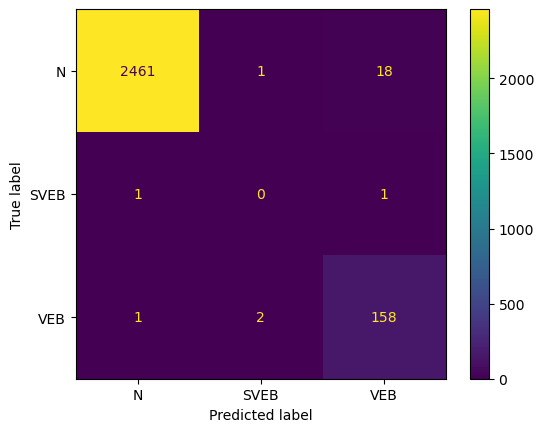

Fold 202:
  Test:  patient=201
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      1998
         1.0       0.00      0.00      0.00         1
         2.0       0.93      1.00      0.97       167

    accuracy                           0.99      2166
   macro avg       0.64      0.66      0.65      2166
weighted avg       0.99      0.99      0.99      2166

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     1.000000  0.0    0.932961   0.99169     0.644320      0.994370
recall        0.991491  0.0    1.000000   0.99169     0.663830      0.991690
f1-score      0.995728  0.0    0.965318   0.99169     0.653682      0.992923
support    1998.000000  1.0  167.000000   0.99169  2166.000000   2166.000000


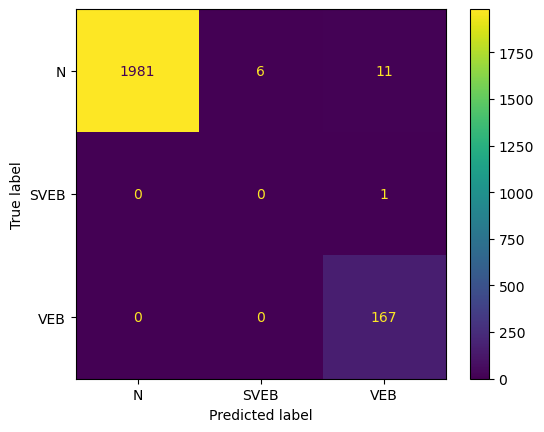

Fold 203:
  Test:  patient=202
              precision    recall  f1-score   support

         0.0       0.94      0.98      0.96      1539
         1.0       1.00      0.02      0.05       126
         2.0       0.00      0.00      0.00         0

    accuracy                           0.91      1665
   macro avg       0.65      0.34      0.34      1665
weighted avg       0.95      0.91      0.89      1665

                   0.0         1.0  2.0  accuracy    macro avg  weighted avg
precision     0.942715    1.000000  0.0  0.911111     0.647572      0.947050
recall        0.983756    0.023810  NaN  0.911111     0.335855      0.911111
f1-score      0.962798    0.046512  NaN  0.911111     0.336437      0.893457
support    1539.000000  126.000000  0.0  0.911111  1665.000000   1665.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

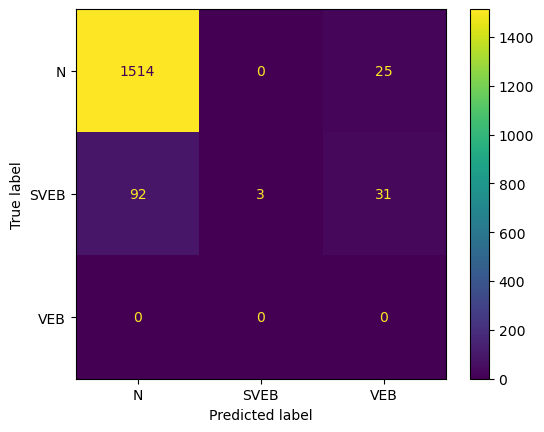

Fold 204:
  Test:  patient=203


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

              precision    recall  f1-score   support

         0.0       1.00      0.89      0.94      1634
         1.0       0.42      0.83      0.56        35
         2.0       0.00      0.00      0.00         0

    accuracy                           0.89      1669
   macro avg       0.47      0.57      0.50      1669
weighted avg       0.99      0.89      0.93      1669

                   0.0        1.0  2.0  accuracy    macro avg  weighted avg
precision     1.000000   0.420290  0.0  0.889155     0.473430      0.987843
recall        0.890453   0.828571  NaN  0.889155     0.573008      0.889155
f1-score      0.942052   0.557692  NaN  0.889155     0.499915      0.933992
support    1634.000000  35.000000  0.0  0.889155  1669.000000   1669.000000


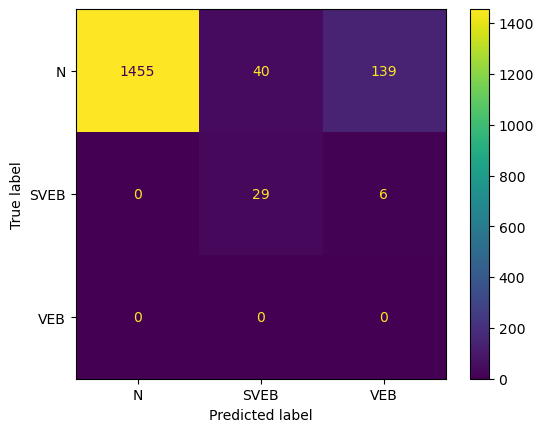

Fold 205:
  Test:  patient=204
              precision    recall  f1-score   support

         0.0       0.99      0.87      0.93      1874
         1.0       0.21      0.50      0.30         8
         2.0       0.60      0.96      0.74       386

    accuracy                           0.88      2268
   macro avg       0.60      0.77      0.65      2268
weighted avg       0.92      0.88      0.89      2268

                   0.0       1.0         2.0  accuracy    macro avg  \
precision     0.992063  0.210526    0.603928  0.880952     0.602173   
recall        0.867129  0.500000    0.955959  0.880952     0.774363   
f1-score      0.925399  0.296296    0.740221  0.880952     0.653972   
support    1874.000000  8.000000  386.000000  0.880952  2268.000000   

           weighted avg  
precision      0.923248  
recall         0.880952  
f1-score       0.891663  
support     2268.000000  


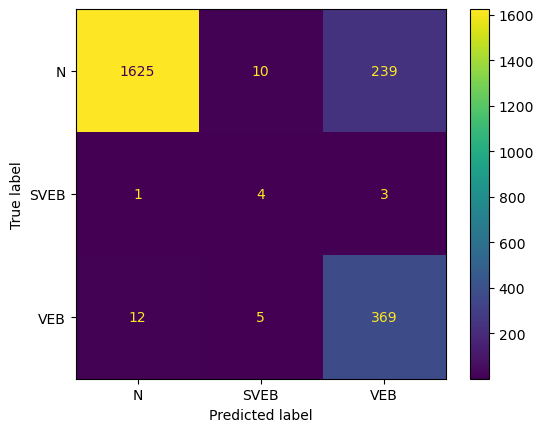

Fold 206:
  Test:  patient=205
              precision    recall  f1-score   support

         0.0       0.99      0.96      0.98      1888
         1.0       0.05      0.06      0.06        32
         2.0       0.55      0.83      0.66        70

    accuracy                           0.95      1990
   macro avg       0.53      0.62      0.56      1990
weighted avg       0.96      0.95      0.95      1990

                   0.0        1.0        2.0  accuracy    macro avg  \
precision     0.985923   0.054054   0.547170  0.945226     0.529049   
recall        0.964513   0.062500   0.828571  0.945226     0.618528   
f1-score      0.975100   0.057971   0.659091  0.945226     0.564054   
support    1888.000000  32.000000  70.000000  0.945226  1990.000000   

           weighted avg  
precision      0.955505  
recall         0.945226  
f1-score       0.949237  
support     1990.000000  


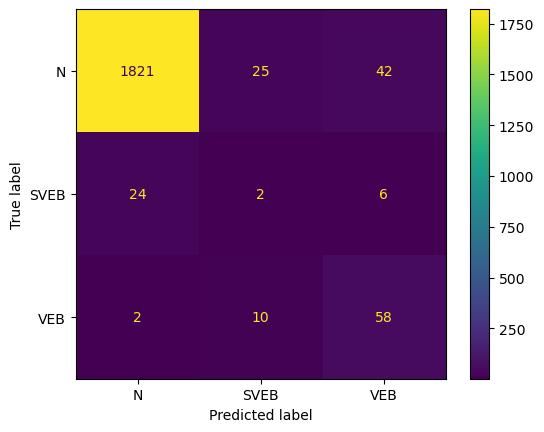

Fold 207:
  Test:  patient=206
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      2081
         1.0       0.00      0.00      0.00         0
         2.0       0.91      0.94      0.93       274

    accuracy                           0.98      2355
   macro avg       0.64      0.64      0.64      2355
weighted avg       0.99      0.98      0.98      2355

                   0.0  1.0         2.0  accuracy    macro avg  weighted avg
precision     0.995141  0.0    0.914894  0.979193     0.636678      0.985804
recall        0.984142  NaN    0.941606  0.979193     0.641916      0.979193
f1-score      0.989611  NaN    0.928058  0.979193     0.639223      0.982449
support    2081.000000  0.0  274.000000  0.979193  2355.000000   2355.000000


C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matte\anaconda3\envs\DMML\lib\site-packa

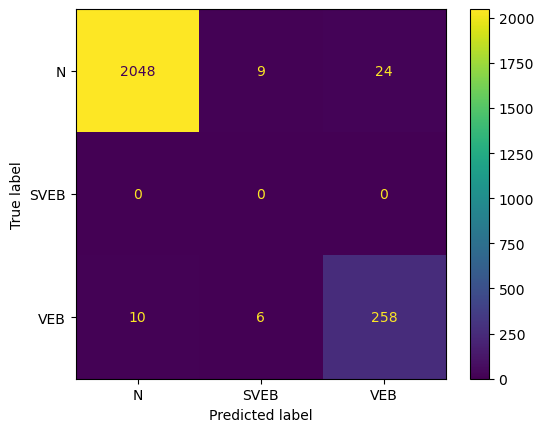

Fold 208:
  Test:  patient=207
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1482
         2.0       1.00      0.93      0.96       612

    accuracy                           0.98      2094
   macro avg       0.98      0.96      0.97      2094
weighted avg       0.98      0.98      0.98      2094

                   0.0         2.0  accuracy    macro avg  weighted avg
precision     0.970511    0.998239  0.978032     0.984375      0.978615
recall        0.999325    0.926471  0.978032     0.962898      0.978032
f1-score      0.984707    0.961017  0.978032     0.972862      0.977784
support    1482.000000  612.000000  0.978032  2094.000000   2094.000000


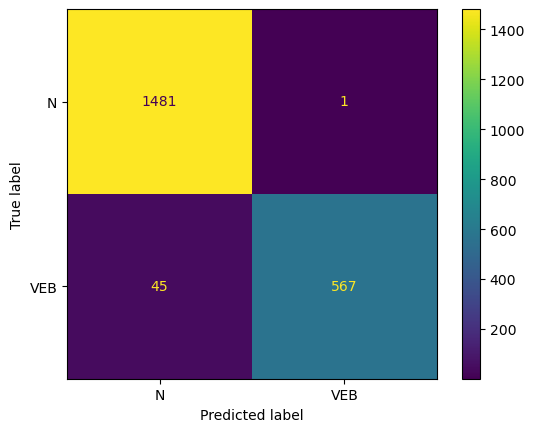

C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\matte\anaconda3\envs\DMML\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [7]:
from sklearn.model_selection import LeaveOneGroupOut
import time
X=df_cardio.drop('type',axis=1)
y=df_cardio['type']
groups=df_cardio['patient']
skf = LeaveOneGroupOut()


start_time=time.time()
df_normal, acc_normal,confusion_matrix_final,list_fscore = cross_valid(pipe_normal, skf, X, y,groups)
end_time=time.time()

In [8]:
df_normal

0.0        1.0         2.0    macro avg  weighted avg
f1-score      0.936271   0.249389    0.545603     0.528986      0.910031
precision     0.964346   0.206895    0.469714     0.547900      0.951891
recall        0.927254   0.333980    0.734741     0.600715      0.894966
support    3099.572115  89.376812  231.788462  3420.307692   3420.307692

In [9]:
print("Time"+str(end_time-start_time))

Time27804.40028333664
